<a href="https://colab.research.google.com/github/HikariJadeEmpire/TH_WLRD_Happiness_Project/blob/main/WH_CodeSpace.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# STEP 1
- import & Clean DATA
- learning about the data

In [1]:
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}\nMatplotlib {mpl.__version__}\n" ) 

Python 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Pandas 1.5.0
NumPy 1.21.6
Matplotlib 3.5.2



In [2]:
df_w = pd.read_csv('https://raw.githubusercontent.com/HikariJadeEmpire/TH_WLRD_Happiness_Project/main/DataForTable2')  
df_w_overall = pd.read_csv('https://raw.githubusercontent.com/HikariJadeEmpire/TH_WLRD_Happiness_Project/main/Appendix_2_Data_for_Figure_2')

df_w.info() # we will use this to be the main file
#df_w_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2062 non-null   float64
 4   Social support                     2076 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

In [3]:
# Clean Column name to avoid error (eg.remove 'space')

df = df_w.rename(columns={'Country name':'country_name',
'Life Ladder':'life_lad','Log GDP per capita':'gdp_per_cap',
'Social support':'social_sup','Healthy life expectancy at birth':'health',
'Freedom to make life choices':'life_choice','Generosity':'generosity',
'Perceptions of corruption':'corruption','Positive affect':'pos_aff','Negative affect':'neg_aff',
'Confidence in national government':'conf_in_gov'} )

df['year'] = df['year'].agg(lambda x : str(x))

# get results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  2089 non-null   object 
 1   year          2089 non-null   object 
 2   life_lad      2089 non-null   float64
 3   gdp_per_cap   2062 non-null   float64
 4   social_sup    2076 non-null   float64
 5   health        2031 non-null   float64
 6   life_choice   2057 non-null   float64
 7   generosity    2009 non-null   float64
 8   corruption    1976 non-null   float64
 9   pos_aff       2065 non-null   float64
 10  neg_aff       2073 non-null   float64
 11  conf_in_gov   1873 non-null   float64
dtypes: float64(10), object(2)
memory usage: 196.0+ KB


# Check outliers in case we need to do something with the overall mean, median, or something in the big picture
- but right now, we don't need them yet

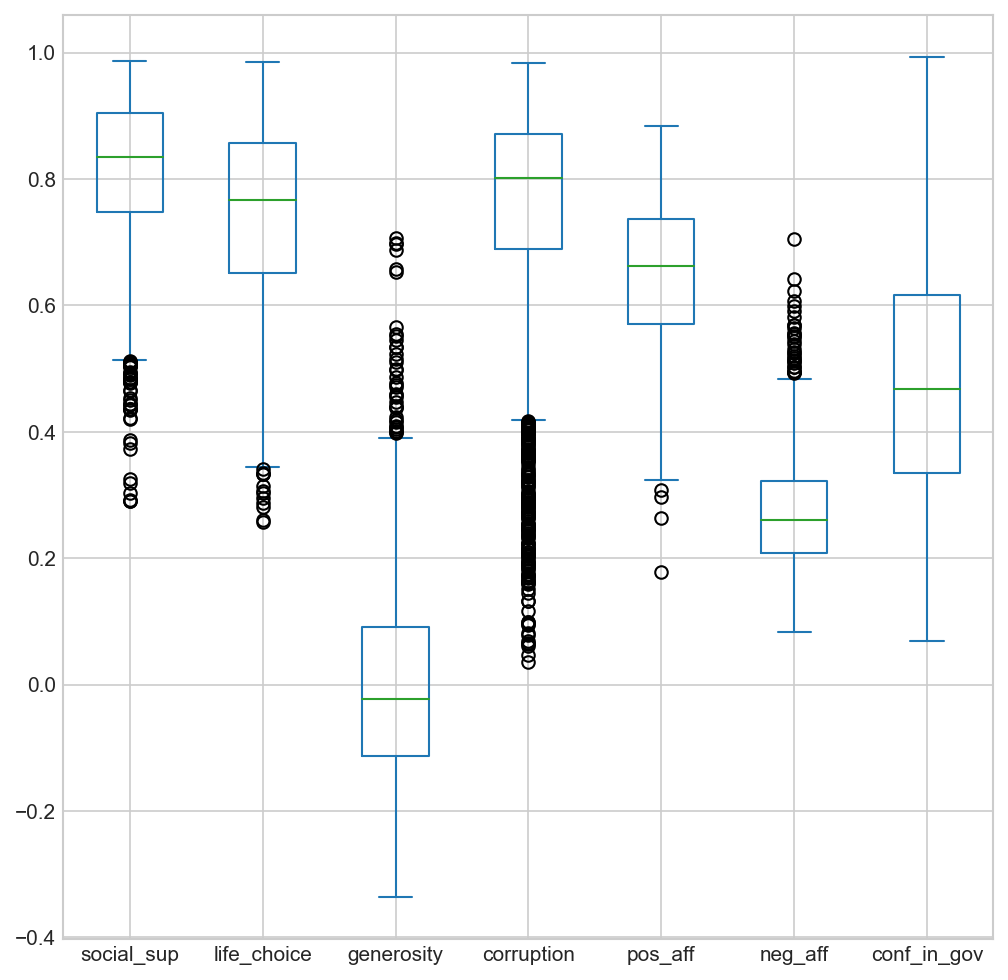

In [4]:
# Check Outliers on each column before grouping

df_ol_1 = df.loc[ :,[ 'social_sup','life_choice','generosity','corruption','pos_aff','neg_aff','conf_in_gov' ] ]
df_ol_2 = df.loc[ :,[ 'health' ] ]
df_ol_3 = df.loc[ :,[ 'life_lad','gdp_per_cap' ] ]

plt.style.use('seaborn-whitegrid')
plt.figure( figsize=(8, 8), dpi=150 )
ax = plt.gca()

# Plot
_1 = df_ol_1.plot(kind='box', ax=ax)

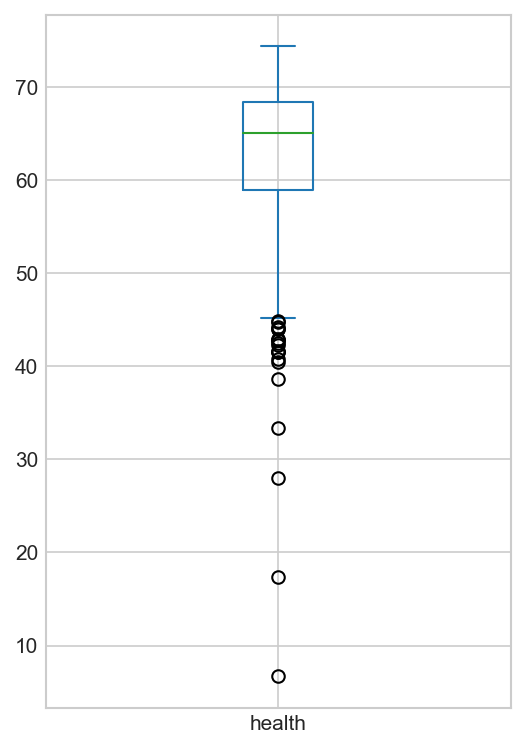

In [5]:
plt.figure( figsize=(4, 6), dpi=150 )
ax = plt.gca()
_2 = df_ol_2.plot(kind='box', ax=ax)

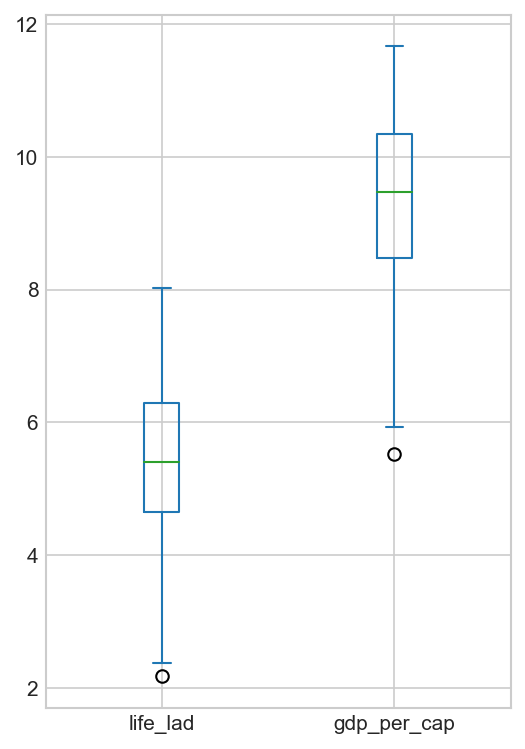

In [6]:
plt.figure( figsize=(4, 6), dpi=150 )
ax = plt.gca()
_3 = df_ol_3.plot(kind='box', ax=ax)

In [7]:
df_ol_b = df

# drop outliers

Q1 = df_ol_b.iloc[:,2:].quantile(0.25)
Q3 = df_ol_b.iloc[:,2:].quantile(0.75)
IQR = Q3 - Q1

df_ol = df_ol_b.loc[ :,['country_name','year'] ]
for i,j in enumerate(df_ol_b):
    if i > 1 :
        min_outlier = (Q1[j] - 1.5 * IQR[j]) ; max_outlier = (Q3[j] + 1.5 * IQR[j])

        df_ol_0 = df_ol_b.loc[ (df_ol_b[j] >= min_outlier)|(df_ol_b[j] <= max_outlier) ,['country_name','year',j]  ]
        df_ol = pd.merge(df_ol,df_ol_0,left_on=['country_name','year'],right_on=['country_name','year'],how='inner')

print( f" {'-'*6} here is the DATA that clears out outliers {'-'*6} " )
display(df_ol)

 ------ here is the DATA that clears out outliers ------ 


country_name  year  life_lad  gdp_per_cap  social_sup     health  \
0     Afghanistan  2008  3.723590     7.302574    0.450662  50.500000   
1     Afghanistan  2009  4.401778     7.472446    0.552308  50.799999   
2     Afghanistan  2010  4.758381     7.579183    0.539075  51.099998   
3     Afghanistan  2011  3.831719     7.552006    0.521104  51.400002   
4     Afghanistan  2012  3.782938     7.637953    0.520637  51.700001   
...           ...   ...       ...          ...         ...        ...   
1742     Zimbabwe  2017  3.638300     8.241609    0.754147  52.150002   
1743     Zimbabwe  2018  3.616480     8.274620    0.775388  52.625000   
1744     Zimbabwe  2019  2.693523     8.196998    0.759162  53.099998   
1745     Zimbabwe  2020  3.159802     8.117733    0.717243  53.575001   
1746     Zimbabwe  2021  3.154578     8.153248    0.685151  54.049999   

      life_choice  generosity  corruption   pos_aff   neg_aff  conf_in_gov  
0        0.718114    0.173169    0.881686  0.414297  0.258195     0.612072  
1        0.678896    0.195469    0.850035  0.481421  0.237092     0.611545  
2        0.600127    0.125859    0.706766  0.516907  0.275324     0.299357  
3        0.495901    0.167723    0.731109  0.479835  0.267175     0.307386  
4        0.530935    0.241247    0.775620  0.613513  0.267919     0.435440  
...           ...         ...         ...       ...       ...          ...  
1742     0.752826   -0.113937    0.751208  0.733641  0.224051     0.682647  
1743     0.762675   -0.084747    0.844209  0.657524  0.211726     0.550508  
1744     0.631908   -0.081540    0.830652  0.658434  0.235354     0.456455  
1745     0.643303   -0.029376    0.788523  0.660658  0.345736     0.577302  
1746     0.667636   -0.109439    0.756945  0.609917  0.241682     0.665703  

[1747 rows x 12 columns]

# Overall
with non_outlier data

year  life_lad  gdp_per_cap  social_sup     health  life_choice  \
0   2006  5.178678     9.067828    0.834876  59.814795     0.725507   
1   2007  5.383092     9.175460    0.808006  61.351060     0.684241   
2   2008  5.442218     9.164876    0.783981  60.945102     0.689459   
3   2009  5.469795     9.189528    0.812422  61.938159     0.693997   
4   2010  5.545052     9.348901    0.834047  62.513636     0.719472   
5   2011  5.422370     9.217334    0.800565  61.416139     0.742712   
6   2012  5.460751     9.362835    0.810536  62.770357     0.707736   
7   2013  5.392693     9.368422    0.806686  63.024033     0.726873   
8   2014  5.408028     9.368167    0.809951  63.119680     0.739954   
9   2015  5.407196     9.353239    0.801157  63.377600     0.751885   
10  2016  5.386001     9.351280    0.811153  63.359756     0.761190   
11  2017  5.494466     9.346638    0.807389  63.500391     0.785549   
12  2018  5.539545     9.403750    0.814193  63.895554     0.780850   
13  2019  5.571193     9.421042    0.813896  64.083815     0.791691   
14  2020  5.783736     9.653111    0.832791  65.745707     0.807522   
15  2021  5.662154     9.593642    0.812871  65.534500     0.786874   

    generosity  corruption   pos_aff   neg_aff  conf_in_gov  
0    -0.001751    0.768250  0.663771  0.256090     0.491048  
1     0.009893    0.797756  0.650977  0.248991     0.464451  
2     0.024069    0.771620  0.658135  0.240419     0.486439  
3    -0.003544    0.774473  0.654327  0.238255     0.496491  
4     0.009702    0.765212  0.661301  0.233772     0.489925  
5    -0.008977    0.764779  0.648146  0.245496     0.491776  
6    -0.010920    0.777531  0.649939  0.259793     0.451801  
7    -0.008908    0.772881  0.658018  0.267317     0.452131  
8     0.023136    0.744865  0.659565  0.274681     0.474782  
9     0.019422    0.739881  0.661486  0.275123     0.481912  
10    0.004506    0.746958  0.660366  0.288125     0.477008  
11   -0.004079    0.728174  0.656327  0.288134     0.507805  
12   -0.022991    0.734611  0.655461  0.293930     0.498159  
13   -0.018863    0.724064  0.658760  0.290819     0.504507  
14   -0.001994    0.724641  0.668065  0.302517     0.499709  
15    0.036011    0.729019  0.659967  0.290026     0.484172

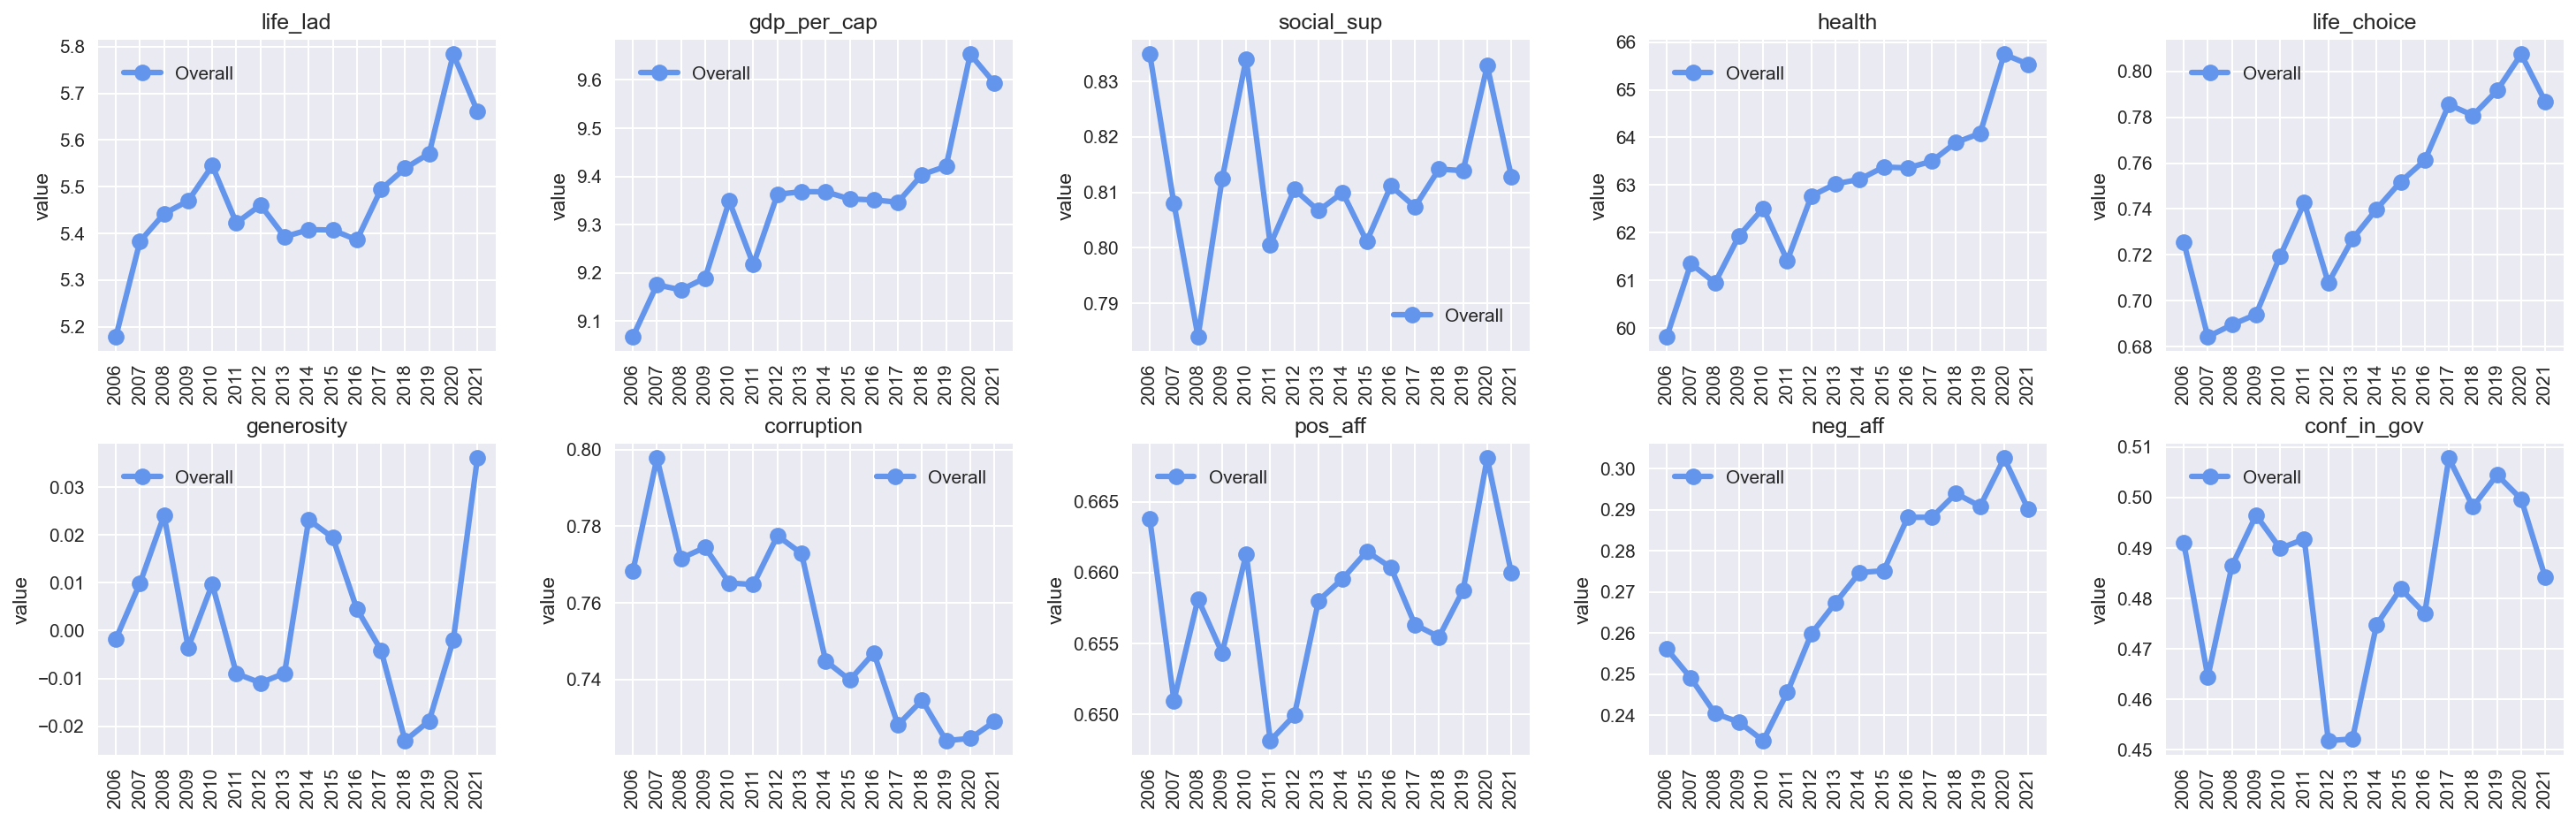

In [8]:
all_mean = df_ol.iloc[ :,1: ].groupby( 'year' ).apply( 'mean' )
all_mean = pd.merge( left=df_ol.loc[df_ol['country_name']=='Thailand',['year']] ,right=all_mean ,how='left' ,on=['year'] )

display( all_mean )

# PLOT

plt.style.use('seaborn')
f = plt.figure(figsize=(24,7), dpi=150)

for i,j in enumerate(all_mean) :
    if i > 0 :
        plt.subplot(2, 5, i)
        plt.plot(all_mean['year'], all_mean[j],color='#6495ED', marker='o', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=1 ,label="Overall" )
        plt.xticks(rotation=90 )
        plt.title(f"{j}")
        plt.ylabel("value")
        plt.legend(loc="best",borderaxespad=1 )
        plt.subplots_adjust( wspace=0.3, hspace=0.3 )

# REPLACE NaN by median of each country
with outlier data

In [9]:
# Replace NaN by median respect to country

for i,name in enumerate(list(df)):
    if i > 2 :
        df[name].fillna(df.groupby(['country_name'])[name].transform('median'),inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  2089 non-null   object 
 1   year          2089 non-null   object 
 2   life_lad      2089 non-null   float64
 3   gdp_per_cap   2073 non-null   float64
 4   social_sup    2088 non-null   float64
 5   health        2051 non-null   float64
 6   life_choice   2089 non-null   float64
 7   generosity    2073 non-null   float64
 8   corruption    2060 non-null   float64
 9   pos_aff       2087 non-null   float64
 10  neg_aff       2088 non-null   float64
 11  conf_in_gov   1992 non-null   float64
dtypes: float64(10), object(2)
memory usage: 196.0+ KB


Look like some of them are still NaN.<br>
We've got to see what happened.

In [10]:
see=df.loc[ df['gdp_per_cap'].isna() | df['social_sup'].isna() | df['health'].isna() | df['generosity'].isna() 
           | df['corruption'].isna() | df['conf_in_gov'].isna() | df['neg_aff'].isna() , : ].groupby(by=['country_name'])

print(f"\n {'-'*4} List of countries that have NaN {'-'*4} \n")
for i in (see.groups) :
    print(i)

print(f"\n {'-'*4} For example {'-'*4} \n")

see1 = df.loc[df['country_name'].isin(['China']) ,:].reset_index(drop=True)
see2 = df.loc[df['country_name'].isin(['Hong Kong S.A.R. of China']) ,:].reset_index(drop=True)

display(see1)
display(see2)


 ---- List of countries that have NaN ---- 

Algeria
Bahrain
China
Cuba
Hong Kong S.A.R. of China
Kosovo
Libya
Maldives
North Cyprus
Oman
Saudi Arabia
Somaliland region
South Sudan
Sudan
Syria
Turkmenistan
United Arab Emirates

 ---- For example ---- 



country_name  year  life_lad  gdp_per_cap  social_sup     health  \
0         China  2006  4.560495     8.696139    0.747011  65.660004   
1         China  2007  4.862862     8.823968    0.810852  65.919998   
2         China  2008  4.846295     8.910974    0.748287  66.180000   
3         China  2009  4.454361     8.995829    0.798034  66.440002   
4         China  2010  4.652737     9.092073    0.767753  66.699997   
5         China  2011  5.037208     9.177827    0.787171  66.959999   
6         China  2012  5.094917     9.246742    0.787818  67.220001   
7         China  2013  5.241090     9.314875    0.777896  67.480003   
8         China  2014  5.195619     9.380201    0.820366  67.739998   
9         China  2015  5.303878     9.442431    0.793734  68.000000   
10        China  2016  5.324956     9.502946    0.741703  68.125000   
11        China  2017  5.099061     9.564058    0.772033  68.250000   
12        China  2018  5.131434     9.624699    0.787605  68.375000   
13        China  2019  5.144120     9.678946    0.821936  68.500000   
14        China  2020  5.771065     9.699890    0.808334  68.625000   
15        China  2021  5.862864     9.776109    0.856007  68.750000   

    life_choice  generosity  corruption   pos_aff   neg_aff  conf_in_gov  
0      0.853072   -0.173937         NaN  0.657659  0.169580          NaN  
1      0.853072   -0.176961         NaN  0.663977  0.158614          NaN  
2      0.853072   -0.093270         NaN  0.705133  0.146963          NaN  
3      0.771143   -0.161358         NaN  0.669666  0.161650          NaN  
4      0.804794   -0.134285         NaN  0.658101  0.158100          NaN  
5      0.824162   -0.187382         NaN  0.710055  0.133503          NaN  
6      0.808255   -0.185606         NaN  0.689160  0.158703          NaN  
7      0.804724   -0.158647         NaN  0.717136  0.142211          NaN  
8      0.853072   -0.217615         NaN  0.709763  0.111518          NaN  
9      0.853072   -0.245284         NaN  0.666827  0.171315          NaN  
10     0.853072   -0.228405         NaN  0.683256  0.145625          NaN  
11     0.877618   -0.175740         NaN  0.681665  0.214005          NaN  
12     0.895378   -0.159466         NaN  0.721579  0.189640          NaN  
13     0.927356   -0.173937         NaN  0.760267  0.146512          NaN  
14     0.891123   -0.104621         NaN  0.662961  0.244918          NaN  
15     0.874756    0.023953         NaN  0.697810  0.239618          NaN

country_name  year  life_lad  gdp_per_cap  social_sup  \
0   Hong Kong S.A.R. of China  2006  5.511187    10.746424    0.812178   
1   Hong Kong S.A.R. of China  2008  5.137262    10.815546    0.840222   
2   Hong Kong S.A.R. of China  2009  5.397056    10.788493    0.834716   
3   Hong Kong S.A.R. of China  2010  5.642835    10.846634    0.857314   
4   Hong Kong S.A.R. of China  2011  5.474011    10.886932    0.846060   
5   Hong Kong S.A.R. of China  2012  5.483765    10.892753    0.826426   
6   Hong Kong S.A.R. of China  2014  5.458051    10.939503    0.833558   
7   Hong Kong S.A.R. of China  2016  5.498421    10.969857    0.832078   
8   Hong Kong S.A.R. of China  2017  5.362475    10.999584    0.831066   
9   Hong Kong S.A.R. of China  2019  5.659317    10.995179    0.855826   
10  Hong Kong S.A.R. of China  2020  5.295341    10.935853    0.812943   
11  Hong Kong S.A.R. of China  2021  5.321551    10.892753    0.821089   

    health  life_choice  generosity  corruption   pos_aff   neg_aff  \
0      NaN     0.909820    0.153046    0.355985  0.591140  0.235955   
1      NaN     0.922211    0.293682    0.273945  0.575073  0.236634   
2      NaN     0.918026    0.305077    0.272125  0.606459  0.210104   
3      NaN     0.890418    0.329340    0.255775  0.600561  0.183106   
4      NaN     0.894330    0.231902    0.244887  0.582491  0.195712   
5      NaN     0.879752    0.219744    0.379783  0.580223  0.183349   
6      NaN     0.843082    0.221097    0.422960  0.602495  0.242868   
7      NaN     0.799743    0.097504    0.402813  0.568555  0.213115   
8      NaN     0.830657    0.137305    0.415810  0.535812  0.200593   
9      NaN     0.726852    0.064956    0.431974  0.519312  0.357607   
10     NaN     0.705452   -0.072825    0.380351  0.521671  0.210314   
11     NaN     0.668631    0.219744    0.389589  0.534148  0.223565   

    conf_in_gov  
0      0.663938  
1      0.677437  
2      0.619142  
3      0.634737  
4      0.584562  
5      0.497906  
6      0.457823  
7      0.449610  
8      0.545041  
9      0.332540  
10     0.442211  
11     0.495274

Here is the list of countries that still have NaN.<br> 
They have it because they hadn't had any records before<br>
so we can't calculate median from NaN and fill them<br>
- We will consider dropping a country that is not in our interest and keeping the interesting one.<br>
- Else, we just have to keep them.

By the way, these countries still can be helpful in other steps so we decided to keep them <br>
Now, It's time to learn the features of DATA<br>

In [11]:
# Prepare data, sort by the best mean of life_lad ( drop outlier )

#winner_df_ol = df_ol.groupby('country_name').apply(lambda x : x[['life_lad','gdp_per_cap','social_sup',
#    'health','life_choice','generosity','corruption','pos_aff',
#    'neg_aff','conf_in_gov']].mean()).sort_values(by=['life_lad'],ascending=False).reset_index()

# Prepare data, sort by the best mean of life_lad ( keep outlier )

winner_df = df.groupby(['country_name']).apply(lambda x : x[['life_lad','gdp_per_cap','social_sup',
    'health','life_choice','generosity','corruption','pos_aff',
    'neg_aff','conf_in_gov']].mean()).sort_values(by=['life_lad'],ascending=False).reset_index()

print( f" {'-'*6} here is the DATA that have outliers {'-'*6} " )
display(winner_df)


 ------ here is the DATA that have outliers ------ 


country_name  life_lad  gdp_per_cap  social_sup     health  \
0                     Denmark  7.681457    10.885137    0.956441  70.031562   
1                     Finland  7.611299    10.753935    0.950494  70.325358   
2                 Switzerland  7.528177    11.127461    0.942772  71.978181   
3                      Norway  7.498840    11.059574    0.950138  70.931818   
4                     Iceland  7.459697    10.878041    0.977832  71.816666   
..                        ...       ...          ...         ...        ...   
161                      Togo  3.603208     7.538181    0.470834  54.076000   
162                   Burundi  3.548124     6.722510    0.417652  52.008000   
163  Central African Republic  3.514954     6.960999    0.402559  43.374000   
164               Afghanistan  3.505506     7.586585    0.504086  52.353846   
165               South Sudan  3.401875          NaN    0.554719  53.101250   

     life_choice  generosity  corruption   pos_aff   neg_aff  conf_in_gov  
0       0.944400    0.165070    0.198672  0.783656  0.197597     0.578037  
1       0.941380   -0.001996    0.244848  0.738809  0.185581     0.596645  
2       0.923328    0.094757    0.304179  0.756787  0.189489     0.770718  
3       0.952737    0.135409    0.336738  0.786417  0.201050     0.675312  
4       0.930586    0.255945    0.696809  0.810800  0.162326     0.428385  
..           ...         ...         ...       ...       ...          ...  
161     0.622879   -0.041133    0.799416  0.564185  0.419719     0.424578  
162     0.451014   -0.035402    0.732270  0.570199  0.244124     0.736995  
163     0.680430    0.027961    0.842129  0.539942  0.391497     0.711735  
164     0.508496    0.077007    0.851207  0.450821  0.348225     0.382015  
165     0.493705         NaN    0.749433  0.572469  0.486184     0.468385  

[166 rows x 11 columns]

To define what the Happiest countries look like, we join the 'happiness score' column from 'df_w_overall' file <br>
then sort the first 10th countries and define what the Happiest country looks like

 
------ BEFORE Feature scaling ------
 


country  happiness_score  life_lad  gdp_per_cap  social_sup  \
0        Finland            7.821  7.611299    10.753935    0.950494   
1        Denmark            7.636  7.681457    10.885137    0.956441   
2        Iceland            7.557  7.459697    10.878041    0.977832   
3    Switzerland            7.512  7.528177    11.127461    0.942772   
4    Netherlands            7.415  7.456150    10.886151    0.932535   
..           ...              ...       ...          ...         ...   
142      Rwanda*            3.268       NaN          NaN         NaN   
143     Zimbabwe            2.995  3.837182     8.086318    0.792329   
144      Lebanon            2.955  4.659638     9.665533    0.739500   
145  Afghanistan            2.404  3.505506     7.586585    0.504086   
146           xx              NaN       NaN          NaN         NaN   

        health  life_choice  generosity  corruption   pos_aff   neg_aff  \
0    70.325358     0.941380   -0.001996    0.244848  0.738809  0.185581   
1    70.031562     0.944400    0.165070    0.198672  0.783656  0.197597   
2    71.816666     0.930586    0.255945    0.696809  0.810800  0.162326   
3    71.978181     0.923328    0.094757    0.304179  0.756787  0.189489   
4    71.098333     0.904099    0.274062    0.413667  0.733098  0.212143   
..         ...          ...         ...         ...       ...       ...   
142        NaN          NaN         NaN         NaN       NaN       NaN   
143  48.448437     0.592836   -0.100058    0.838707  0.651847  0.225499   
144  65.622187     0.607290   -0.010961    0.907849  0.451795  0.351312   
145  52.353846     0.508496    0.077007    0.851207  0.450821  0.348225   
146        NaN          NaN         NaN         NaN       NaN       NaN   

     conf_in_gov  
0       0.596645  
1       0.578037  
2       0.428385  
3       0.770718  
4       0.603382  
..           ...  
142          NaN  
143     0.476866  
144     0.222726  
145     0.382015  
146          NaN  

[147 rows x 12 columns]

 
------ AFTER Feature scaling by Min - Max scaler ------
 


country  happiness_score  life_lad  gdp_per_cap  social_sup    health  \
0      Finland         1.000000  0.983199     0.865617    0.946079  0.878084   
1      Denmark         0.965848  1.000000     0.896020    0.957809  0.866506   
2      Iceland         0.951265  0.946896     0.894376    1.000000  0.936853   
3  Switzerland         0.942957  0.963295     0.952174    0.930848  0.943218   
4  Netherlands         0.925051  0.946046     0.896255    0.910657  0.908545   
5       Sweden         0.919328  0.926347     0.878675    0.901891  0.922367   
6       Norway         0.915821  0.956269     0.936442    0.945377  0.901983   
7       Israel         0.915636  0.894491     0.806509    0.854887  0.935088   
8  New Zealand         0.885361  0.908350     0.831434    0.950376  0.863410   
9      Austria         0.878531  0.892038     0.895357    0.895482  0.879689   

   life_choice  generosity  corruption   pos_aff   neg_aff  conf_in_gov  
0     0.974436    0.305999    0.169563  0.781204  0.175777     0.539758  
1     0.981233    0.493762    0.115118  0.899958  0.206261     0.515699  
2     0.950138    0.595895    0.702459  0.971835  0.116785     0.322206  
3     0.933800    0.414738    0.239519  0.828809  0.185692     0.764826  
4     0.890515    0.616257    0.368614  0.766083  0.243160     0.548468  
5     0.951188    0.474881    0.184763  0.843597  0.164301     0.493890  
6     1.000000    0.460426    0.277909  0.907269  0.215020     0.641471  
7     0.497147    0.436952    0.860185  0.455363  0.474504     0.260138  
8     0.931413    0.589850    0.193596  0.903753  0.212975     0.554500  
9     0.877332    0.454991    0.547322  0.720683  0.171846     0.360313

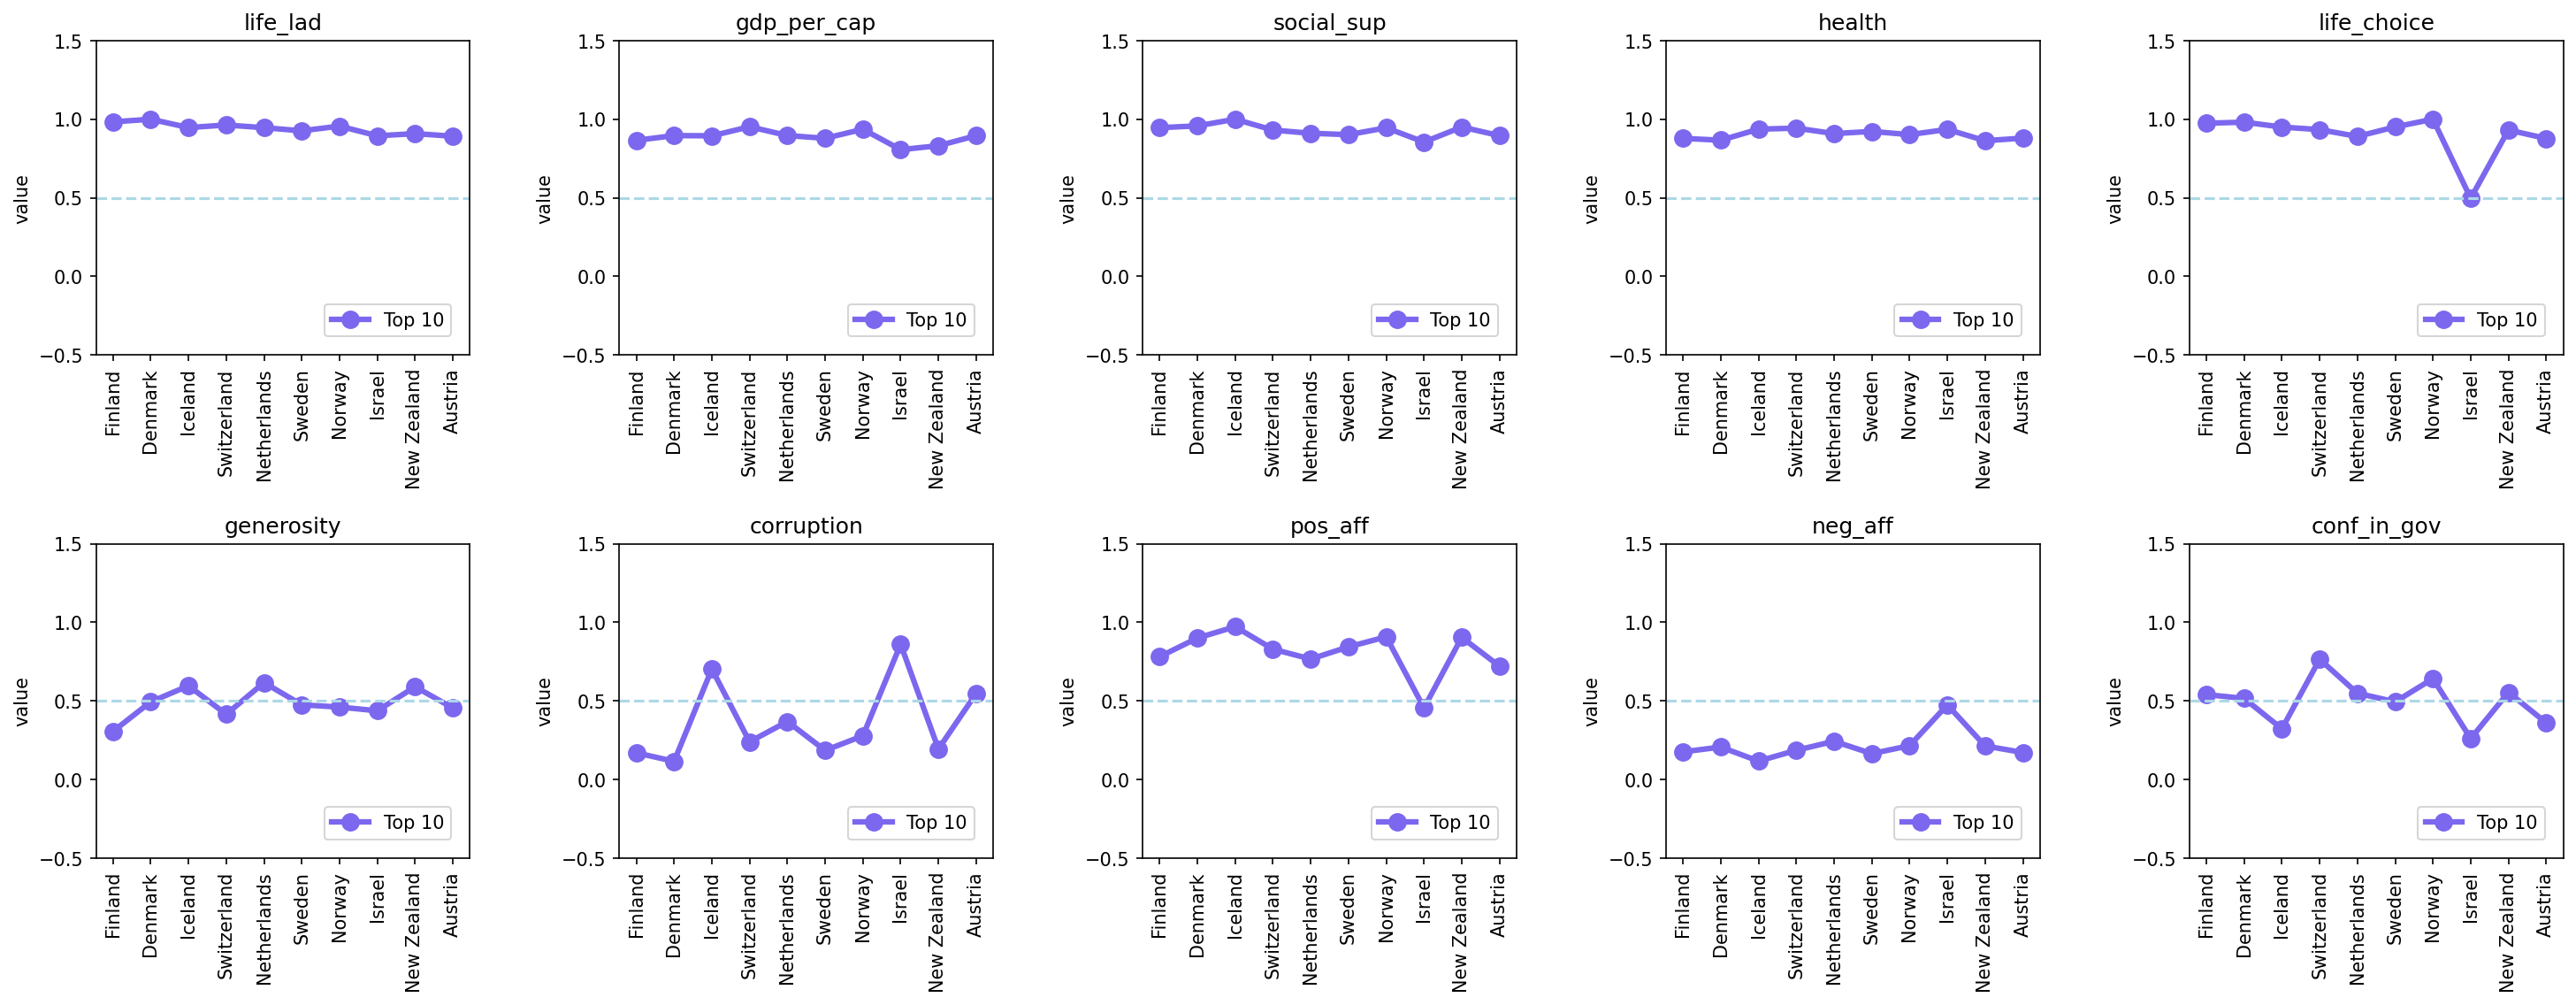

In [12]:
# Prepare DATA

df_w_overall.rename(columns={'Happiness score':'happiness_score'},inplace=True)

# for outlier keeper
wh = pd.merge(df_w_overall[['Country','happiness_score']],winner_df,left_on='Country',right_on='country_name',how='left')
wh = wh.rename(columns={'Country':'country'}).drop(columns=['country_name'])

# for non-outlier
#wh_ol = pd.merge(df_w_overall[['Country','happiness_score']],winner_df_ol,left_on='Country',right_on='country_name',how='left')
#wh_ol = wh_ol.rename(columns={'Country':'country'}).drop(columns=['country_name'])

print(f" \n{'-'*6} BEFORE Feature scaling {'-'*6}\n ")
display(wh)

# Feature scaling by min-max scaler

st_wh = wh.loc[wh['life_lad'].notna(),:].reset_index(drop=True)

st_wh.iloc[:,1:] = st_wh.iloc[:,1:].apply(lambda x: (x-x.min())/(x.max()-x.min()) )
define = st_wh.iloc[:10,:]
print(f" \n{'-'*6} AFTER Feature scaling by Min - Max scaler {'-'*6}\n ")
display(define)

# Plot

plt.style.use('default')

plt.figure(figsize=(24,8), dpi=150)

for i,j in enumerate(define) :
    if i >1 :
        plt.subplot(2, 5, i-1)
        plt.plot(define['country'], define[j],color='#7B68EE', marker='o', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=1 ,label="Top 10" )
        plt.title(f"{j}")
        plt.xticks([0,1,2,3,4,5,6,7,8,9],rotation=90 )
        plt.ylabel("value")
        plt.legend(loc="lower right",borderaxespad=1 )
        plt.yticks([-0.5,0,0.5,1,1.5])
        plt.axhline(y=0.5, color='#ADD8E6', linestyle='--')
        plt.subplots_adjust( wspace=0.4, hspace=0.6 )

# Now we have features of the first 10th of happiest countries
By standardization, the range of value will not swing too much.
- the reference line at 0.5 means they are above or below the world mean

# But our question is " What the most happiness country looks like ? "
- it seems like this feature still cannot answer that clearly.
- so, we decide to use another tool

[Text(-6.41666666666668, 0.5, 'Variables')]

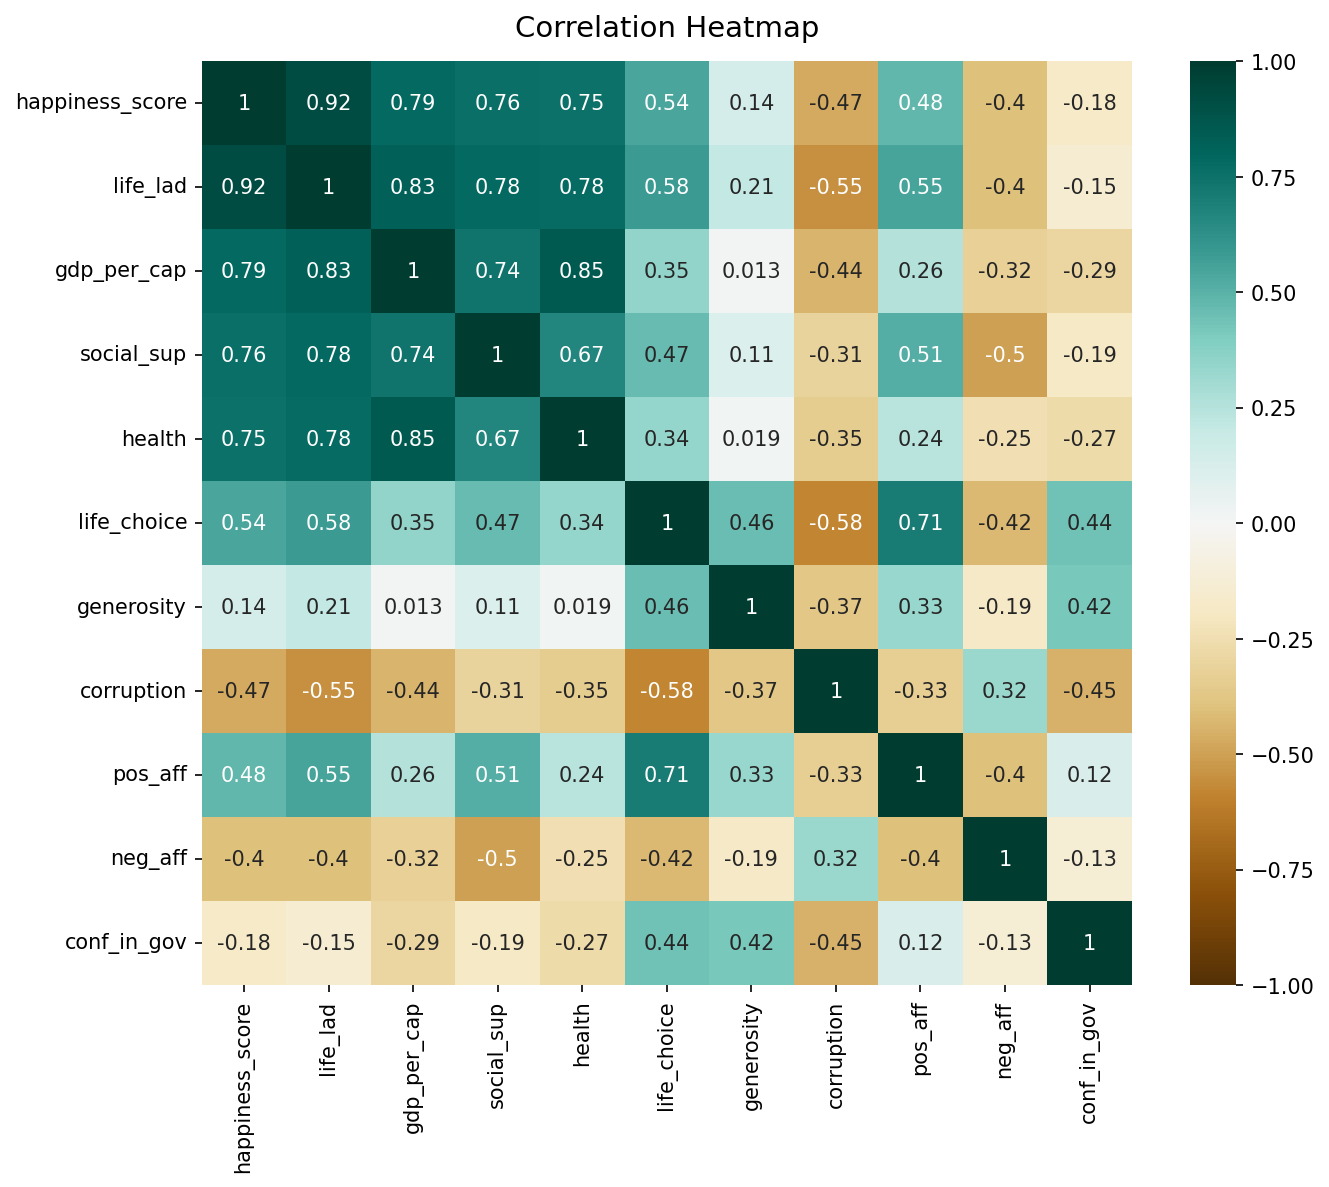

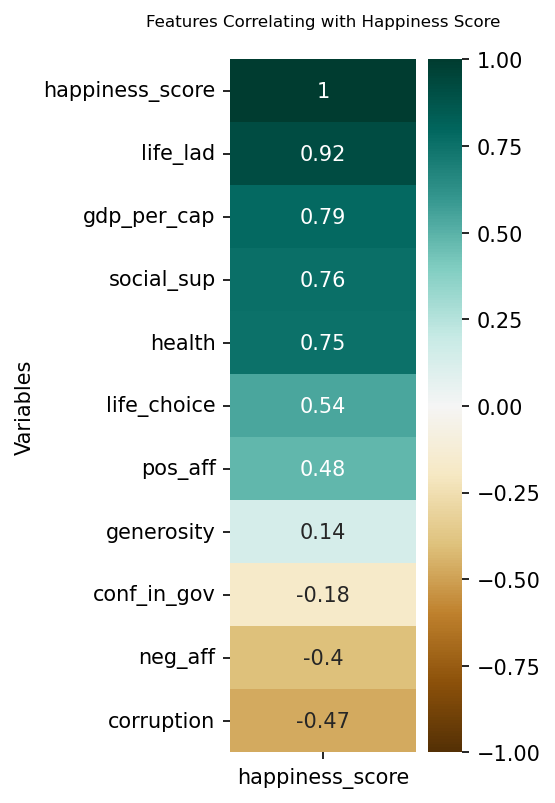

In [13]:
# Prepare DATA

nm_wh = wh.reset_index(drop=True)

# To clarify the previous plot, we will use a correlation tool to find out which variables support the happiness score

nm_wh = nm_wh.iloc[:,1:]

# Increase the size of the heatmap.
plt.figure(figsize=(10, 8), dpi=150 )

heatmap = sns.heatmap(nm_wh.corr(), vmin=-1, vmax=1, annot=True , cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

plt.figure(figsize=(2, 6), dpi=150 )
heatmap = sns.heatmap(nm_wh.corr()[['happiness_score']].sort_values(by='happiness_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Happiness Score', fontdict={'fontsize':8}, pad=16)
heatmap.set( ylabel='Variables')

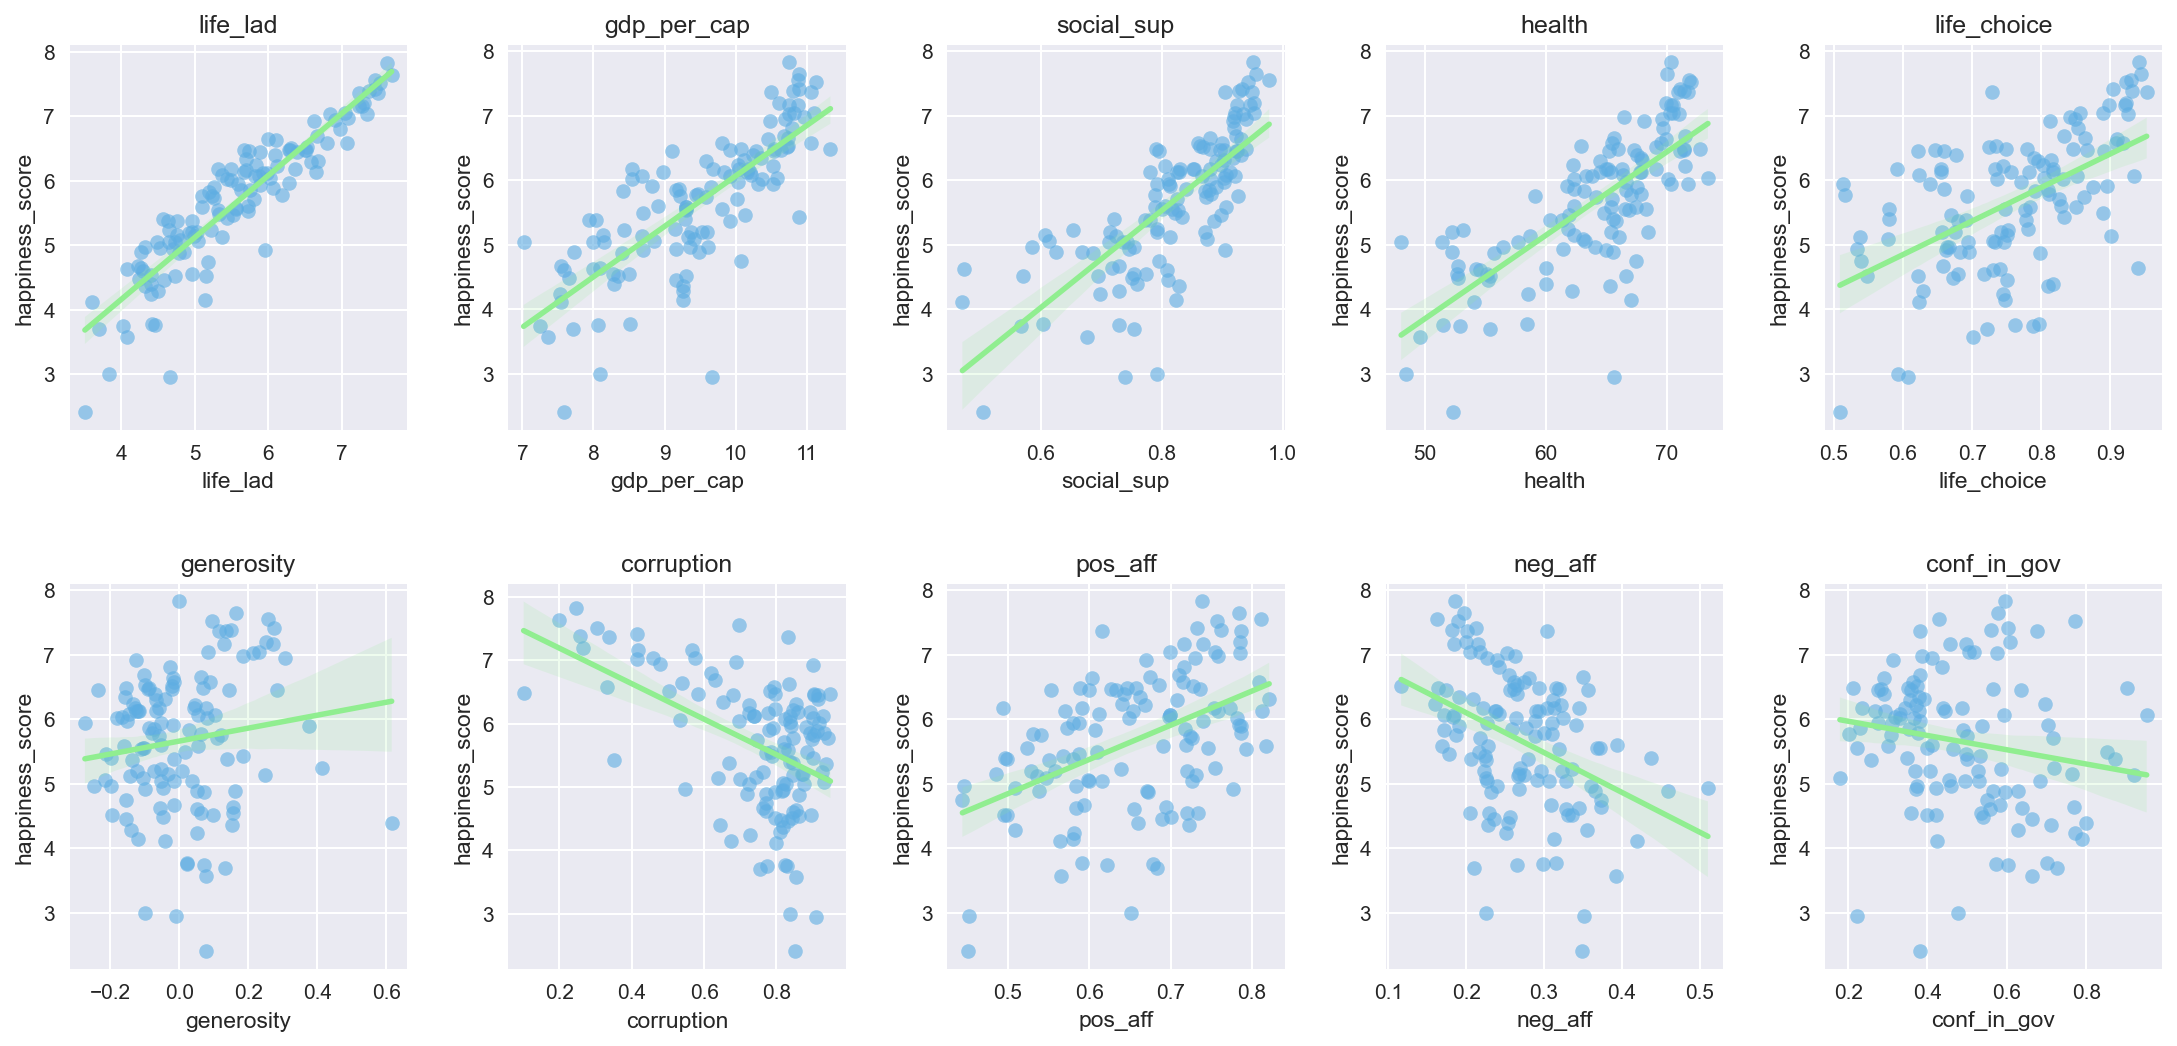

In [14]:
ptopic = [ 'life_lad','gdp_per_cap','social_sup',
    'health','life_choice','generosity','corruption','pos_aff',
    'neg_aff','conf_in_gov' ]

# Correlation Plot

plt.style.use('seaborn')
plt.figure(figsize=(18,8), dpi=150)

for i,j in enumerate(ptopic):
    plt.subplot(2, 5, i+1)
    sns.regplot(x=j, y="happiness_score", data = nm_wh , scatter_kws={"color": "#5DADE2","alpha": 0.6}, line_kws={"color": "#90EE90"} )
    plt.title(f"{j}")
    plt.subplots_adjust( wspace=0.3, hspace=0.4 )

# We can now say what the Happiest country should be by the graph
- Next step we will look at our country

ranking         country  happiness_score  life_lad  gdp_per_cap  \
13       14         Germany            7.034  6.837668    10.816555   
15       16   United States            6.977  7.081947    10.961868   
16       17  United Kingdom            6.943  6.914552    10.694497   
19       20          France            6.687  6.668876    10.675093   
26       27       Singapore            6.480  6.510156    11.333850   
30       31           Italy            6.467  6.296656    10.643934   
53       54           Japan            6.039  6.020960    10.588077   
58       59     South Korea            5.935  5.889748    10.521626   
60       61        Thailand            5.891  6.059321     9.654315   
71       72           China            5.585  5.098935     9.307982   
76       77         Vietnam            5.485  5.330300     8.700916   
94       95            Laos            5.140  4.995433     8.681383   

    social_sup     health  life_choice  generosity  corruption   pos_aff  \
13    0.920723  70.305000     0.856771    0.082055    0.573579  0.699729   
15    0.920423  66.492187     0.841647    0.185710    0.688247  0.758199   
16    0.939660  69.658750     0.849158    0.306616    0.479071  0.730204   
19    0.923638  71.537500     0.833298   -0.101873    0.628915  0.710316   
26    0.880581  72.774287     0.845741    0.068810    0.101037  0.646796   
30    0.897003  71.410938     0.646264   -0.021581    0.904323  0.626451   
53    0.902540  73.419062     0.804293   -0.167315    0.695123  0.698427   
58    0.792951  71.742187     0.638567   -0.052643    0.791622  0.579527   
60    0.889520  67.592186     0.874680    0.374681    0.911501  0.786996   
71    0.789159  67.432813     0.849859   -0.159535         NaN  0.690938   
76    0.822360  64.806250     0.889537    0.014862    0.787324  0.609056   
94    0.723901  58.722000     0.901149    0.247712    0.638897  0.731312   

     neg_aff  conf_in_gov  
13  0.204836     0.516785  
15  0.262641     0.387333  
16  0.226115     0.410635  
19  0.254552     0.380175  
26  0.163161     0.902406  
30  0.318653     0.282485  
53  0.182751     0.319329  
58  0.226342     0.311779  
60  0.190899     0.537601  
71  0.168280          NaN  
76  0.216705     0.853416  
94  0.274435     0.919905



Thailand's ranking is 61 from 146 countries
Right here we will show you 70 countries descending by happiness score below : 




[Text(0.5, 0, 'Happiness Score'), Text(0, 0.5, 'Country')]

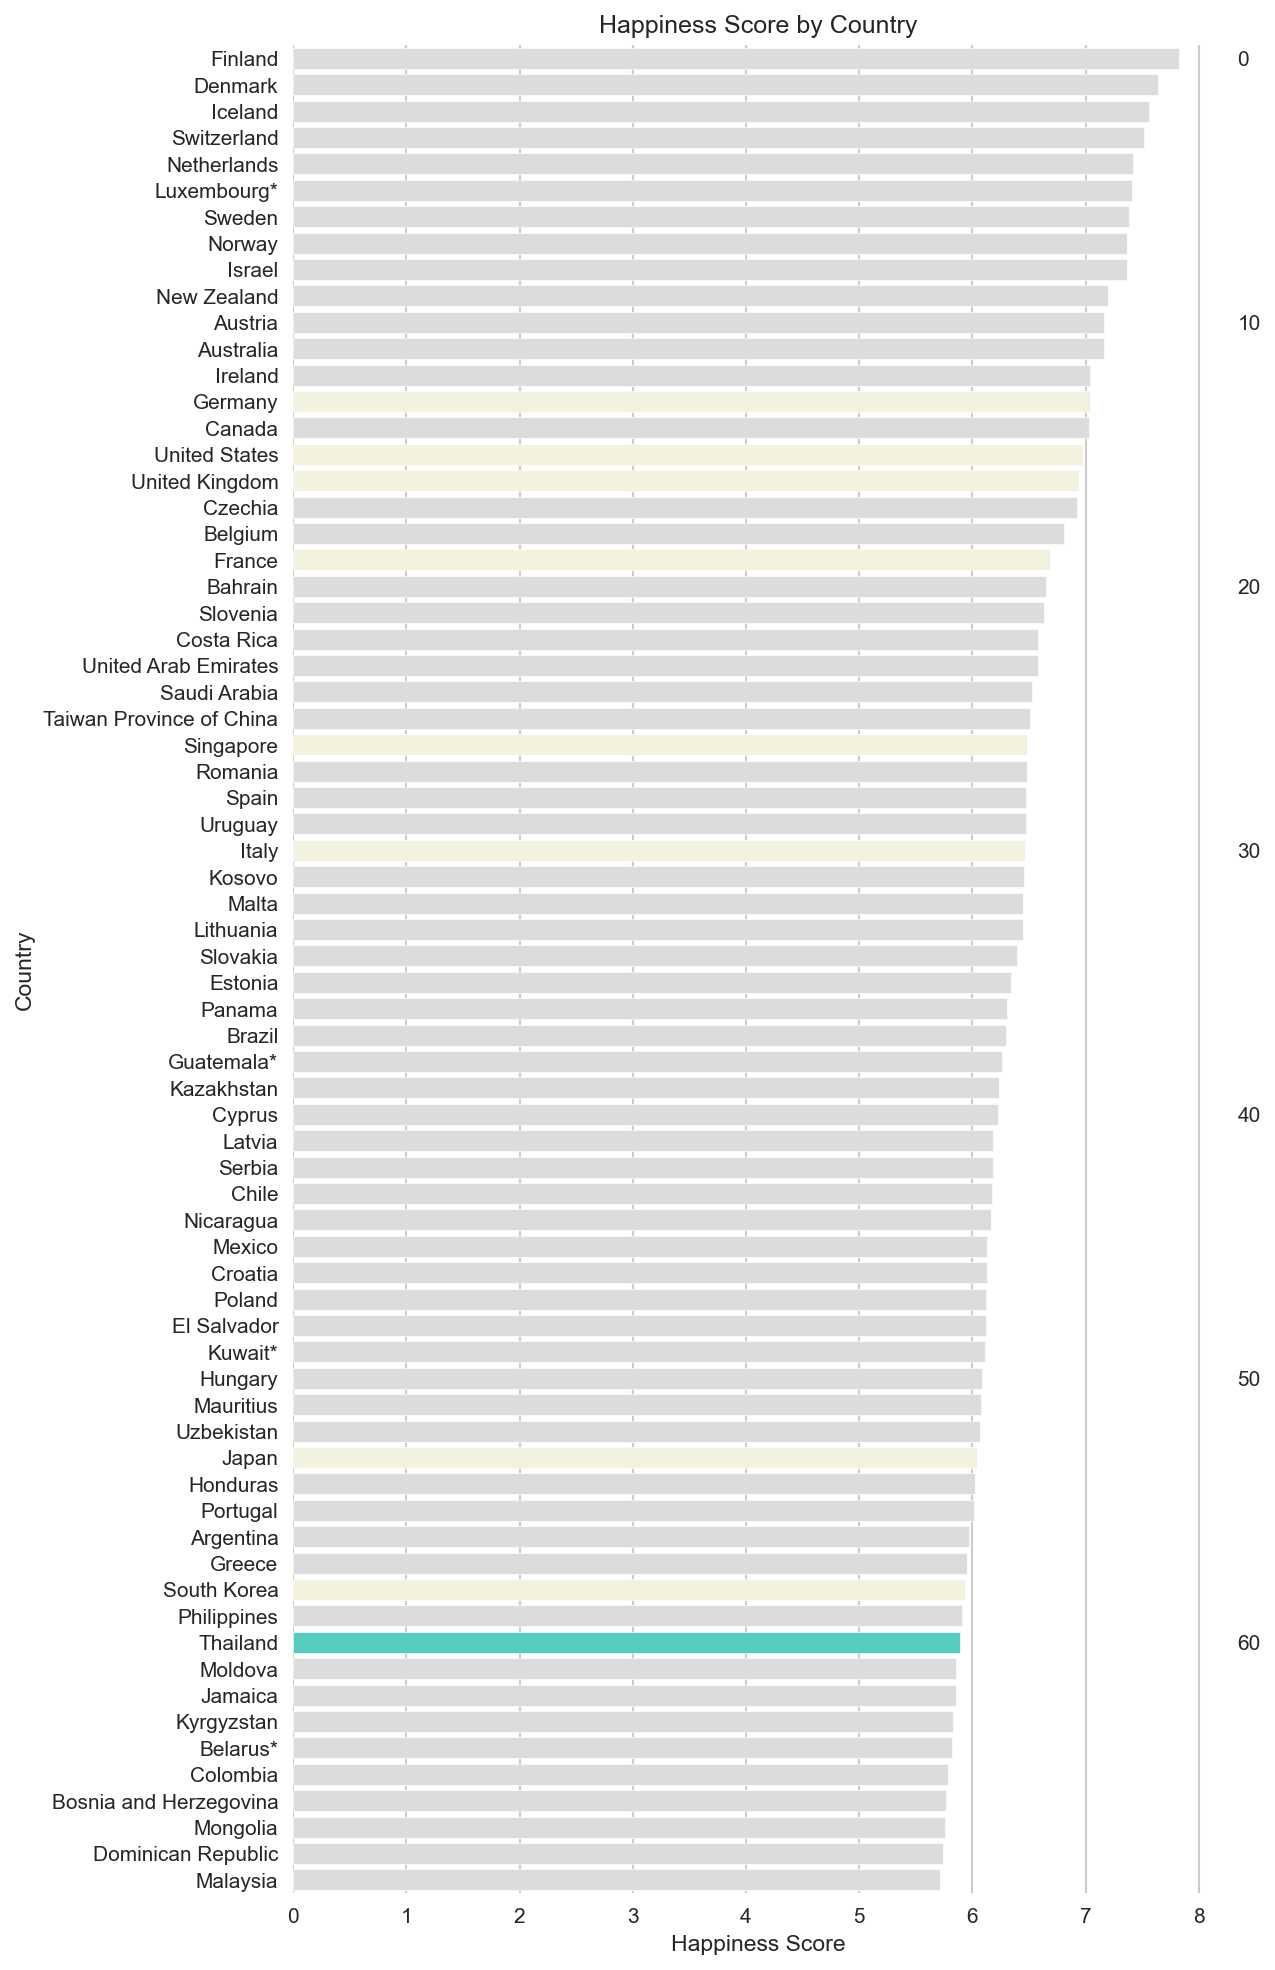

In [15]:
# Prepare DATA

rnk_wh = wh.reset_index(drop=False)

rnk_wh = rnk_wh.rename(columns={'index':'ranking'})
rnk_wh['ranking'] = rnk_wh['ranking'].apply( lambda x : x+1 )

# Find our country

scp = ['Thailand','United States','United Kingdom','France',"Germany",'Singapore','Italy','Japan','South Korea','Vietnam','Laos','Philipines','China']

display(rnk_wh.loc[rnk_wh['country'].isin(scp),:])
print(f"\n\nThailand's ranking is {rnk_wh.iloc[:61,:]['country'].count()} from {df_w_overall['Country'].count()-1} countries\n\
Right here we will show you 70 countries descending by happiness score below : \n\n")

# Plot

def set_custom_palette(series, max_color = 'turquoise' , sc_color = 'beige', other_color = 'gainsboro'):
    max_val = 5.891
    scope = [ 7.034,6.977,6.943,6.687,6.480,6.467,6.039,5.935 ]
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        elif item in scope:
            pal.append(sc_color)
        else:
            pal.append(other_color)
    return pal

sns.set_style("whitegrid")

plt.figure(figsize=(8,16), dpi=150 )
ax = sns.barplot(x = 'happiness_score', y = 'country', data=rnk_wh.iloc[:70,:], palette=set_custom_palette(rnk_wh.iloc[:70,:]['happiness_score']))
ax.set_title('Happiness Score by Country')
ax.secondary_yaxis("right" )
ax.set(xlabel='Happiness Score', ylabel= 'Country')


ranking      country  happiness_score  life_lad  gdp_per_cap  social_sup  \
4         5    Singapore            6.480  6.510156    11.333850    0.880581   
8         9        Japan            6.039  6.020960    10.588077    0.902540   
9        10  South Korea            5.935  5.889748    10.521626    0.792951   
10       11  Philippines            5.904  5.262097     8.827065    0.813253   
11       12     Thailand            5.891  6.059321     9.654315    0.889520   
14       15     Malaysia            5.711  5.812250    10.023438    0.824846   
15       16        China            5.585  5.098935     9.307982    0.789159   
16       17      Vietnam            5.485  5.330300     8.700916    0.822360   
17       18       Russia            5.459  5.516176    10.138076    0.898431   
23       24         Laos            5.140  4.995433     8.681383    0.723901   
28       29     Cambodia            4.640  4.269862     8.091874    0.718659   
30       31      Myanmar            4.394  4.399244     8.282771    0.759611   
33       34        India            3.777  4.415950     8.511713    0.604402   

       health  life_choice  generosity  corruption   pos_aff   neg_aff  \
4   72.774287     0.845741    0.068810    0.101037  0.646796  0.163161   
8   73.419062     0.804293   -0.167315    0.695123  0.698427  0.182751   
9   71.742187     0.638567   -0.052643    0.791622  0.579527  0.226342   
10  61.764062     0.895261   -0.018194    0.778223  0.784309  0.340549   
11  67.592186     0.874680    0.374681    0.911501  0.786996  0.190899   
14  65.500001     0.825721    0.108586    0.821053  0.725830  0.217987   
15  67.432813     0.849859   -0.159535         NaN  0.690938  0.168280   
16  64.806250     0.889537    0.014862    0.787324  0.609056  0.216705   
17  61.954687     0.669296   -0.212565    0.900183  0.587314  0.177973   
23  58.722000     0.901149    0.247712    0.638897  0.731312  0.274435   
28  60.006250     0.940514    0.155185    0.852599  0.695027  0.373687   
30  59.994500     0.816975    0.615505    0.642984  0.659451  0.253298   
33  58.481250     0.796141    0.022511    0.823960  0.591070  0.315042   

    conf_in_gov  
4      0.902406  
8      0.319329  
9      0.311779  
10     0.704757  
11     0.537601  
14     0.716833  
15          NaN  
16     0.853416  
17     0.496509  
23     0.919905  
28     0.769898  
30     0.800132  
33     0.701738



Thailand's ranking is 12 from 35 countries
Right here we will show you 70 countries descending by happiness score below : 




[Text(0.5, 0, 'Happiness Score'), Text(0, 0.5, 'Country')]

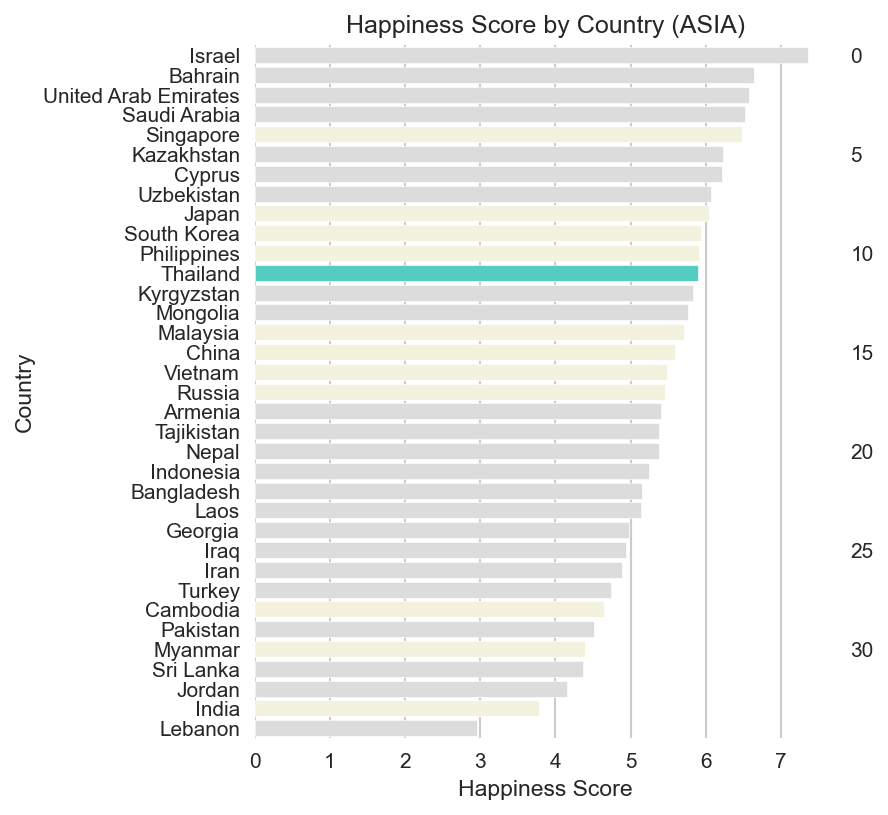

In [16]:
asia = [ 'Afganistan','Armenia','Azerbaijan','Bahrain','Bangladesh','Bhutan','Brunei','Cambodia','China',
'Cyprus','East Timor','Georgia','India','Indonesia','Iran','Iraq','Israel','Japan','Jordan','Kazakhstan',
'Kuwait','Kyrgyzstan','Laos','Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea',
'Oman','Pakistan','Philippines','Qatar','Russia','Saudi Arabia','Singapore','South Korea','Sri Lanka','Syria',
'Tajikistan','Thailand','Turkey','Turkmenistan','United Arab Emirates','Uzbekistan','Vietnam','Yemen' ]

# Prepare Asia DATA

asia_wh = wh.loc[wh['country'].isin(asia),:].reset_index(drop=True)

asia_wh = asia_wh.reset_index(drop=False).rename(columns={'index':'ranking'})
asia_wh['ranking'] = asia_wh['ranking'].apply( lambda x : x+1 )

# scope interests

scp_asia = [ 'Thailand','Singapore','Vietnam','Laos','Russia','Philippines','Myanmar','Japan','Cambodia','China','South Korea' ,'Malaysia','India' ]

display(asia_wh.loc[asia_wh['country'].isin(scp_asia),:])
print(f"\n\nThailand's ranking is {asia_wh.iloc[:12,:]['country'].count()} from {asia_wh['country'].count()} countries\n\
Right here we will show you 70 countries descending by happiness score below : \n\n")

# Plot

def set_custom_palette2(series, max_color = 'turquoise' , sc_color = 'beige', other_color = 'gainsboro'):
    max_val = 5.891
    scope = [ 5.459,6.480,6.039,5.935,5.904,5.711,5.585,5.485,5.459,5.104,4.640,4.394,3.777 ]
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        elif item in scope:
            pal.append(sc_color)
        else:
            pal.append(other_color)
    return pal

sns.set_style("whitegrid")

plt.figure(figsize=(5,6), dpi=150 )
ax = sns.barplot(x = 'happiness_score', y = 'country', data=asia_wh, palette=set_custom_palette2(asia_wh['happiness_score']))
ax.set_title('Happiness Score by Country (ASIA)')
ax.secondary_yaxis("right" )
ax.set(xlabel='Happiness Score', ylabel= 'Country')

# What about 'Thailand' ?
we will compare between :
- Thailand ( our country )
- Finland ( The Happiest country in the world )

In [17]:
# find a country that has a happiness score around the median from normalized file (it means a happiness score of around 0.5)

st_wh.iloc[ 80:100,: ]

country  happiness_score  life_lad  gdp_per_cap  social_sup  \
80      Ivory Coast         0.522614  0.274186     0.328596    0.360673   
81  North Macedonia         0.515968  0.348108     0.597869    0.635157   
82          Albania         0.515968  0.366571     0.546909    0.482154   
83     South Africa         0.515045  0.338337     0.580055    0.789326   
84       Bangladesh         0.507846  0.299108     0.257508    0.268780   
85             Laos         0.505077  0.356787     0.385348    0.499148   
86          Algeria         0.501754  0.448220     0.536588    0.677583   
87          Ukraine         0.494739  0.310322     0.554633    0.796201   
88          Morocco         0.490308  0.369297     0.424634    0.282754   
89       Mozambique         0.488093  0.295252     0.000000    0.537217   
90         Cameroon         0.488093  0.272542     0.260657    0.478243   
91          Senegal         0.487724  0.235835     0.226572    0.522857   
92          Georgia         0.474248  0.195362     0.542273    0.225432   
93            Gabon         0.471479  0.246428     0.601534    0.559000   
94             Iraq         0.468340  0.288170     0.495836    0.542221   
95        Venezuela         0.465387  0.588421     0.387908    0.854345   
96           Guinea         0.459110  0.182163     0.165333    0.304686   
97             Iran         0.458556  0.324148     0.570718    0.389935   
98            Ghana         0.455603  0.307963     0.321386    0.424314   
99           Turkey         0.431973  0.401981     0.709124    0.641338   

      health  life_choice  generosity  corruption   pos_aff   neg_aff  \
80  0.201932     0.547205    0.249203    0.779348  0.517446  0.557680   
81  0.685338     0.331286    0.317743    0.910020  0.223381  0.523753   
82  0.804476     0.373880    0.225810    0.908165  0.302659  0.455907   
83  0.166083     0.526089    0.168442    0.878156  0.732295  0.269537   
84  0.564384     0.545351    0.271178    0.756528  0.108972  0.383696   
85  0.420822     0.883875    0.586642    0.634177  0.761352  0.401182   
86  0.710784     0.066147    0.147919    0.705404  0.244463  0.380198   
87  0.591933     0.157779    0.190389    0.979747  0.272146  0.275475   
88  0.600729     0.497533    0.066828    0.846809  0.410786  0.441260   
89  0.000000     0.536452    0.349797    0.733652  0.411221  0.535846   
90  0.134187     0.505336    0.290149    0.914864  0.454954  0.482209   
91  0.382518     0.418521    0.249097    0.853596  0.748683  0.278600   
92  0.632079     0.348215    0.029920    0.525032  0.006521  0.313958   
93  0.333348     0.355869    0.084928    0.845399  0.370823  0.620228   
94  0.528887     0.054688    0.255422    0.840682  0.170776  1.000000   
95  0.667744     0.345469    0.194876    0.820592  0.880904  0.385075   
96  0.165775     0.420055    0.365185    0.789974  0.603015  0.631837   
97  0.690883     0.393114    0.488826    0.729212  0.249951  0.870728   
98  0.303887     0.652445    0.386997    0.898533  0.605127  0.292617   
99  0.765549     0.070002    0.134426    0.789423  0.000000  0.649937   

    conf_in_gov  
80     0.526379  
81     0.245572  
82     0.293735  
83     0.449424  
84     0.757427  
85     0.957718  
86          NaN  
87     0.000000  
88     0.356262  
89     0.650950  
90     0.455006  
91     0.406644  
92     0.360795  
93     0.252278  
94     0.313176  
95     0.248607  
96     0.498145  
97     0.581429  
98     0.537184  
99     0.478311



------ we will compare 'Thailand ( our country )' vs 'Finland ( The Happiest country in the world )' vs 'Afghanistan ( The lowest happiness country in the world ) and 'Bangladesh (Median happiness)' ------ 


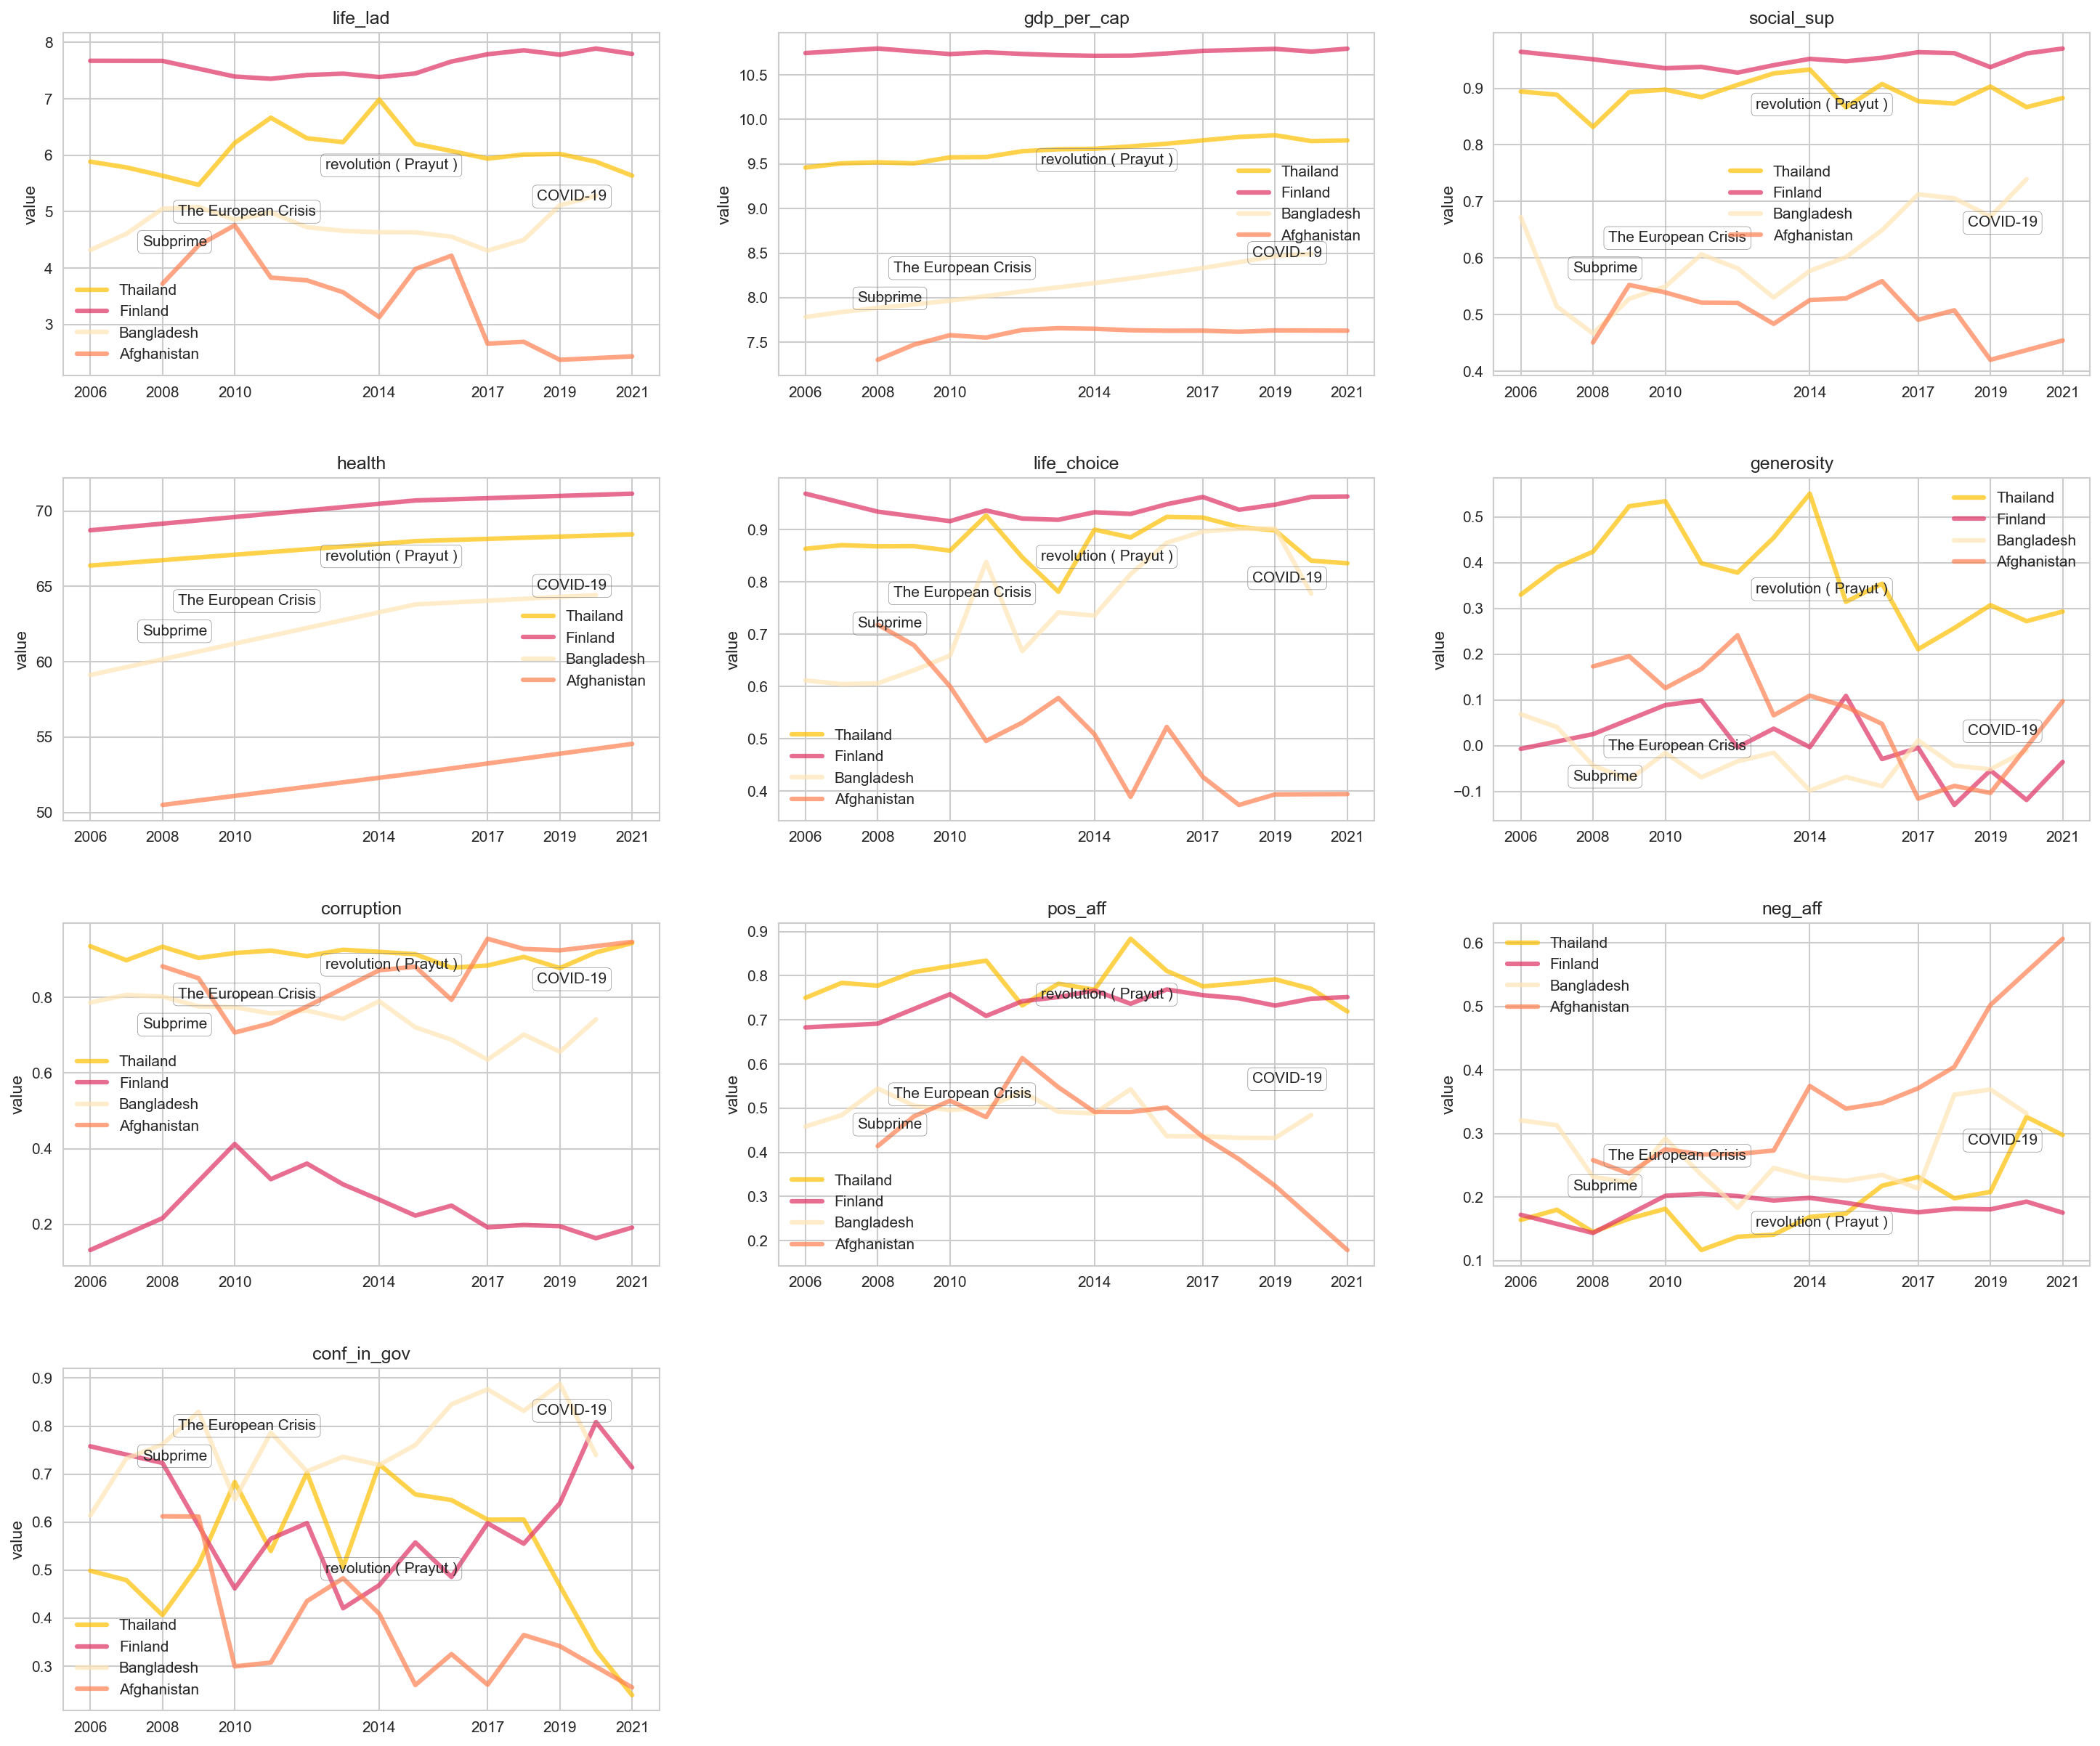

In [18]:
# Scope our interest

interest = ['Finland','Denmark','Iceland','Switzerland','Netherlands','Sweden','Thailand','Afghanistan','Israel','Laos','Bangladesh']

inter_df = df.loc[df['country_name'].isin(interest),:]

th_hp = inter_df.loc[inter_df['country_name']=='Thailand', : ]
fn_hp = inter_df.loc[inter_df['country_name']=='Finland', : ]

al_hp = inter_df.loc[inter_df['country_name']=='Bangladesh', : ]
af_hp = inter_df.loc[inter_df['country_name']=='Afghanistan', : ]

print(f"\n\n{'-'*6} we will compare \'Thailand ( our country )\' vs \'Finland ( The Happiest country in the world )\' vs \
\'Afghanistan ( The lowest happiness country in the world ) and \'Bangladesh (Median happiness)\' {'-'*6} ")

# PLOT

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24,20), dpi=150)

for i,j in enumerate(th_hp) :
    if i >1 :
        plt.subplot(4, 3, i-1)
        plt.plot(th_hp['year'], th_hp[j],color='#FFBF00', marker='', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=0.7 ,label="Thailand" )
        plt.plot(fn_hp['year'], fn_hp[j],color='#DE3163', marker='', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=0.7 ,label="Finland" )
        plt.plot(al_hp['year'], al_hp[j],color='#FFE4B5', marker='', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=0.7 ,label="Bangladesh" )

        plt.plot(af_hp['year'], af_hp[j],color='#FF7F50', marker='', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=0.7 ,label="Afghanistan" )
        plt.title(f"{j}");plt.xticks([0,2,4,8,11,13,15]);plt.ylabel("value");plt.legend(loc="best" )
        plt.subplots_adjust( wspace=0.2, hspace=0.3 )
        plt.annotate("Subprime", 
             xy=('2008', al_hp[j].median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,-10), textcoords='offset points', ha='center', 
             )
        plt.annotate("The European Crisis", 
             xy=('2010', al_hp[j].median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,10), textcoords='offset points', ha='center', 
             )
        plt.annotate("revolution ( Prayut )", 
             xy=('2014', th_hp[j].median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,-10), textcoords='offset points', ha='center', 
             )
        plt.annotate("COVID-19", 
             xy=('2019', al_hp[j].median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,20), textcoords='offset points', ha='center', 
             )



------ we will compare 'Thailand ( our country )' vs 'Finland ( The Happiest country in the world )' vs 'Afghanistan ( The lowest happiness country in the world ) and 'Israel (Model happiness)' ------ 


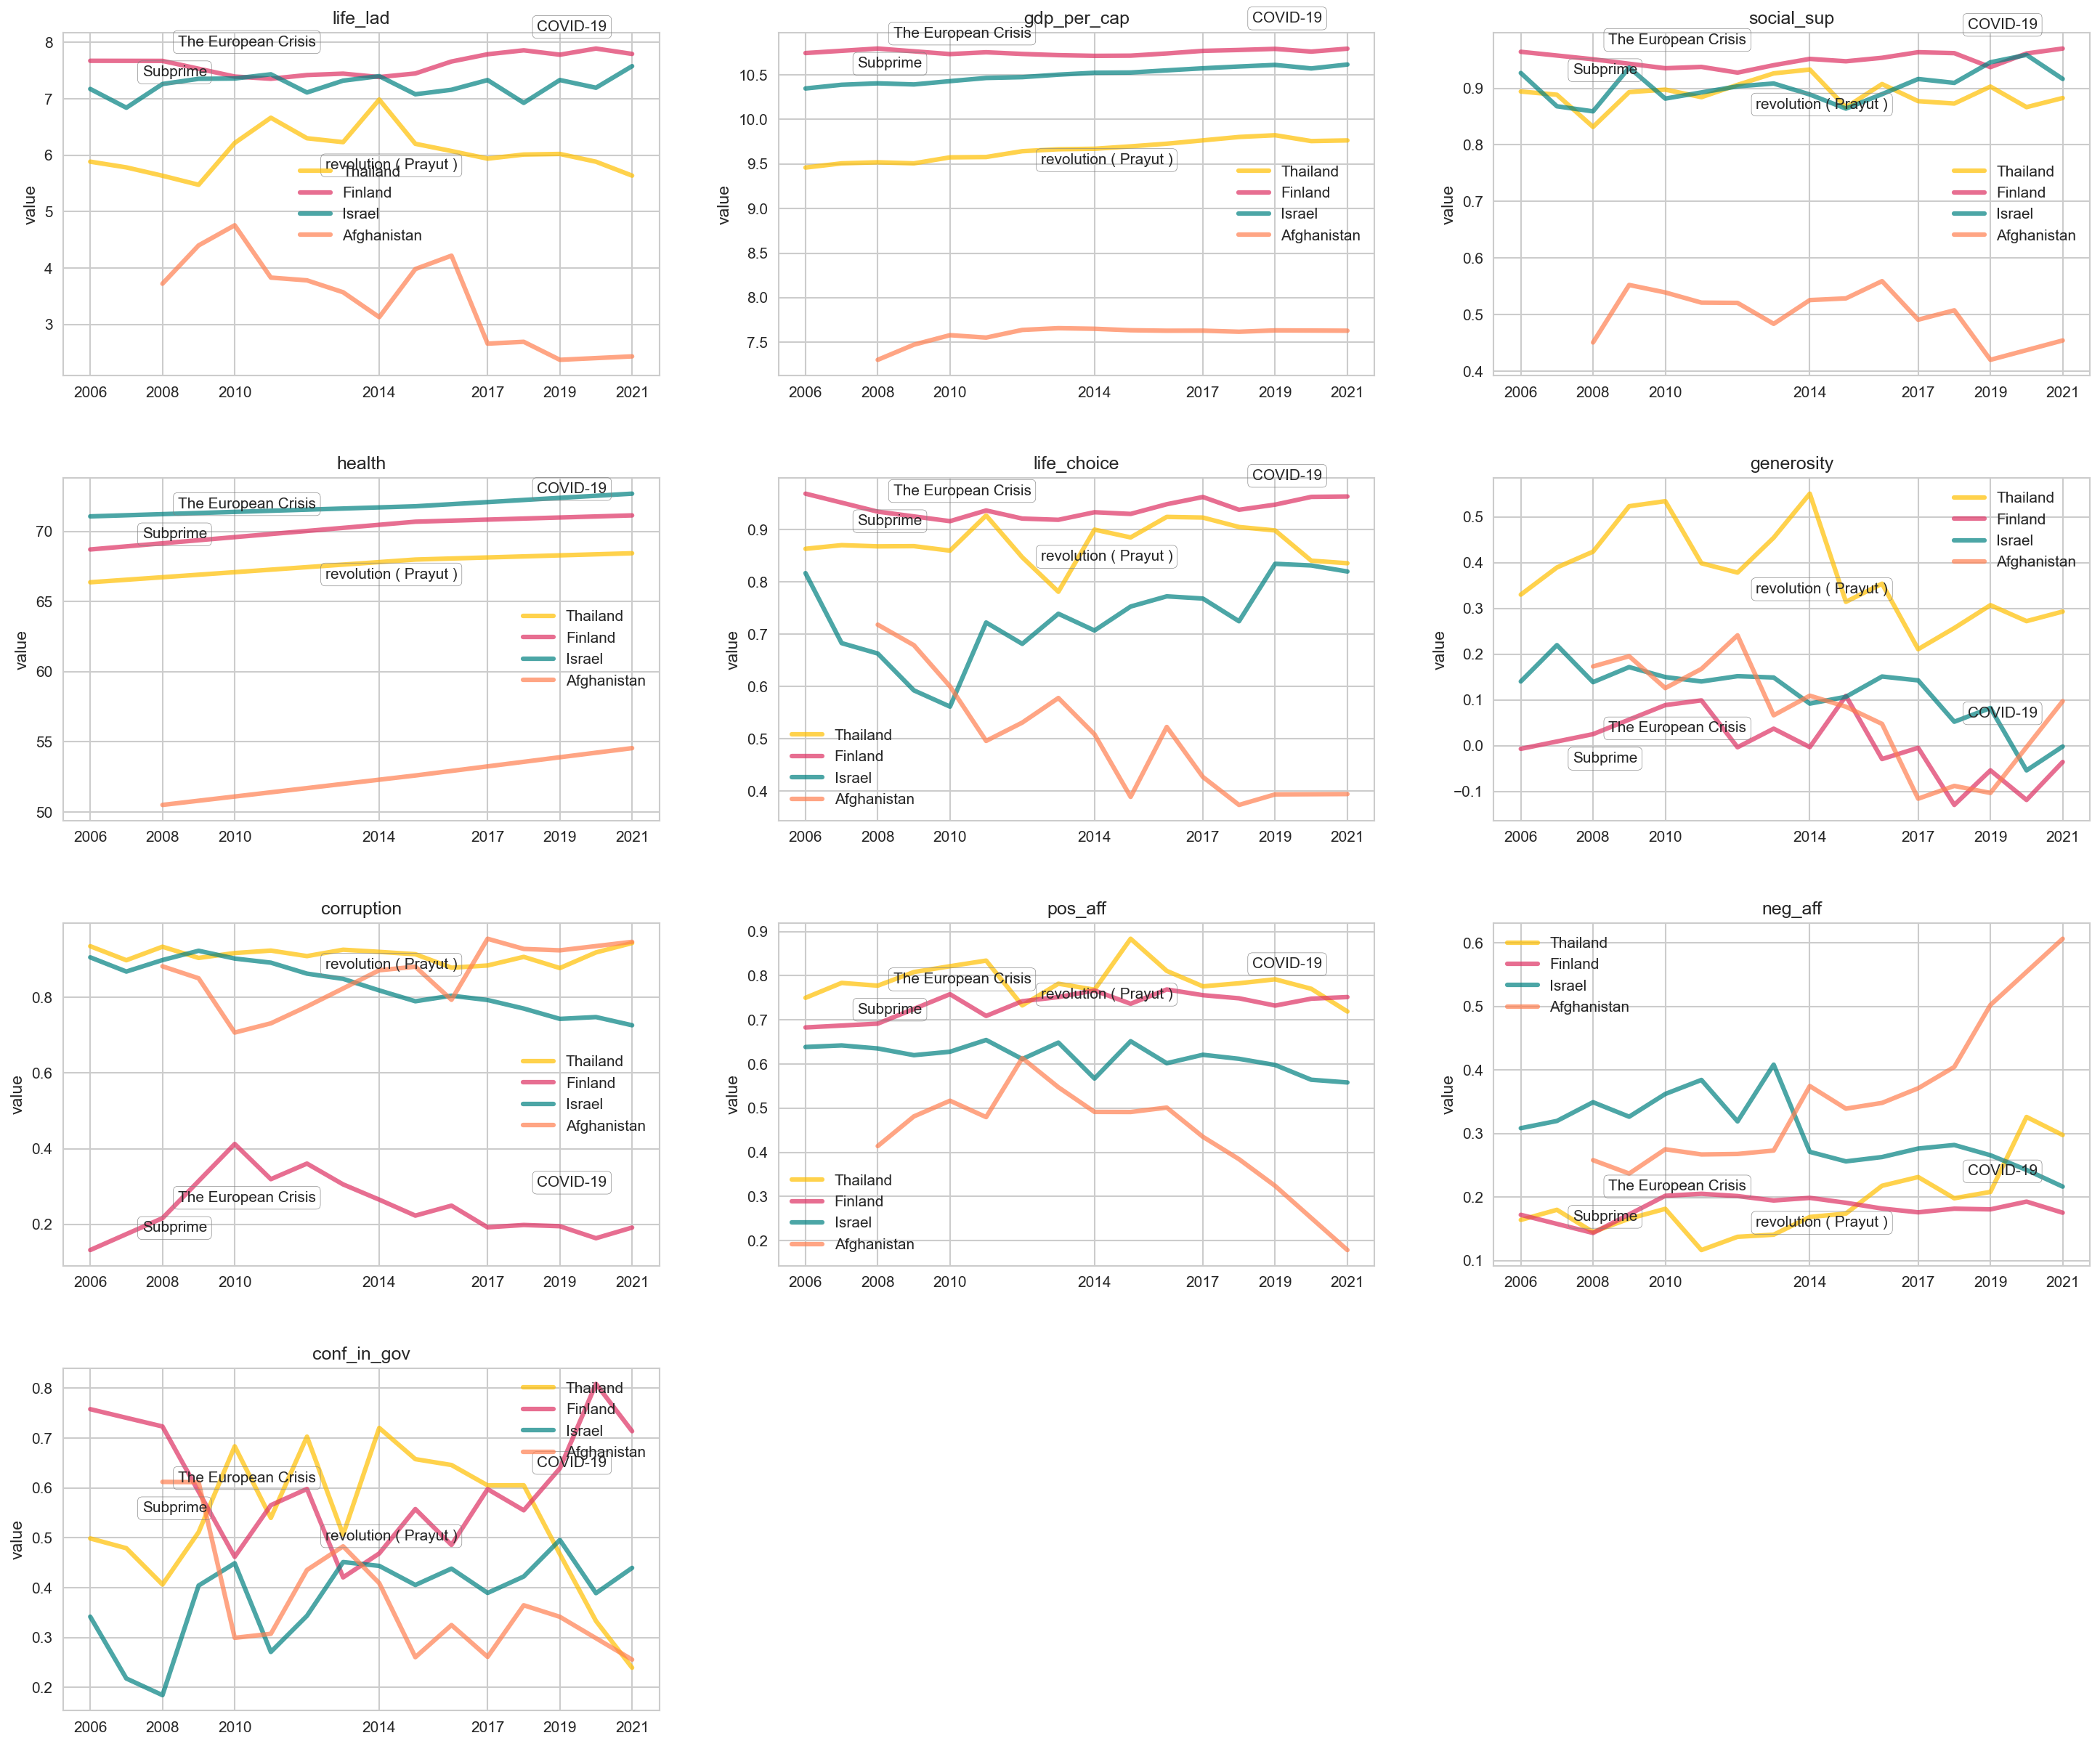

In [44]:
# Scope our interest

is_hp = inter_df.loc[inter_df['country_name']=='Israel', : ]

print(f"\n\n{'-'*6} we will compare \'Thailand ( our country )\' vs \'Finland ( The Happiest country in the world )\' vs \
\'Afghanistan ( The lowest happiness country in the world ) and \'Israel (Model happiness)\' {'-'*6} ")

# PLOT

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24,20), dpi=150)

for i,j in enumerate(th_hp) :
    if i >1 :
        plt.subplot(4, 3, i-1)
        plt.plot(th_hp['year'], th_hp[j],color='#FFBF00', marker='', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=0.7 ,label="Thailand" )
        plt.plot(fn_hp['year'], fn_hp[j],color='#DE3163', marker='', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=0.7 ,label="Finland" )

        plt.plot(is_hp['year'], is_hp[j],color='#008080', marker='', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=0.7 ,label="Israel" )

        plt.plot(af_hp['year'], af_hp[j],color='#FF7F50', marker='', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=0.7 ,label="Afghanistan" )

        plt.title(f"{j}");plt.xticks([0,2,4,8,11,13,15]);plt.ylabel("value");plt.legend(loc="best" )
        plt.subplots_adjust( wspace=0.2, hspace=0.3 )
        plt.annotate("Subprime", 
             xy=('2008', fn_hp[j].median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,-10), textcoords='offset points', ha='center', 
             )
        plt.annotate("The European Crisis", 
             xy=('2010', fn_hp[j].median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,10), textcoords='offset points', ha='center', 
             )
        plt.annotate("revolution ( Prayut )", 
             xy=('2014', th_hp[j].median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,-10), textcoords='offset points', ha='center', 
             )
        plt.annotate("COVID-19", 
             xy=('2019', fn_hp[j].median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,20), textcoords='offset points', ha='center', 
             )

now, what's next? <br>
We will gain insights from other files

In [20]:
# import another DATA

#wdi = pd.read_csv('https://media.githubusercontent.com/media/HikariJadeEmpire/TH_WLRD_Happiness_Project/main/WDI_CSV/WDIData.csv') # in case you working on GitHubCodespace
wdi = pd.read_csv('~/Documents/DATAScience/Github/TH_WLRD_Happiness_Project/WDI_CSV/WDIData.csv') # for mac
#wdi = pd.read_csv('D:\DATA Science\DATASET\World_Happiness\WDI_CSV\WDIData.csv') # for Windows

# rename the column of the WDI file

wdi.rename(columns={ 'Country Name':'country_name','Country Code':'country_code','Indicator Name':'indicator_name','Indicator Code':'indicator_code' },inplace=True )

# Scope our interests

selection = [ 'Access to clean fuels and technologies for cooking (% of population)','Access to electricity (% of population)','Birth rate, crude (per 1,000 people)',
             'Death rate, crude (per 1,000 people)','Domestic private health expenditure per capita (current US$)','Electric power consumption (kWh per capita)',
              'Forest area (% of land area)','PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)','Population density (people per sq. km of land area)',
              'Population growth (annual %)',
              'Population, female (% of total population)','Population, male (% of total population)','Population, total',
              'Suicide mortality rate (per 100,000 population)','Trade (% of GDP)',
               'Unemployment, total (% of total labor force) (national estimate)' ]

df_wdi = wdi.loc[ wdi['indicator_name'].isin(selection) ,['country_name','indicator_name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'
                                                          ,'2016','2017','2018','2019','2020','2021' ] ]

display( df_wdi.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256 entries, 0 to 383531
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    4256 non-null   object 
 1   indicator_name  4256 non-null   object 
 2   2006            3620 non-null   float64
 3   2007            3619 non-null   float64
 4   2008            3617 non-null   float64
 5   2009            3631 non-null   float64
 6   2010            3889 non-null   float64
 7   2011            3881 non-null   float64
 8   2012            3890 non-null   float64
 9   2013            3885 non-null   float64
 10  2014            3902 non-null   float64
 11  2015            3685 non-null   float64
 12  2016            3689 non-null   float64
 13  2017            3699 non-null   float64
 14  2018            3447 non-null   float64
 15  2019            3452 non-null   float64
 16  2020            2952 non-null   float64
 17  2021            1376 non-null  

None

In [21]:
# take a look and filter

yearss = [ '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021' ]

wdi_pv = df_wdi.melt( id_vars=['country_name','indicator_name'], value_vars=yearss )
wdi_pv.rename(columns={ 'variable':'year' },inplace=True )

# separate grouped file (just for look)

wdi_pv_look = wdi_pv.pivot_table( index=['country_name','year'], columns=['indicator_name'], values='value' )

print( f" \n{'-'*6} List of scope column {'-'*6}\n\n " )
display( wdi_pv_look.info() )
display( wdi_pv_look )


 
------ List of scope column ------

 
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4240 entries, ('Afghanistan', '2006') to ('Zimbabwe', '2021')
Data columns (total 16 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Access to clean fuels and technologies for cooking (% of population)    3566 non-null   float64
 1   Access to electricity (% of population)                                 3949 non-null   float64
 2   Birth rate, crude (per 1,000 people)                                    3878 non-null   float64
 3   Death rate, crude (per 1,000 people)                                    3876 non-null   float64
 4   Domestic private health expenditure per capita (current US$)            3292 non-null   float64
 5   Electric power consumption (kWh per capita)                             1673 non-null   float64
 6   Fo

None

indicator_name     Access to clean fuels and technologies for cooking (% of population)  \
country_name year                                                                         
Afghanistan  2006                                              13.85                      
             2007                                              15.30                      
             2008                                              16.70                      
             2009                                              18.40                      
             2010                                              20.00                      
...                                                              ...                      
Zimbabwe     2017                                              29.80                      
             2018                                              29.90                      
             2019                                              30.10                      
             2020                                              30.40                      
             2021                                                NaN                      

indicator_name     Access to electricity (% of population)  \
country_name year                                            
Afghanistan  2006                                30.718691   
             2007                                36.051010   
             2008                                42.400002   
             2009                                46.740051   
             2010                                42.700001   
...                                                    ...   
Zimbabwe     2017                                44.178635   
             2018                                45.572647   
             2019                                46.781475   
             2020                                52.747669   
             2021                                      NaN   

indicator_name     Birth rate, crude (per 1,000 people)  \
country_name year                                         
Afghanistan  2006                                44.721   
             2007                                43.858   
             2008                                41.506   
             2009                                41.157   
             2010                                40.602   
...                                                 ...   
Zimbabwe     2017                                32.516   
             2018                                32.074   
             2019                                31.518   
             2020                                31.009   
             2021                                   NaN   

indicator_name     Death rate, crude (per 1,000 people)  \
country_name year                                         
Afghanistan  2006                                 9.679   
             2007                                 9.359   
             2008                                 8.832   
             2009                                 8.535   
             2010                                 8.254   
...                                                 ...   
Zimbabwe     2017                                 8.266   
             2018                                 7.972   
             2019                                 8.043   
             2020                                 8.132   
             2021                                   NaN   

indicator_name     Domestic private health expenditure per capita (current US$)  \
country_name year                                                                 
Afghanistan  2006                                          21.385438              
             2007                                          24.445191              
             2008                                          28.730696              
             2009                                         

In [22]:
# Prepare DATA

new_df = df

# Topic selection and rename columns

newname = [ 'acc_to_clnfuels_per','acc_to_electrics_per','birth_r','death_r','dm_hlth_expend','electric_consump','forest_area_per',
'pm25','pop_dens','pop_growth','pop_f_per','pop_m_per','pop_total','suicide','trade_per_gdp','unemploy' ]

for i in range(len(newname)):
    pm25 = wdi_pv[ wdi_pv['indicator_name'] == selection[i]].groupby('country_name',group_keys=False).apply( lambda x: x.sort_values(by='year') )
    pm25 = pm25.loc[:,['country_name','year','value']]

    new_df = pd.merge( new_df,pm25,left_on=['country_name','year'],right_on=['country_name','year'] ).rename( columns={'value':newname[i]} )

print(f" \n\n{'-'*4} DATA Before clean {'-'*4}\n\n ")
display(new_df.info())
display(new_df)

 

---- DATA Before clean ----

 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1829
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_name          1830 non-null   object 
 1   year                  1830 non-null   object 
 2   life_lad              1830 non-null   float64
 3   gdp_per_cap           1825 non-null   float64
 4   social_sup            1829 non-null   float64
 5   health                1815 non-null   float64
 6   life_choice           1830 non-null   float64
 7   generosity            1825 non-null   float64
 8   corruption            1801 non-null   float64
 9   pos_aff               1828 non-null   float64
 10  neg_aff               1829 non-null   float64
 11  conf_in_gov           1741 non-null   float64
 12  acc_to_clnfuels_per   1686 non-null   float64
 13  acc_to_electrics_per  1718 non-null   float64
 14  birth_r               1724 non-null   

None

country_name  year  life_lad  gdp_per_cap  social_sup     health  \
0     Afghanistan  2008  3.723590     7.302574    0.450662  50.500000   
1     Afghanistan  2009  4.401778     7.472446    0.552308  50.799999   
2     Afghanistan  2010  4.758381     7.579183    0.539075  51.099998   
3     Afghanistan  2011  3.831719     7.552006    0.521104  51.400002   
4     Afghanistan  2012  3.782938     7.637953    0.520637  51.700001   
...           ...   ...       ...          ...         ...        ...   
1825     Zimbabwe  2017  3.638300     8.241609    0.754147  52.150002   
1826     Zimbabwe  2018  3.616480     8.274620    0.775388  52.625000   
1827     Zimbabwe  2019  2.693523     8.196998    0.759162  53.099998   
1828     Zimbabwe  2020  3.159802     8.117733    0.717243  53.575001   
1829     Zimbabwe  2021  3.154578     8.153248    0.685151  54.049999   

      life_choice  generosity  corruption   pos_aff  ...  forest_area_per  \
0        0.718114    0.173169    0.881686  0.414297  ...         1.852782   
1        0.678896    0.195469    0.850035  0.481421  ...         1.852782   
2        0.600127    0.125859    0.706766  0.516907  ...         1.852782   
3        0.495901    0.167723    0.731109  0.479835  ...         1.852782   
4        0.530935    0.241247    0.775620  0.613513  ...         1.852782   
...           ...         ...         ...       ...  ...              ...   
1825     0.752826   -0.113937    0.751208  0.733641  ...        45.451183   
1826     0.762675   -0.084747    0.844209  0.657524  ...        45.332093   
1827     0.631908   -0.081540    0.830652  0.658434  ...        45.213002   
1828     0.643303   -0.029376    0.788523  0.660658  ...        45.093912   
1829     0.667636   -0.109439    0.756945  0.609917  ...              NaN   

           pm25   pop_dens  pop_growth  pop_f_per  pop_m_per   pop_total  \
0           NaN  40.518221    2.002333  49.525460  50.474536  26427199.0   
1           NaN  41.987193    3.561288  49.505857  50.494146  27385307.0   
2     65.245592  43.220447    2.894904  49.483708  50.516292  28189672.0   
3     66.835727  44.844851    3.689508  49.467665  50.532335  29249157.0   
4     66.023174  46.711251    4.077628  49.455577  50.544420  30466479.0   
...         ...        ...         ...        ...        ...         ...   
1825  22.251671  38.131320    2.043620  52.948393  47.051613  14751101.0   
1826        NaN  38.909614    2.020537  52.923755  47.076238  15052184.0   
1827        NaN  39.691374    1.989253  52.900198  47.099796  15354608.0   
1828        NaN  40.505793    2.031112  52.869327  47.130679  15669666.0   
1829        NaN        NaN    2.045715  52.832847  47.167153  15993524.0   

      suicide  trade_per_gdp  unemploy  
0         4.6            NaN      2.49  
1         4.4            NaN       NaN  
2         4.3            NaN       NaN  
3         4.1            NaN       NaN  
4         4.0            NaN      1.69  
...       ...            ...       ...  
1825     15.0      50.029712       NaN  
1826     14.0      54.550270       NaN  
1827     14.1      52.687570      7.37  
1828      NaN      54.650561       NaN  
1829      NaN      56.312680       NaN  

[1830 rows x 28 columns]

# Again, Check outliers in case we need to do something with the overall mean, median, or something in the big picture
- but right now, we still don't need them yet

In [23]:
# Replace NaN by median respect to country

for j,name in enumerate(list(new_df)):
    if j > 2 :
        new_df[name].fillna(new_df.groupby(['country_name'])[name].transform('median'),inplace=True)

print(f" \n\n{'-'*4} DATA After clean {'-'*4}\n\n ")
display(new_df.info())

new_df.head()

 

---- DATA After clean ----

 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1829
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_name          1830 non-null   object 
 1   year                  1830 non-null   object 
 2   life_lad              1830 non-null   float64
 3   gdp_per_cap           1825 non-null   float64
 4   social_sup            1829 non-null   float64
 5   health                1815 non-null   float64
 6   life_choice           1830 non-null   float64
 7   generosity            1825 non-null   float64
 8   corruption            1801 non-null   float64
 9   pos_aff               1828 non-null   float64
 10  neg_aff               1829 non-null   float64
 11  conf_in_gov           1741 non-null   float64
 12  acc_to_clnfuels_per   1794 non-null   float64
 13  acc_to_electrics_per  1830 non-null   float64
 14  birth_r               1830 non-null   f

None

country_name  year  life_lad  gdp_per_cap  social_sup     health  \
0  Afghanistan  2008  3.723590     7.302574    0.450662  50.500000   
1  Afghanistan  2009  4.401778     7.472446    0.552308  50.799999   
2  Afghanistan  2010  4.758381     7.579183    0.539075  51.099998   
3  Afghanistan  2011  3.831719     7.552006    0.521104  51.400002   
4  Afghanistan  2012  3.782938     7.637953    0.520637  51.700001   

   life_choice  generosity  corruption   pos_aff  ...  forest_area_per  \
0     0.718114    0.173169    0.881686  0.414297  ...         1.852782   
1     0.678896    0.195469    0.850035  0.481421  ...         1.852782   
2     0.600127    0.125859    0.706766  0.516907  ...         1.852782   
3     0.495901    0.167723    0.731109  0.479835  ...         1.852782   
4     0.530935    0.241247    0.775620  0.613513  ...         1.852782   

        pm25   pop_dens  pop_growth  pop_f_per  pop_m_per   pop_total  \
0  61.309700  40.518221    2.002333  49.525460  50.474536  26427199.0   
1  61.309700  41.987193    3.561288  49.505857  50.494146  27385307.0   
2  65.245592  43.220447    2.894904  49.483708  50.516292  28189672.0   
3  66.835727  44.844851    3.689508  49.467665  50.532335  29249157.0   
4  66.023174  46.711251    4.077628  49.455577  50.544420  30466479.0   

   suicide  trade_per_gdp  unemploy  
0      4.6            NaN      2.49  
1      4.4            NaN      5.20  
2      4.3            NaN      5.20  
3      4.1            NaN      5.20  
4      4.0            NaN      1.69  

[5 rows x 28 columns]

# Are the other topics causing Happiness?
- we will do the correlation again

country  happiness_score  life_lad  gdp_per_cap  social_sup  \
0        Finland            7.821  7.611299    10.753935    0.950494   
1        Denmark            7.636  7.658959    10.887545    0.955379   
2        Iceland            7.557  7.459697    10.878041    0.977832   
3    Switzerland            7.512  7.528177    11.127461    0.942772   
4    Netherlands            7.415  7.455590    10.891656    0.931476   
..           ...              ...       ...          ...         ...   
142      Rwanda*            3.268       NaN          NaN         NaN   
143     Zimbabwe            2.995  3.837182     8.086318    0.792329   
144      Lebanon            2.955  4.604197     9.672203    0.735715   
145  Afghanistan            2.404  3.505506     7.586585    0.504086   
146           xx              NaN       NaN          NaN         NaN   

        health  life_choice  generosity  corruption   pos_aff  ...  \
0    70.325358     0.941380   -0.001996    0.244848  0.738809  ...   
1    70.147000     0.942618    0.165917    0.196148  0.784120  ...   
2    71.816666     0.930586    0.255945    0.696809  0.810800  ...   
3    71.978181     0.923328    0.094757    0.304179  0.756787  ...   
4    71.126786     0.904320    0.273811    0.402404  0.735410  ...   
..         ...          ...         ...         ...       ...  ...   
142        NaN          NaN         NaN         NaN       NaN  ...   
143  48.448437     0.592836   -0.100058    0.838707  0.651847  ...   
144  65.657000     0.600895   -0.011327    0.905361  0.444706  ...   
145  52.353846     0.508496    0.077007    0.851207  0.450821  ...   
146        NaN          NaN         NaN         NaN       NaN  ...   

     forest_area_per       pm25    pop_dens  pop_growth  pop_f_per  pop_m_per  \
0          73.557669   6.420243   17.898716    0.326122  50.794787  49.205209   
1          15.216715  10.998756  141.152544    0.495430  50.361819  49.638185   
2           0.477246   6.915198    3.355521    1.508278  49.283400  50.716567   
3          31.648608  11.132092  208.376487    0.932319  50.544821  49.455181   
4          10.940618  13.201602  501.395969    0.463965  50.418896  49.581105   
..               ...        ...         ...         ...        ...        ...   
142              NaN        NaN         NaN         NaN        NaN        NaN   
143        45.927543  22.790863   35.469804    1.679507  52.948081  47.051918   
144        13.657589  30.515903  544.570642    1.114960  50.684741  49.315261   
145         1.852782  61.498506   49.132426    3.120346  49.457745  50.542255   
146              NaN        NaN         NaN         NaN        NaN        NaN   

        pop_total    suicide  trade_per_gdp  unemploy  
0    5.445463e+06  16.964286      76.997102  7.931429  
1    5.661270e+06  11.940000     102.576047  6.031333  
2    3.412327e+05  13.400000      87.615472  4.440000  
3    8.268366e+06  15.118182     120.780656  4.632727  
4    1.694377e+07  10.957143     147.381594  5.086429  
..            ...        ...            ...       ...  
142           NaN        NaN            NaN       NaN  
143  1.387388e+07  17.918750      67.160851  5.457500  
144  5.565741e+06   2.853333      80.510638  8.825000  
145  3.265878e+07   4.130769            NaN  5.390000  
146           NaN        NaN            NaN       NaN  

[147 rows x 28 columns]

[Text(-4.41666666666668, 0.5, 'Variables')]

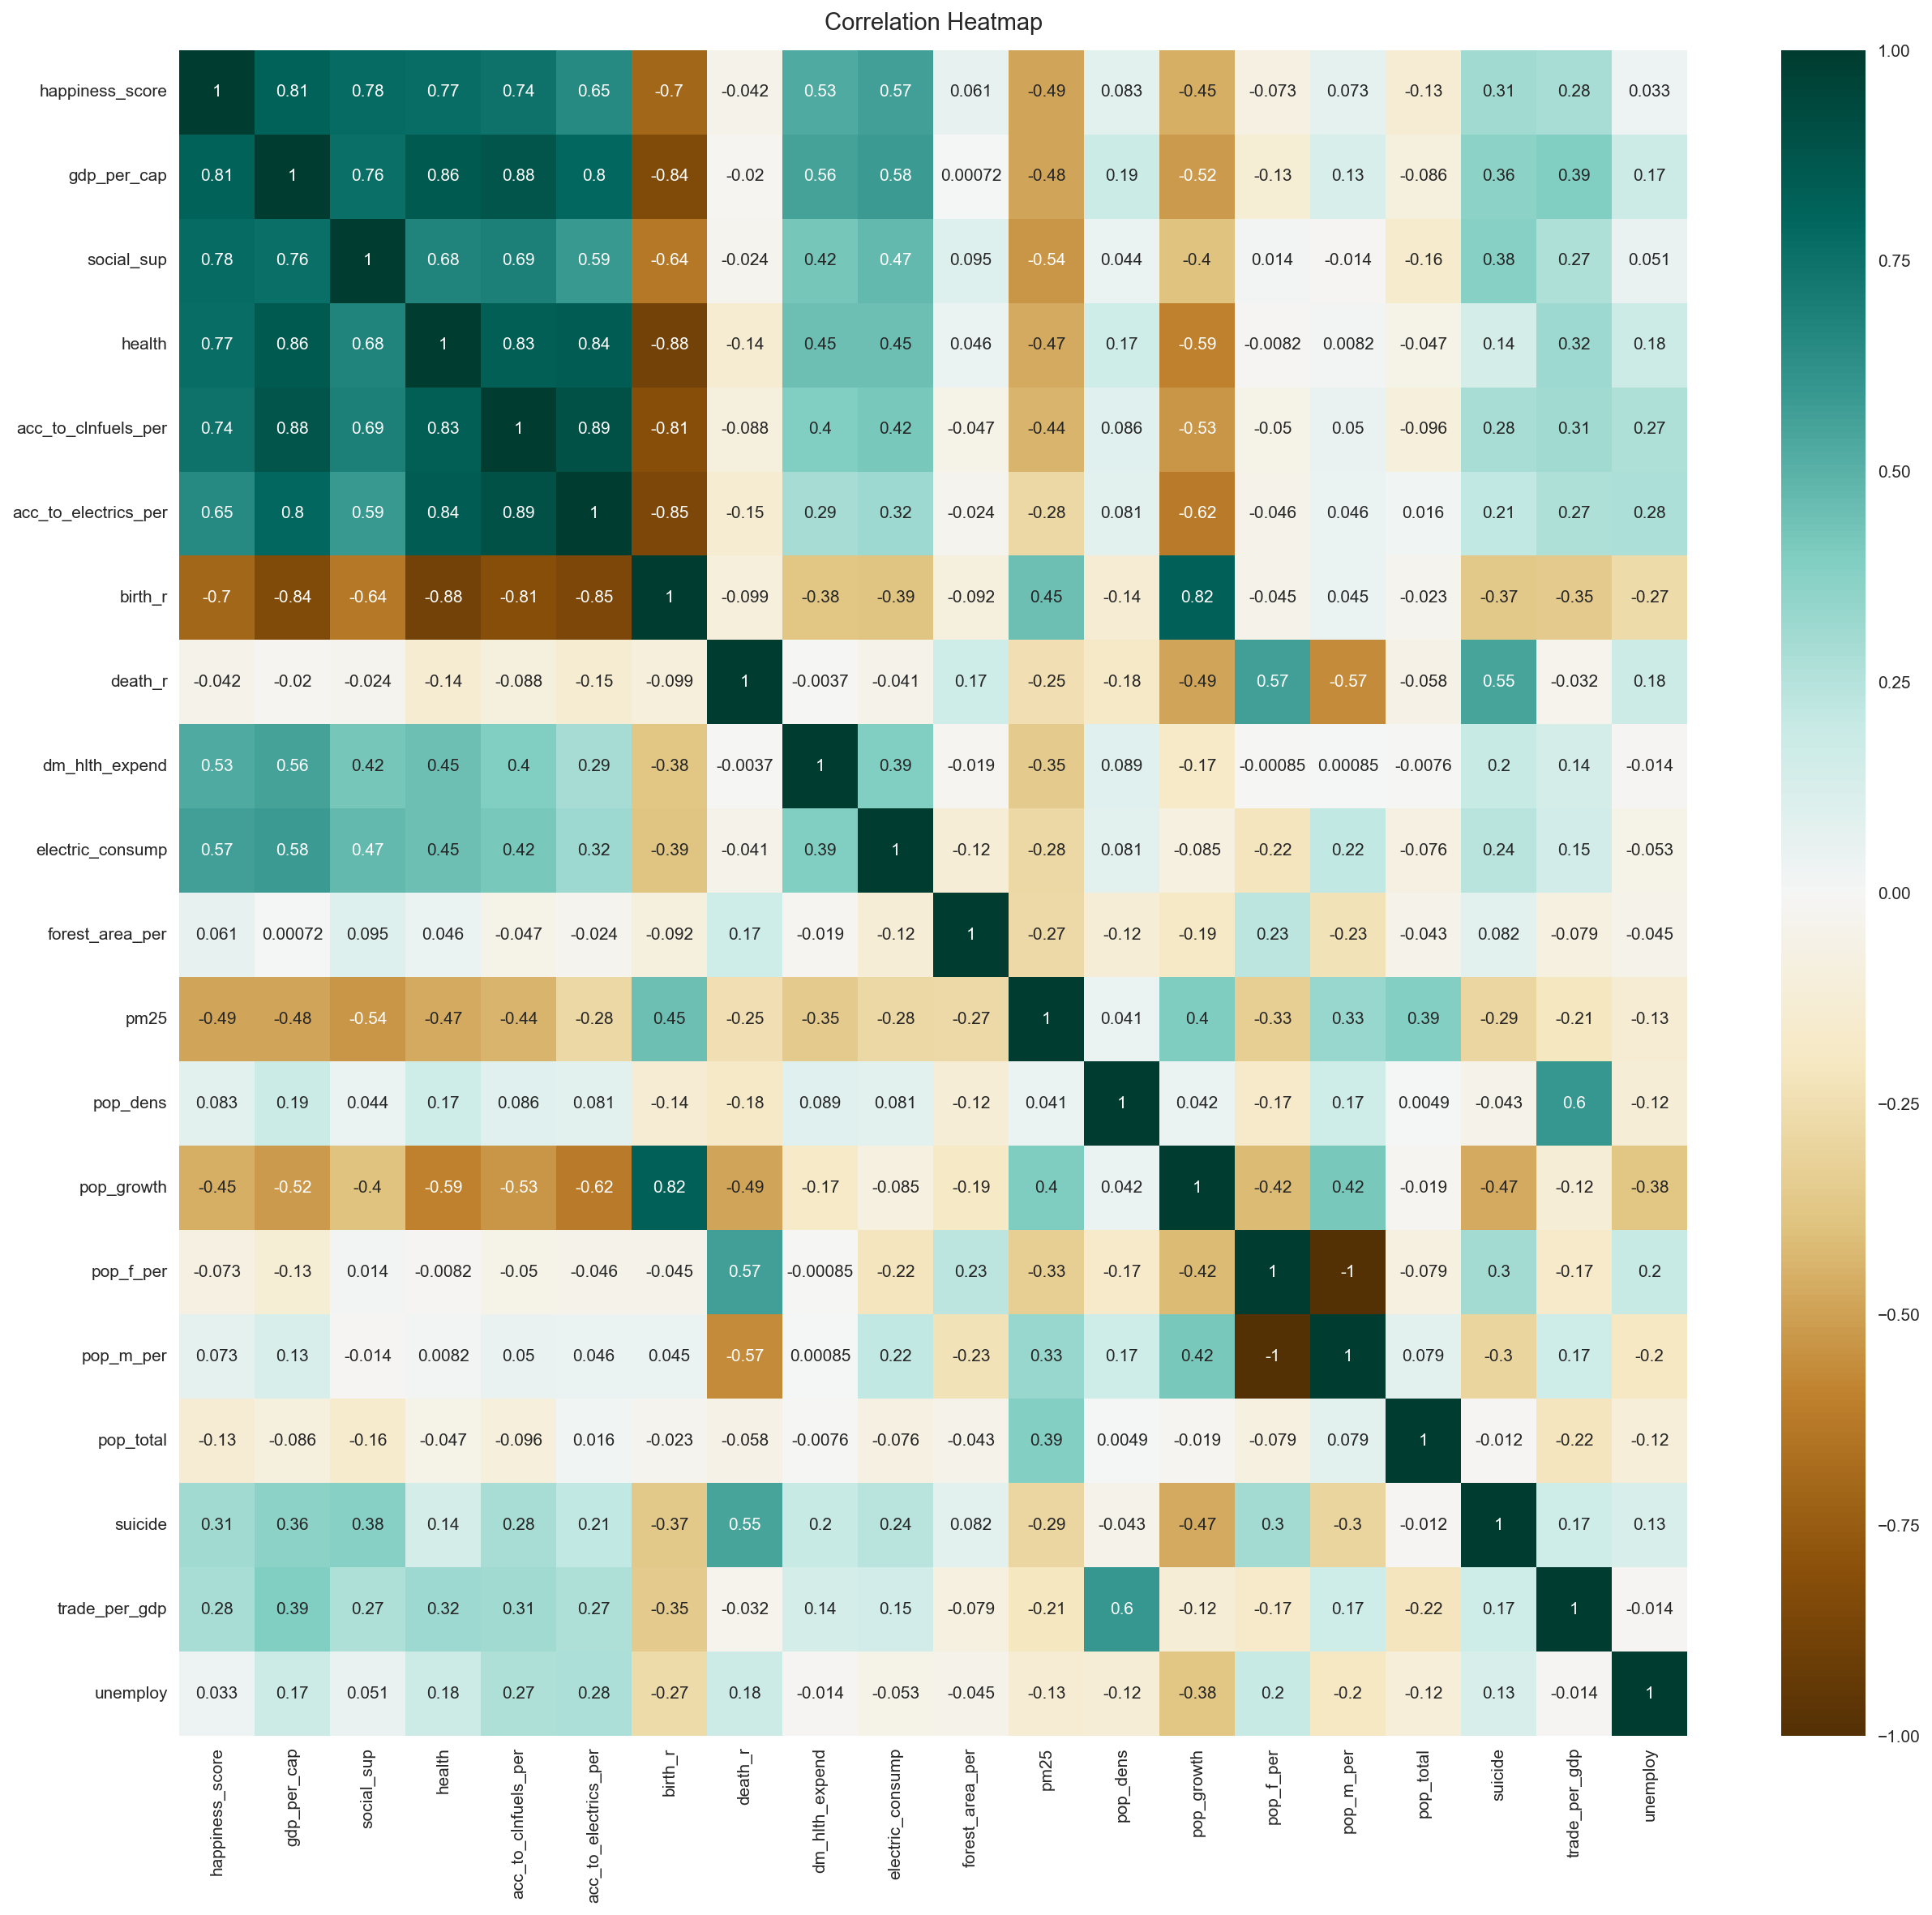

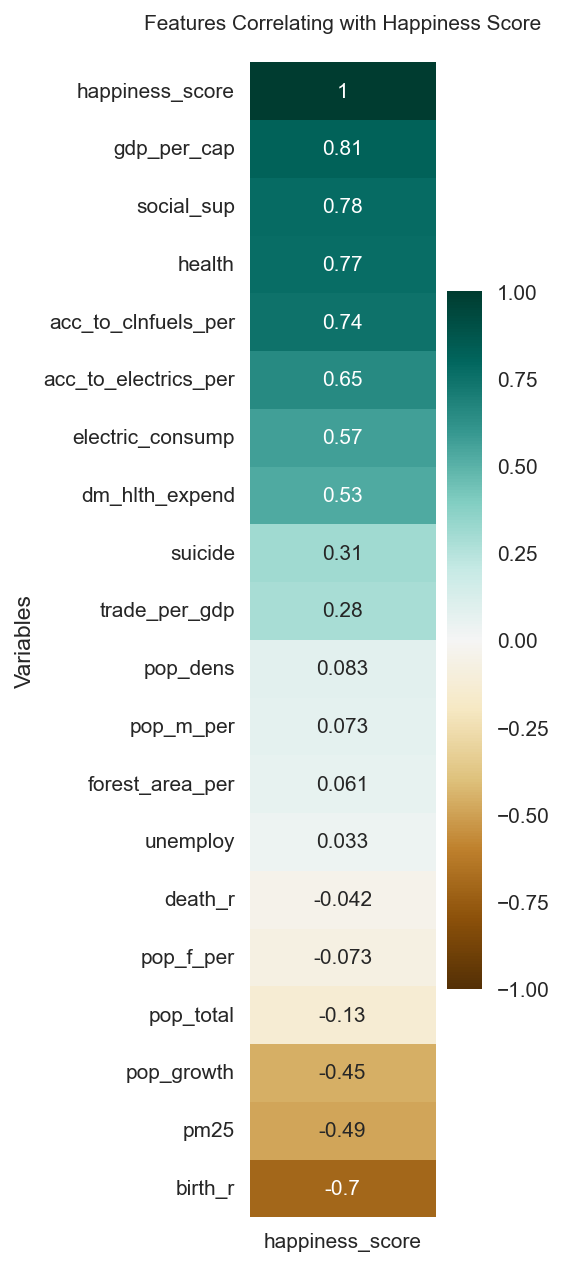

In [24]:
# Prepare new DATA

newdf_mean = new_df.groupby('country_name').apply(lambda x : x[['life_lad','gdp_per_cap','social_sup',
    'health','life_choice','generosity','corruption','pos_aff','neg_aff','conf_in_gov','acc_to_clnfuels_per',
    'acc_to_electrics_per','birth_r','death_r','dm_hlth_expend','electric_consump','forest_area_per',
    'pm25','pop_dens','pop_growth','pop_f_per','pop_m_per','pop_total','suicide','trade_per_gdp',
    'unemploy' ]].mean()).sort_values(by=['life_lad'],ascending=False).reset_index()

newdf_mean = pd.merge(df_w_overall[['Country','happiness_score']],newdf_mean,left_on='Country',right_on='country_name',how='left').rename(columns={'Country':'country'}).drop(columns=['country_name'])

display(newdf_mean)

# Plot

select = [ 'happiness_score','gdp_per_cap','social_sup','health','acc_to_clnfuels_per','acc_to_electrics_per','birth_r','death_r','dm_hlth_expend',
    'electric_consump','forest_area_per','pm25','pop_dens','pop_growth','pop_f_per','pop_m_per','pop_total',
    'suicide','trade_per_gdp','unemploy']

newdf_mean_0 = newdf_mean.loc[ :,select ]

# heatmap
plt.figure(figsize=(20, 18), dpi=150 )

heatmap = sns.heatmap(newdf_mean_0.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG' )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

# heatmap separated
plt.figure(figsize=(2, 10), dpi=150 )
heatmap = sns.heatmap(newdf_mean_0.corr()[['happiness_score']].sort_values(by='happiness_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG' )
heatmap.set_title('Features Correlating with Happiness Score', fontdict={'fontsize':10}, pad=16)
heatmap.set( ylabel='Variables')


/var/folders/k7/57xbh50s7799309gsby1ghx00000gn/T/ipykernel_12866/999636295.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(newdf_mean.corr()[['birth_r']].sort_values(by='birth_r', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG' )


[Text(-4.41666666666668, 0.5, 'Variables')]

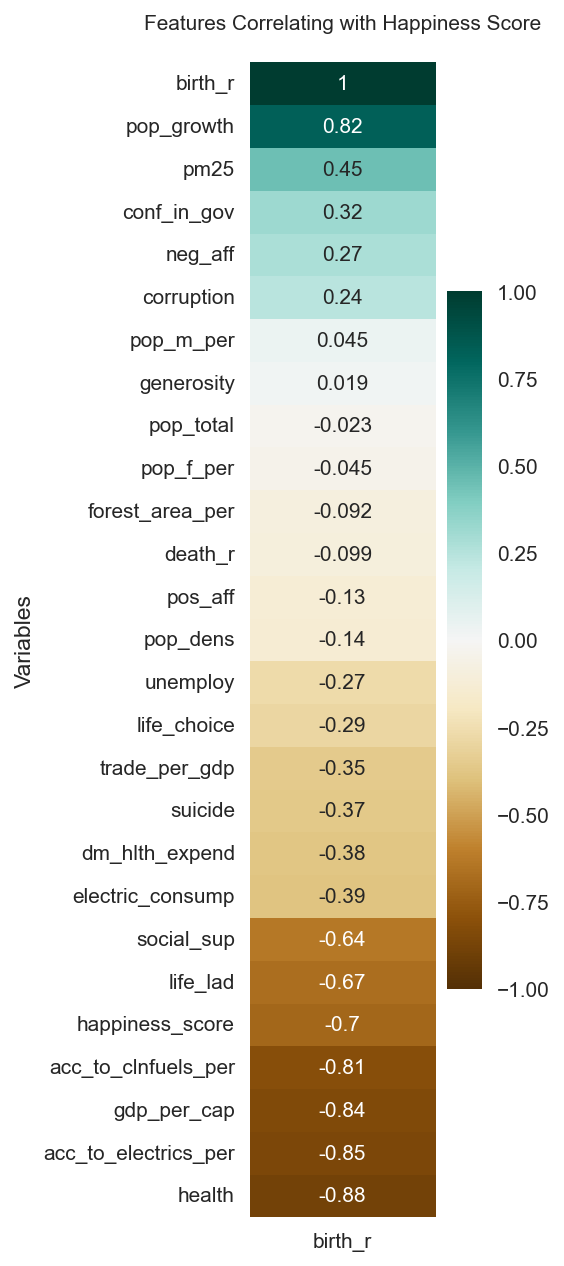

In [25]:
# heatmap separated
plt.figure(figsize=(2, 10), dpi=150 )
heatmap = sns.heatmap(newdf_mean.corr()[['birth_r']].sort_values(by='birth_r', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG' )
heatmap.set_title('Features Correlating with Happiness Score', fontdict={'fontsize':10}, pad=16)
heatmap.set( ylabel='Variables')

In [26]:
# Prepare non-outlier DATA

newdf_ol_mean = new_df.groupby('country_name').apply(lambda x : x[['life_lad','gdp_per_cap','social_sup',
    'health','life_choice','generosity','corruption','pos_aff','neg_aff','conf_in_gov','acc_to_clnfuels_per',
    'acc_to_electrics_per','birth_r','death_r','dm_hlth_expend','electric_consump','forest_area_per',
    'pm25','pop_dens','pop_growth','pop_f_per','pop_m_per','pop_total','suicide','trade_per_gdp',
    'unemploy' ]].mean()).sort_values(by=['life_lad'],ascending=False).reset_index()

newdf_ol_mean = pd.merge(df_w_overall[['Country','happiness_score']],newdf_ol_mean,left_on='Country',right_on='country_name',how='inner').rename(columns={'Country':'country'}).drop(columns=['country_name'])

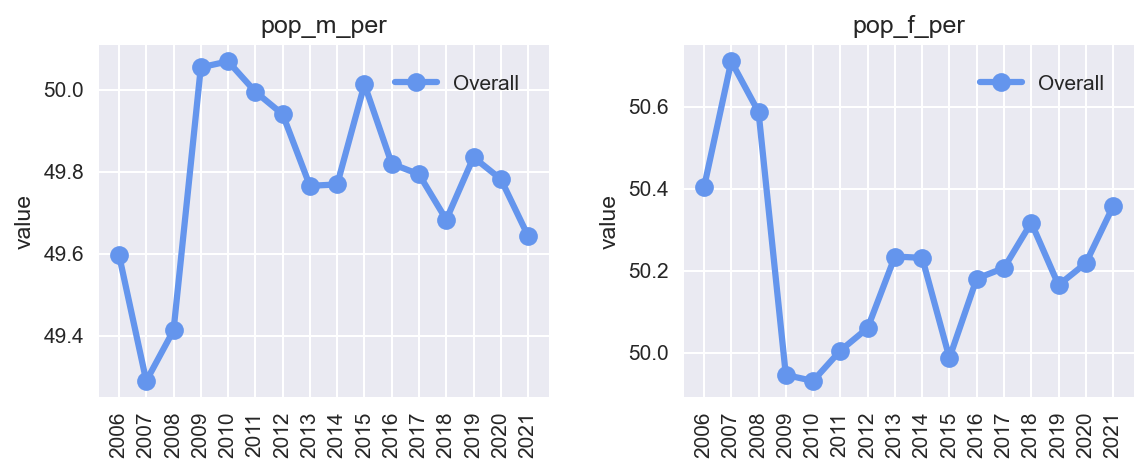

In [27]:
all_n_mean = new_df.iloc[ :,1: ].groupby( 'year' ).apply( 'mean' )
all_n_mean = pd.merge( left=new_df.loc[new_df['country_name']=='Thailand',['year']] ,right=all_n_mean ,how='left' ,on=['year'] )
all_n_mean = all_n_mean.loc[:,[ 'year','pop_m_per','pop_f_per' ] ]

#display( all_n_mean )

# PLOT

plt.style.use('seaborn')
f = plt.figure(figsize=(24,7), dpi=150)

for i,j in enumerate(all_n_mean) :
    if i > 0 :
        plt.subplot(2, 5, i)
        plt.plot(all_mean['year'], all_n_mean[j],color='#6495ED', marker='o', markersize = 9, 
        linewidth=3, linestyle='solid', alpha=1 ,label="Overall" )
        plt.xticks(rotation=90 )
        plt.title(f"{j}")
        plt.ylabel("value")
        plt.legend(loc="best",borderaxespad=1 )
        plt.subplots_adjust( wspace=0.3, hspace=0.3 )

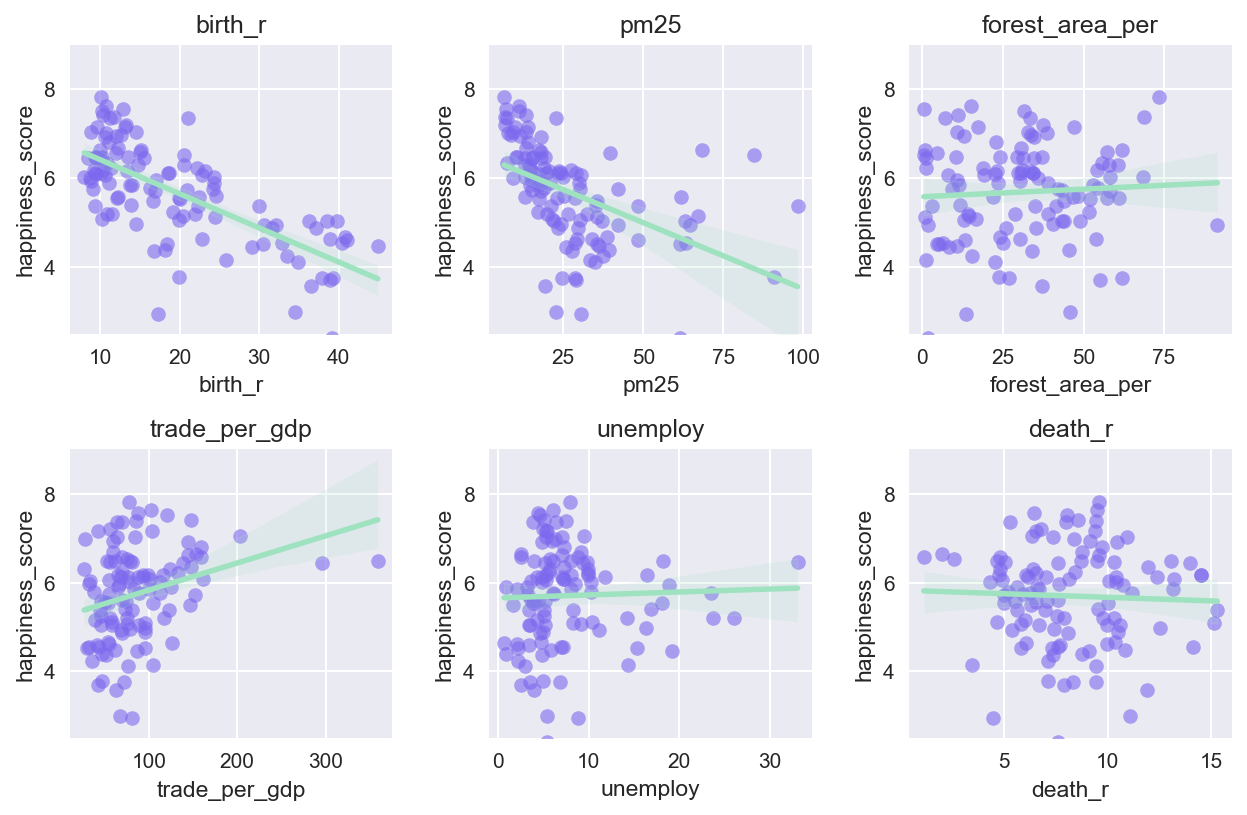

In [28]:
othr_topic = [ "birth_r","pm25","forest_area_per","trade_per_gdp","unemploy","death_r" ]

# Correlation Plot

plt.style.use('seaborn')
f = plt.figure(figsize=(10,6), dpi=150)

for i,j in enumerate(othr_topic):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=j, y="happiness_score", data = newdf_ol_mean , scatter_kws={"color": "#7B68EE","alpha": 0.6}, line_kws={"color": "#9FE2BF"} )
    plt.title(f"{j}") ; plt.ylim(2.5, 9)
    plt.subplots_adjust( wspace=0.3, hspace=0.4 )
        

For the other topics that we're interested in causing happiness, <br> we can see that most of them have negative/nothing related, and
# There is no significant relation between Birth rate vs Happiness score
- then, what about the other?

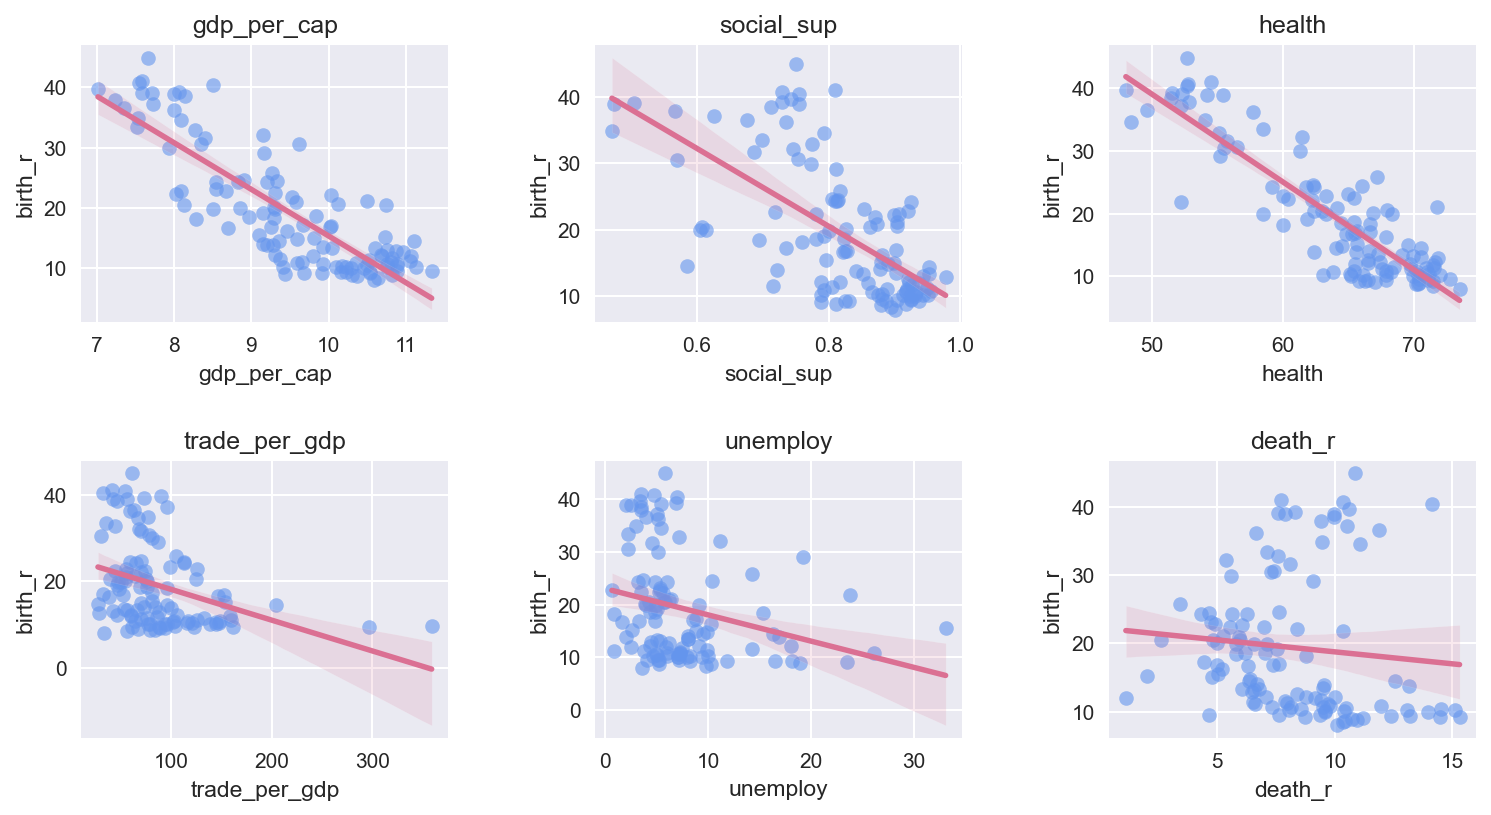

In [29]:
othr_topic = [ 'gdp_per_cap','social_sup','health',"trade_per_gdp","unemploy","death_r" ]

# Correlation Plot

plt.figure(figsize=(12,6), dpi=150)

for i,j in enumerate(othr_topic):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=j, y="birth_r", data = newdf_ol_mean , scatter_kws={"color": "#6495ED","alpha": 0.6}, line_kws={"color": "#DB7093"} )
    plt.title(f"{j}")
    plt.subplots_adjust( wspace=0.4, hspace=0.5 )

seems like the one that has a relation with birth rate is the death rate, <br>
like people die and then got people to replace

# In Analytics we've found something that might be useful for business
- which is having relation to happiness score

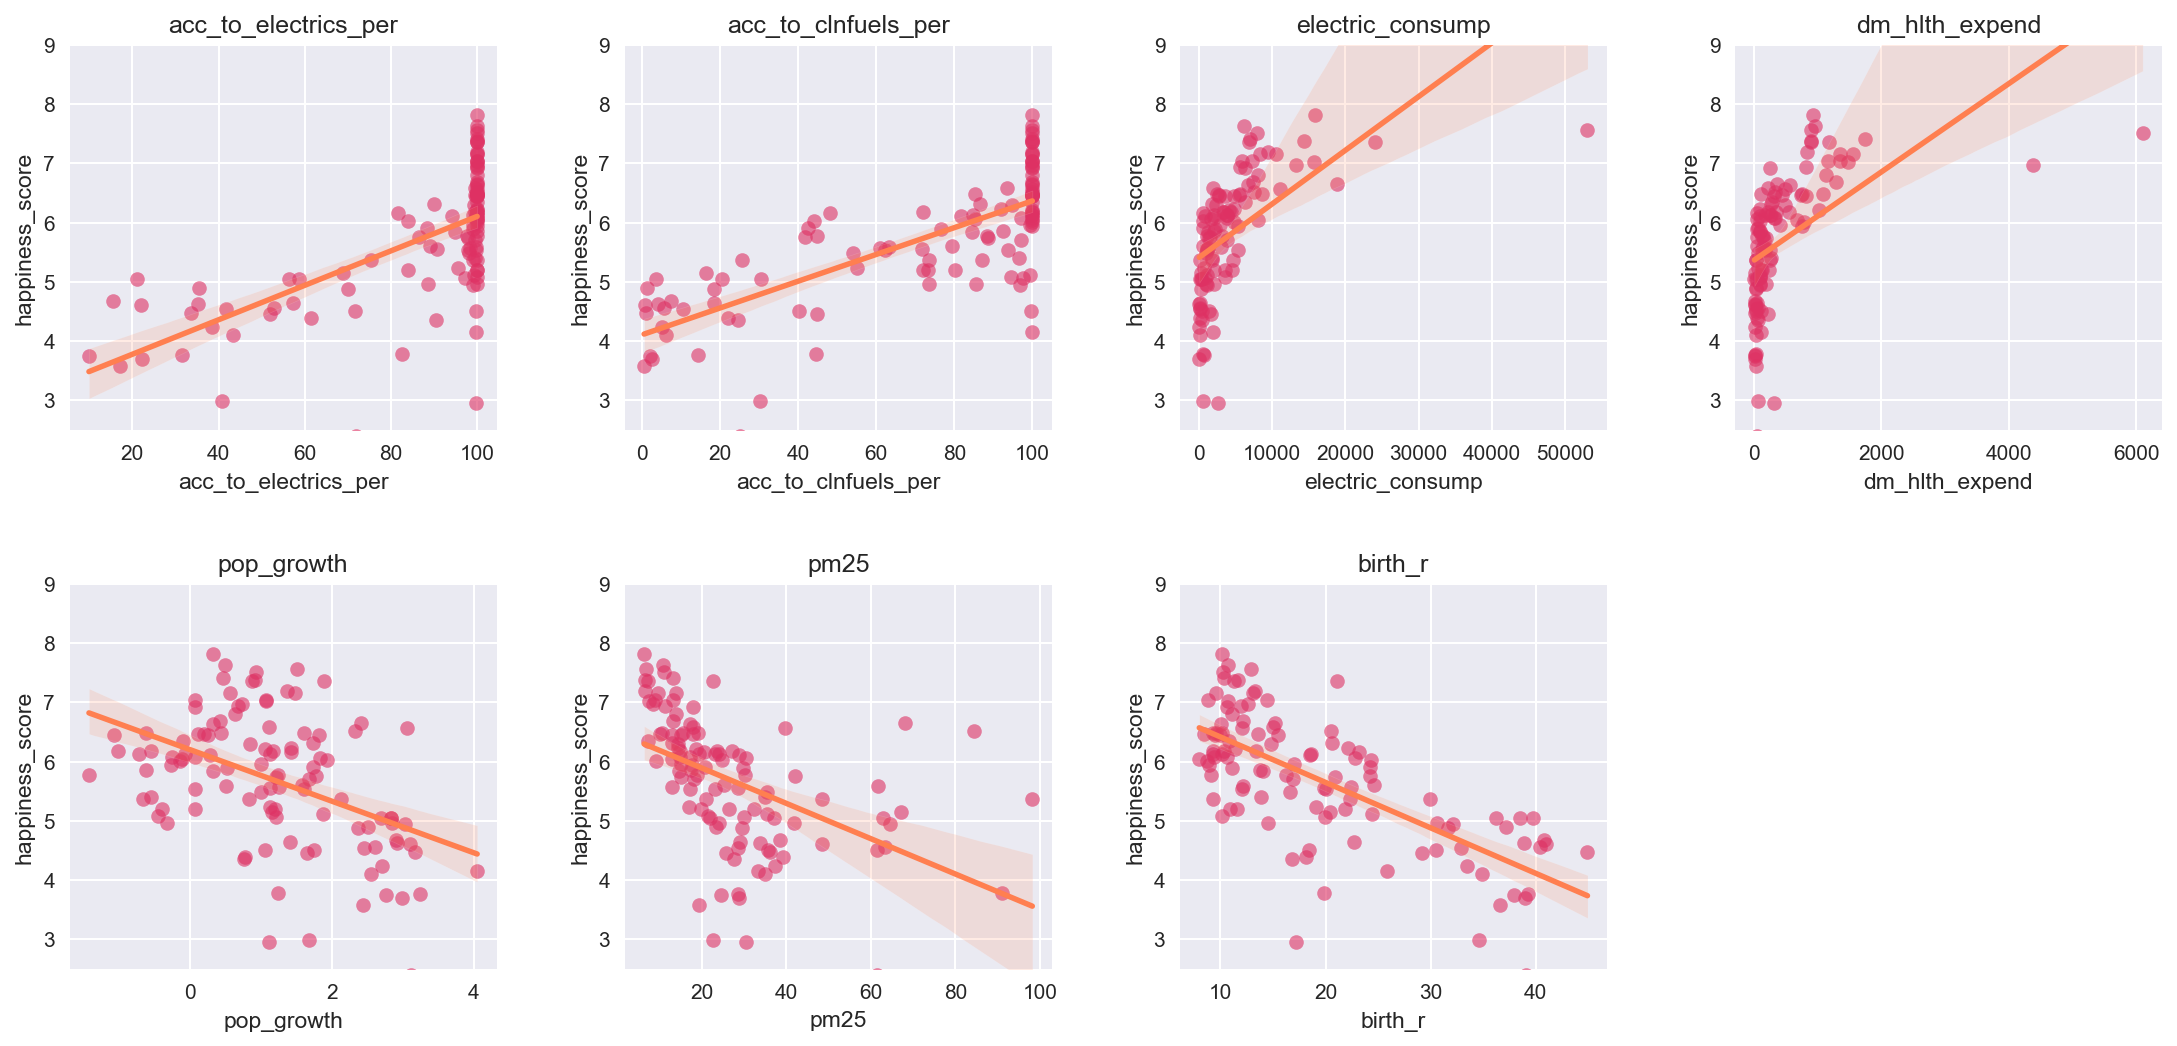

In [30]:
intrs_topic = [ "acc_to_electrics_per","acc_to_clnfuels_per","electric_consump","dm_hlth_expend","pop_growth","pm25","birth_r" ]

# Correlation Plot

#plt.style.use('seaborn')
plt.figure(figsize=(18,8), dpi=150)

for i,j in enumerate(intrs_topic):
    plt.subplot(2, 4, i+1)
    #sns.set( rc={'figure.dpi':150} )
    sns.regplot(x=j, y="happiness_score", data = newdf_ol_mean , scatter_kws={"color": "#DE3163","alpha": 0.6}, line_kws={"color": "#FF7F50"} )
    plt.ylim(2.5, 9)
    plt.title(f"{j}")
    plt.subplots_adjust( wspace=0.3, hspace=0.4 )

# That is...
- ( Healthy life expectancy at birth )
- Access to clean fuels and technologies for cooking (% of population)
- Domestic private health expenditure per capita (current US$)

well, if your business is about making clean fuels and technologies for cooking or healthcare<br>
you can be proud because of making people happier!

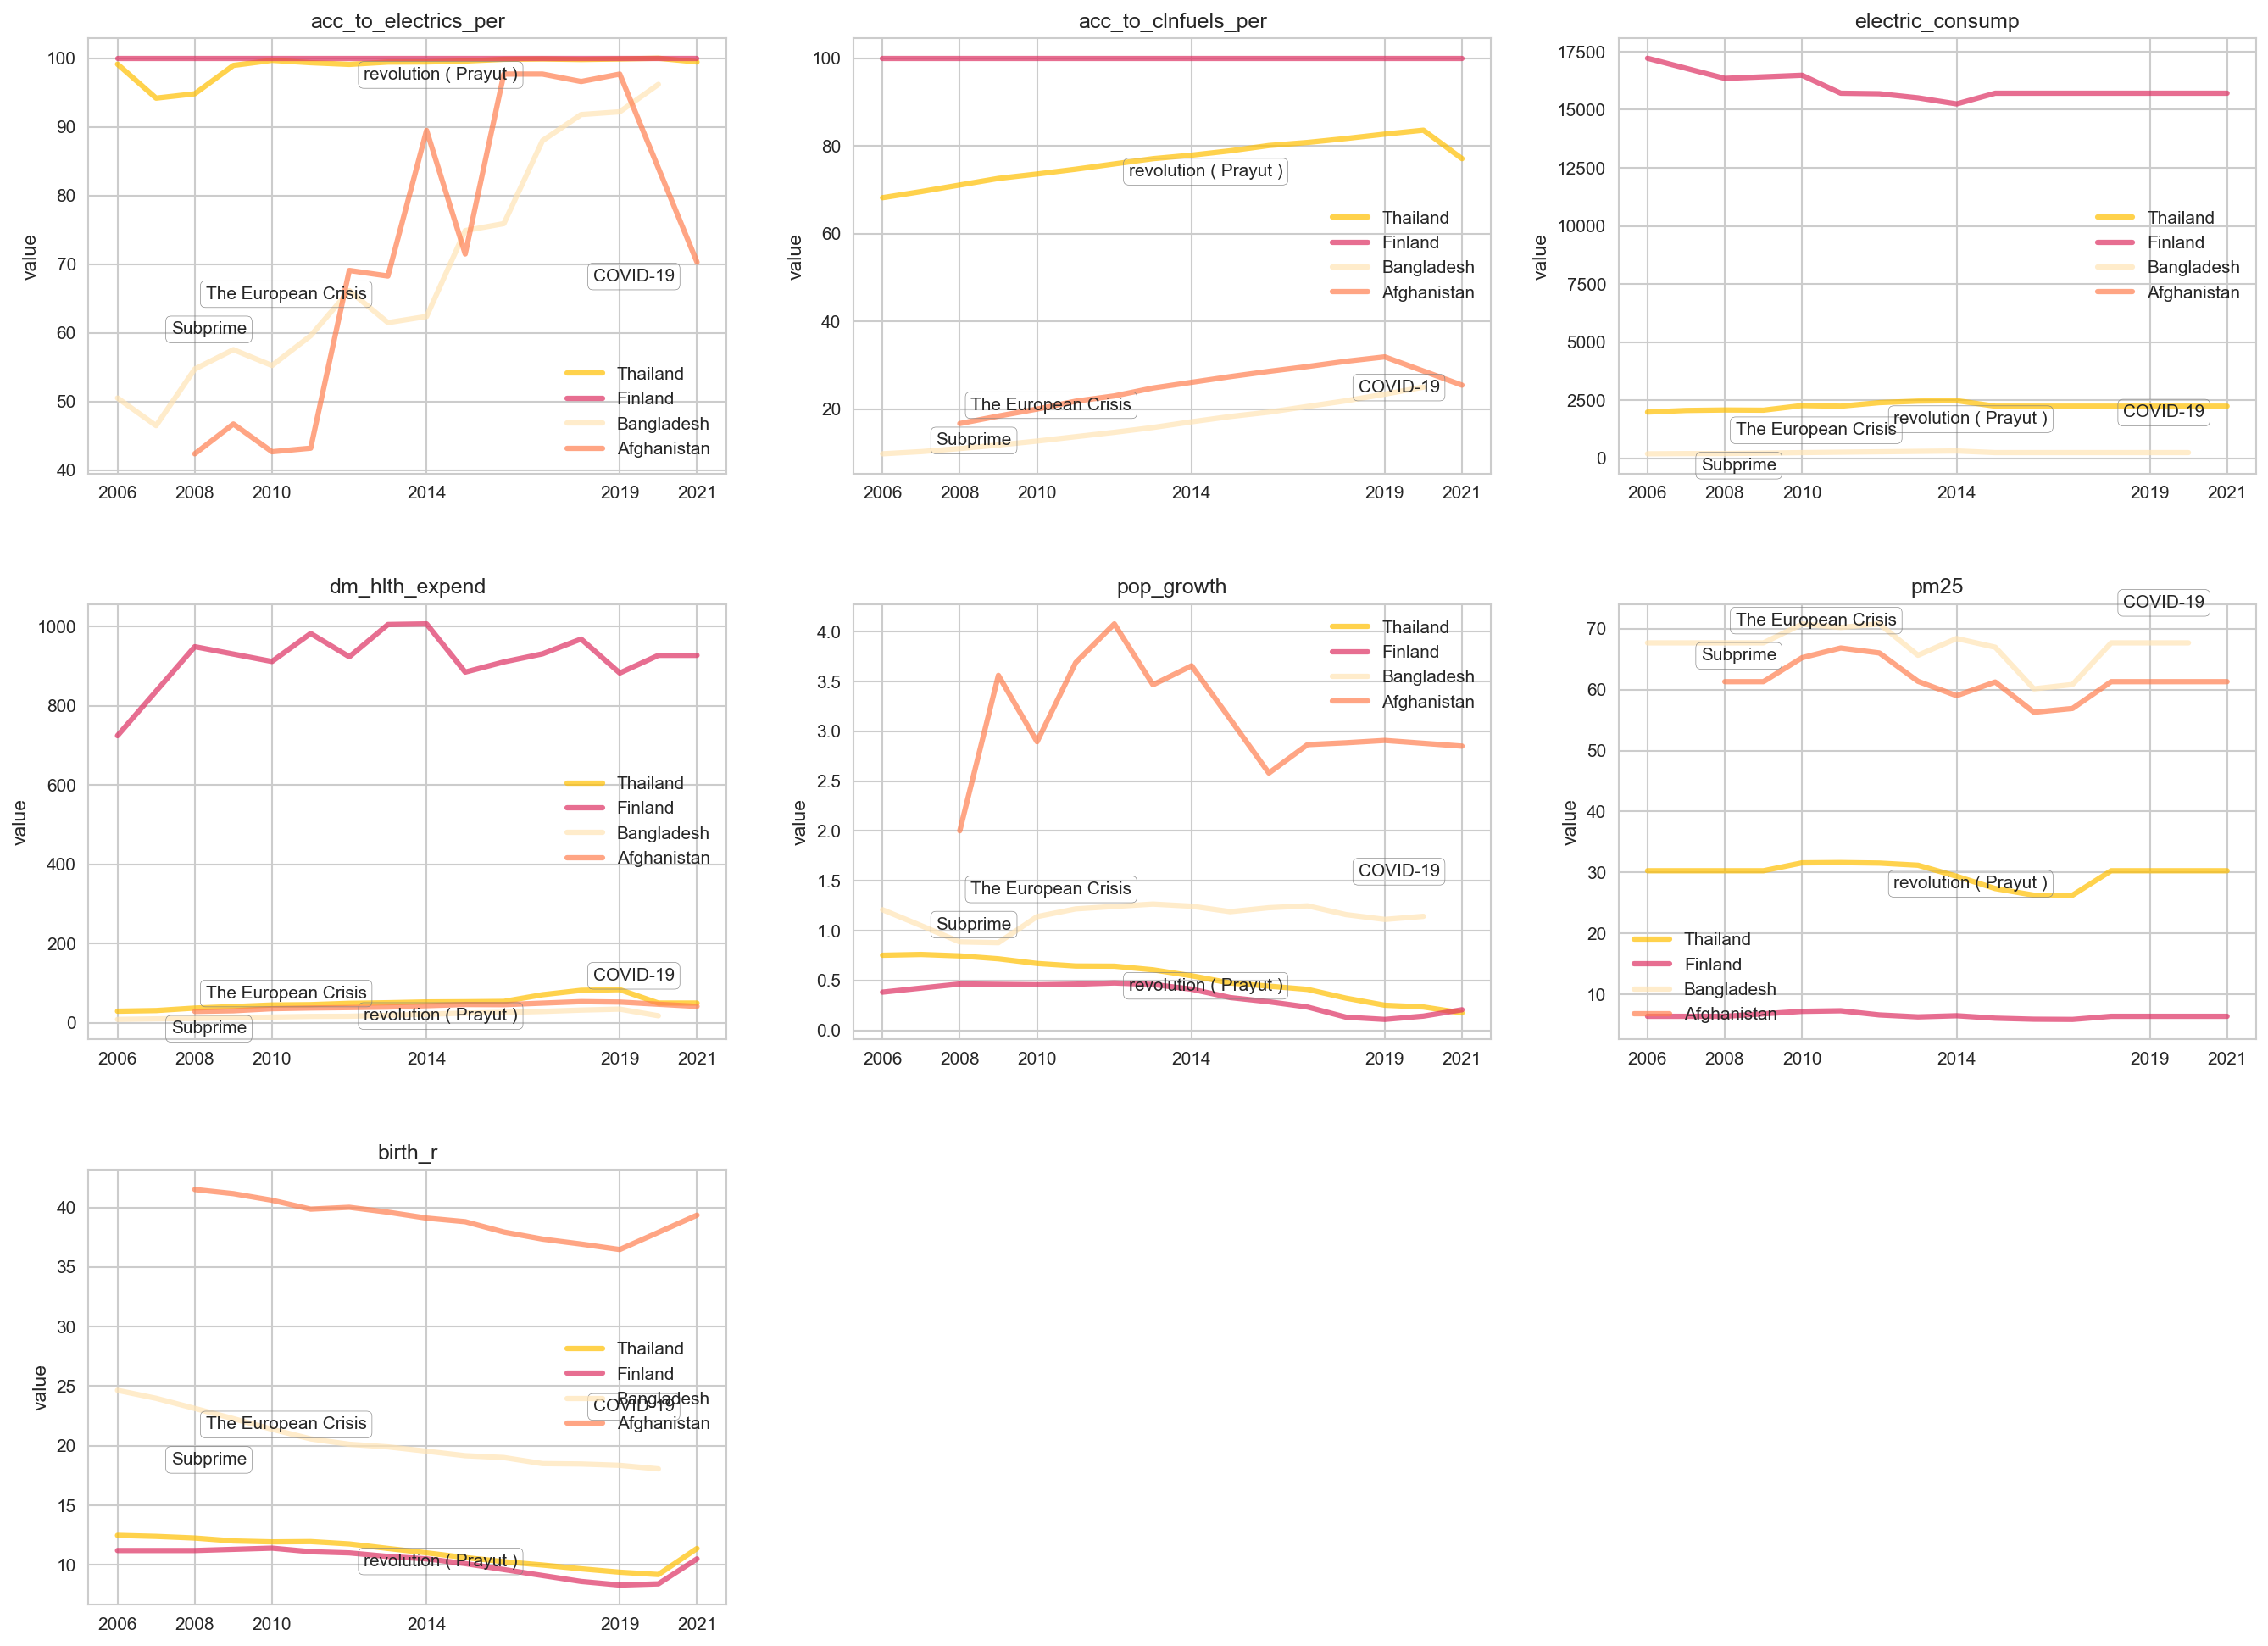

In [45]:
cintr = [ 'Thailand','Finland','Bangladesh','Afghanistan','Israel' ]

th_insight = new_df.loc[ new_df['country_name'].isin(cintr),[ 'country_name','year','acc_to_electrics_per','acc_to_clnfuels_per','electric_consump','dm_hlth_expend',"pop_growth","pm25","birth_r" ] ]

# PLOT

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(22,16), dpi=150)

for i,j in enumerate(th_insight) :

    th_x = th_insight.loc[ (th_insight['country_name']=='Thailand'),'year' ]
    f_x = th_insight.loc[ (th_insight['country_name']=='Finland'),'year' ]
    b_x = th_insight.loc[ (th_insight['country_name']=='Bangladesh'),'year' ]
    A_x = th_insight.loc[ (th_insight['country_name']=='Afghanistan'),'year' ]
    
    th_y = th_insight.loc[ (th_insight['country_name']=='Thailand'),j ]
    f_y = th_insight.loc[ (th_insight['country_name']=='Finland'),j ]
    b_y = th_insight.loc[ (th_insight['country_name']=='Bangladesh'),j ]
    A_y = th_insight.loc[ (th_insight['country_name']=='Afghanistan'),j ]

    if i >1 :
        plt.subplot(3, 3, i-1)

        plt.plot( th_x , th_y ,color='#FFBF00', marker='', markersize = 9, linewidth=3, linestyle='solid', alpha=0.7 ,label='Thailand' )
        plt.plot( f_x , f_y ,color='#DE3163', marker='', markersize = 9, linewidth=3, linestyle='solid', alpha=0.7 ,label='Finland' )
        plt.plot( b_x , b_y ,color='#FFE4B5', marker='', markersize = 9, linewidth=3, linestyle='solid', alpha=0.7 ,label='Bangladesh' )
        plt.plot( A_x , A_y ,color='#FF7F50', marker='', markersize = 9, linewidth=3, linestyle='solid', alpha=0.7 ,label='Afghanistan' )

        plt.title(f"{j}");plt.xticks([0,2,4,8,13,15]);plt.ylabel("value");plt.legend(loc="best")
        plt.subplots_adjust( wspace=0.2, hspace=0.3 )
        
        plt.annotate("Subprime", 
             xy=('2008', b_y.median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,-10), textcoords='offset points', ha='center' )
        plt.annotate("The European Crisis", 
             xy=('2010', b_y.median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,10), textcoords='offset points', ha='center' )
        plt.annotate("revolution ( Prayut )", 
             xy=('2014', th_y.median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,-10), textcoords='offset points', ha='center')
        plt.annotate("COVID-19", 
             xy=('2019', b_y.median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,20), textcoords='offset points', ha='center')


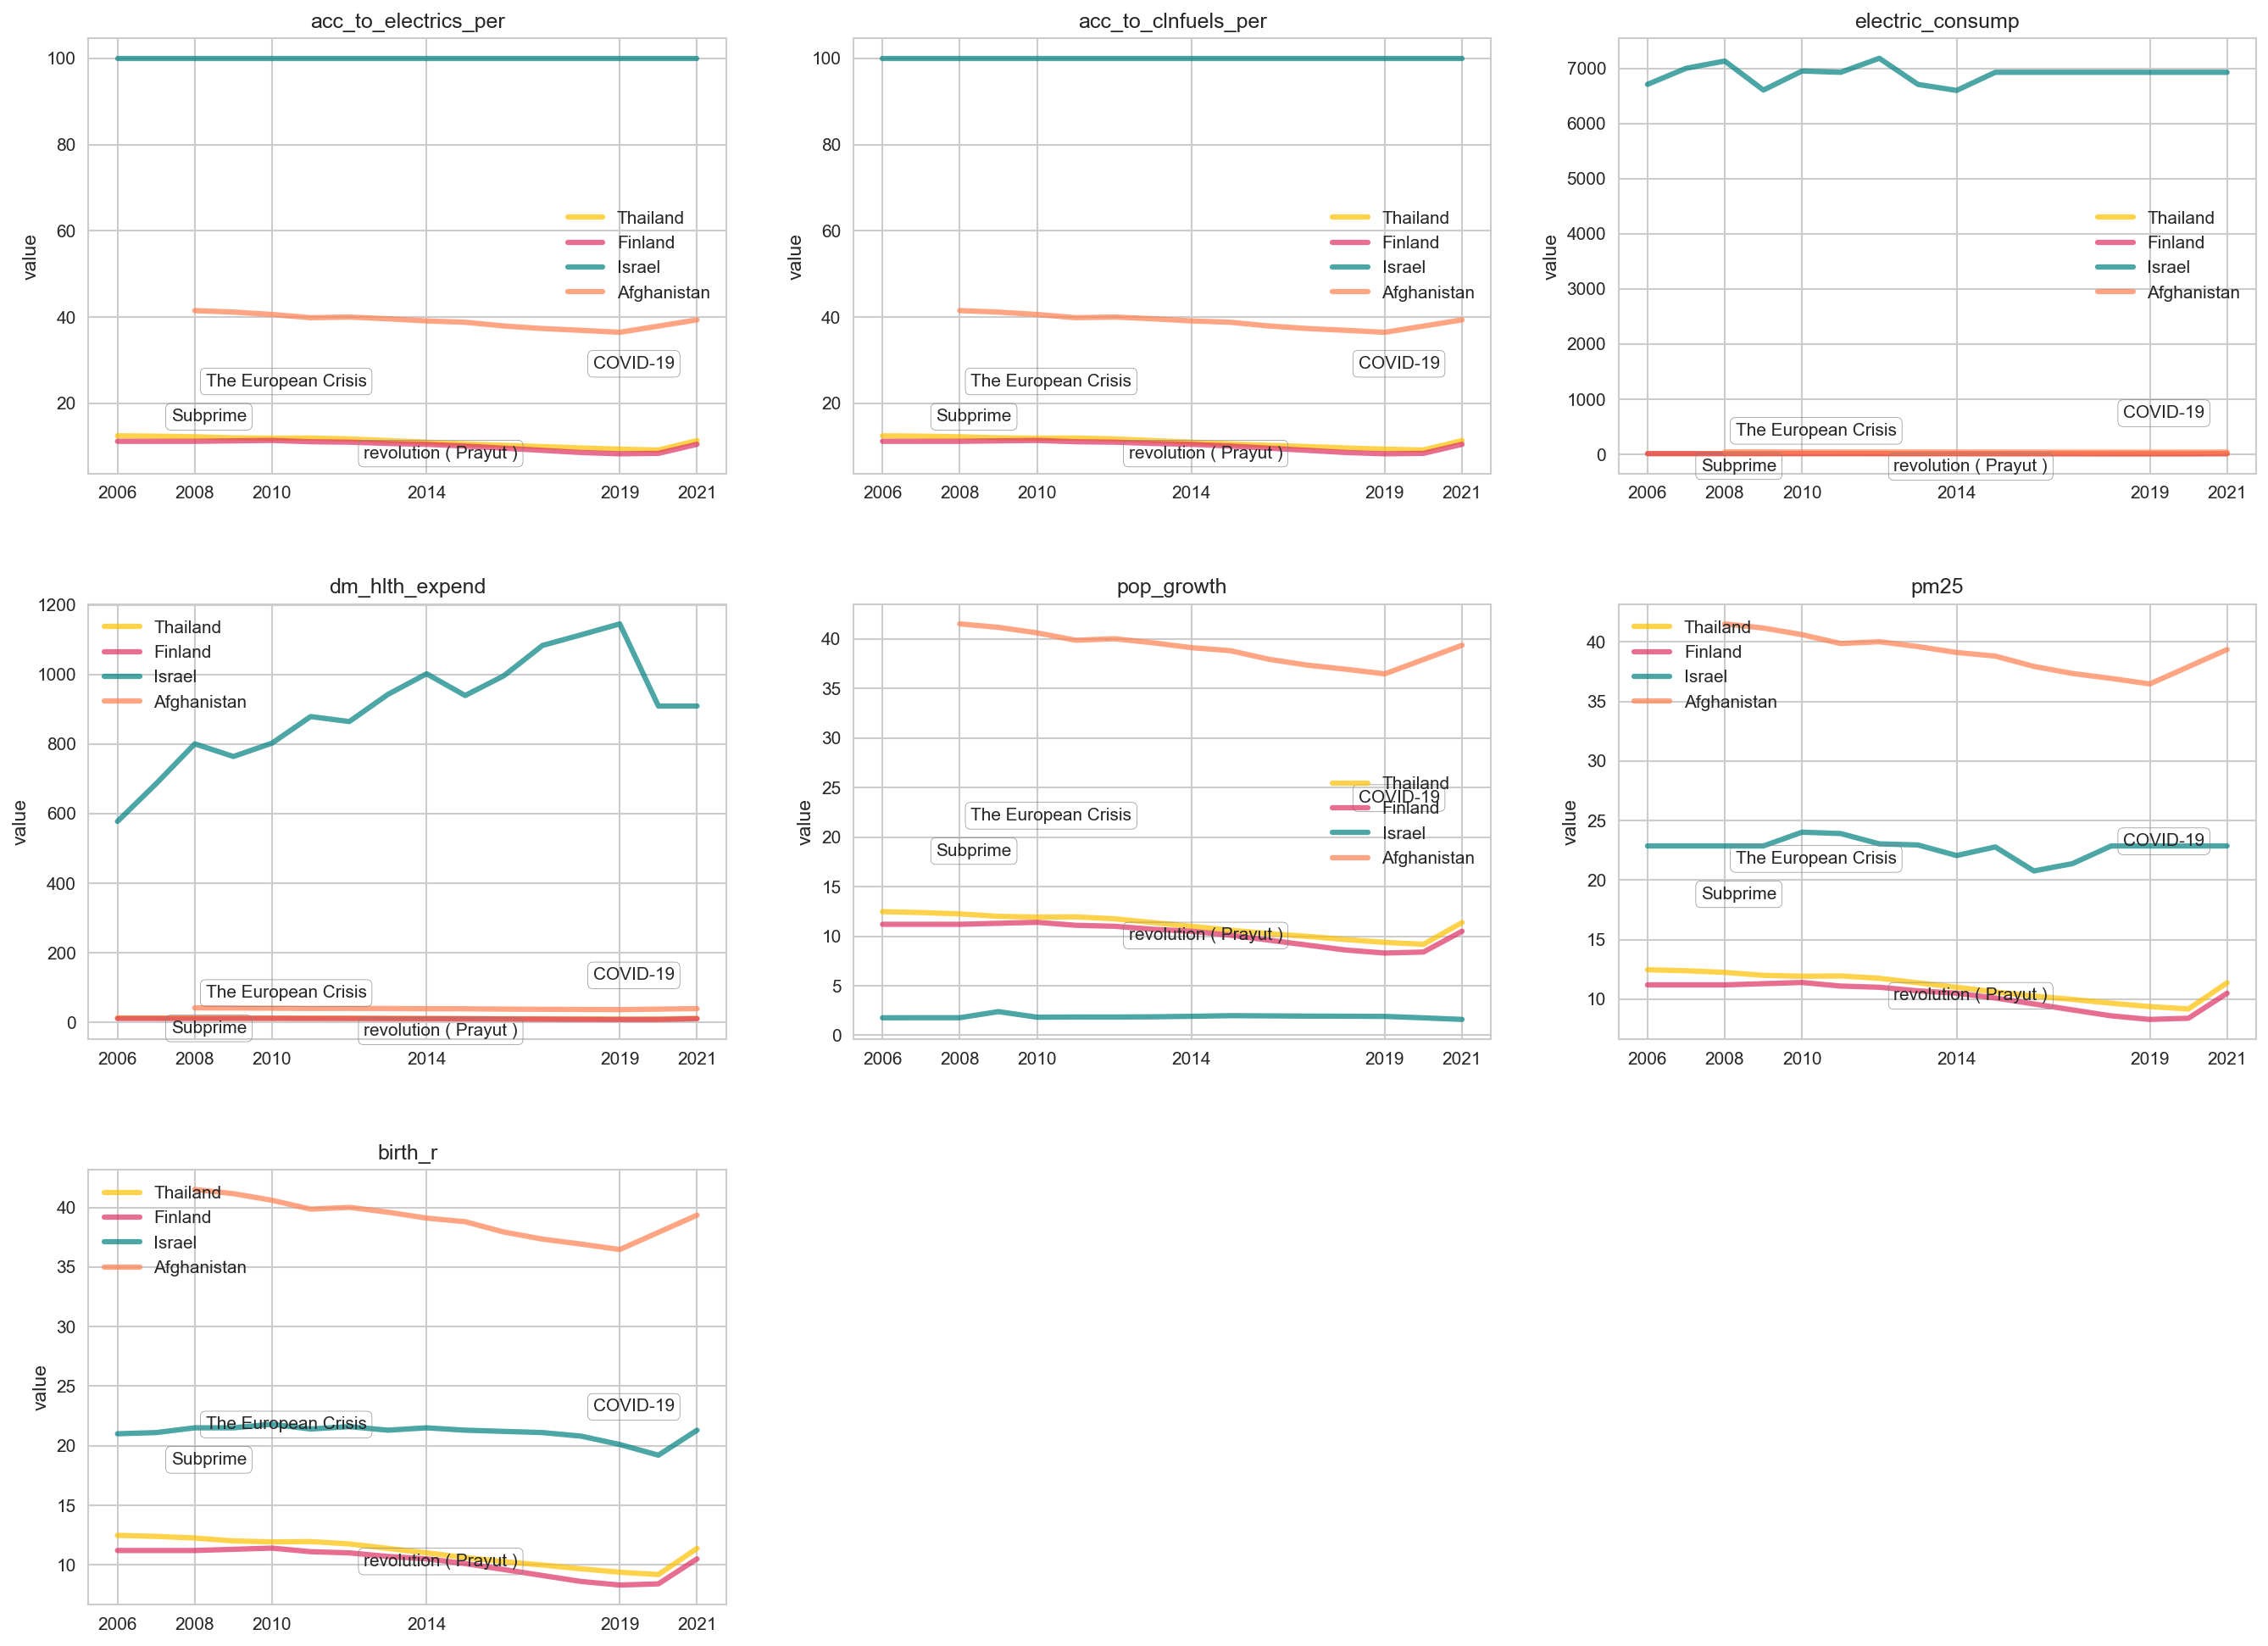

In [48]:
# PLOT

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(22,16), dpi=150)

for i,j in enumerate(th_insight) :

    i_x = th_insight.loc[ (th_insight['country_name']=='Israel'),'year' ]
    i_y = th_insight.loc[ (th_insight['country_name']=='Israel'),j ]

    if i >1 :
        plt.subplot(3, 3, i-1)

        plt.plot( th_x , th_y ,color='#FFBF00', marker='', markersize = 9, linewidth=3, linestyle='solid', alpha=0.7 ,label='Thailand' )
        plt.plot( f_x , f_y ,color='#DE3163', marker='', markersize = 9, linewidth=3, linestyle='solid', alpha=0.7 ,label='Finland' )
        plt.plot( i_x , i_y ,color='#008080', marker='', markersize = 9, linewidth=3, linestyle='solid', alpha=0.7 ,label='Israel' )
        plt.plot( A_x , A_y ,color='#FF7F50', marker='', markersize = 9, linewidth=3, linestyle='solid', alpha=0.7 ,label='Afghanistan' )

        plt.title(f"{j}");plt.xticks([0,2,4,8,13,15]);plt.ylabel("value");plt.legend(loc="best")
        plt.subplots_adjust( wspace=0.2, hspace=0.3 )
        
        plt.annotate("Subprime", 
             xy=('2008', b_y.median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,-10), textcoords='offset points', ha='center' )
        plt.annotate("The European Crisis", 
             xy=('2010', b_y.median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,10), textcoords='offset points', ha='center' )
        plt.annotate("revolution ( Prayut )", 
             xy=('2014', th_y.median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,-10), textcoords='offset points', ha='center')
        plt.annotate("COVID-19", 
             xy=('2019', b_y.median()), xycoords='data',
             bbox=dict(boxstyle='round', fc='none', ec='gray'),
             xytext=(8,20), textcoords='offset points', ha='center')

19
 ------ Thailand on min-max scaler ------ 


Text(8, 10, 'COVID-19')

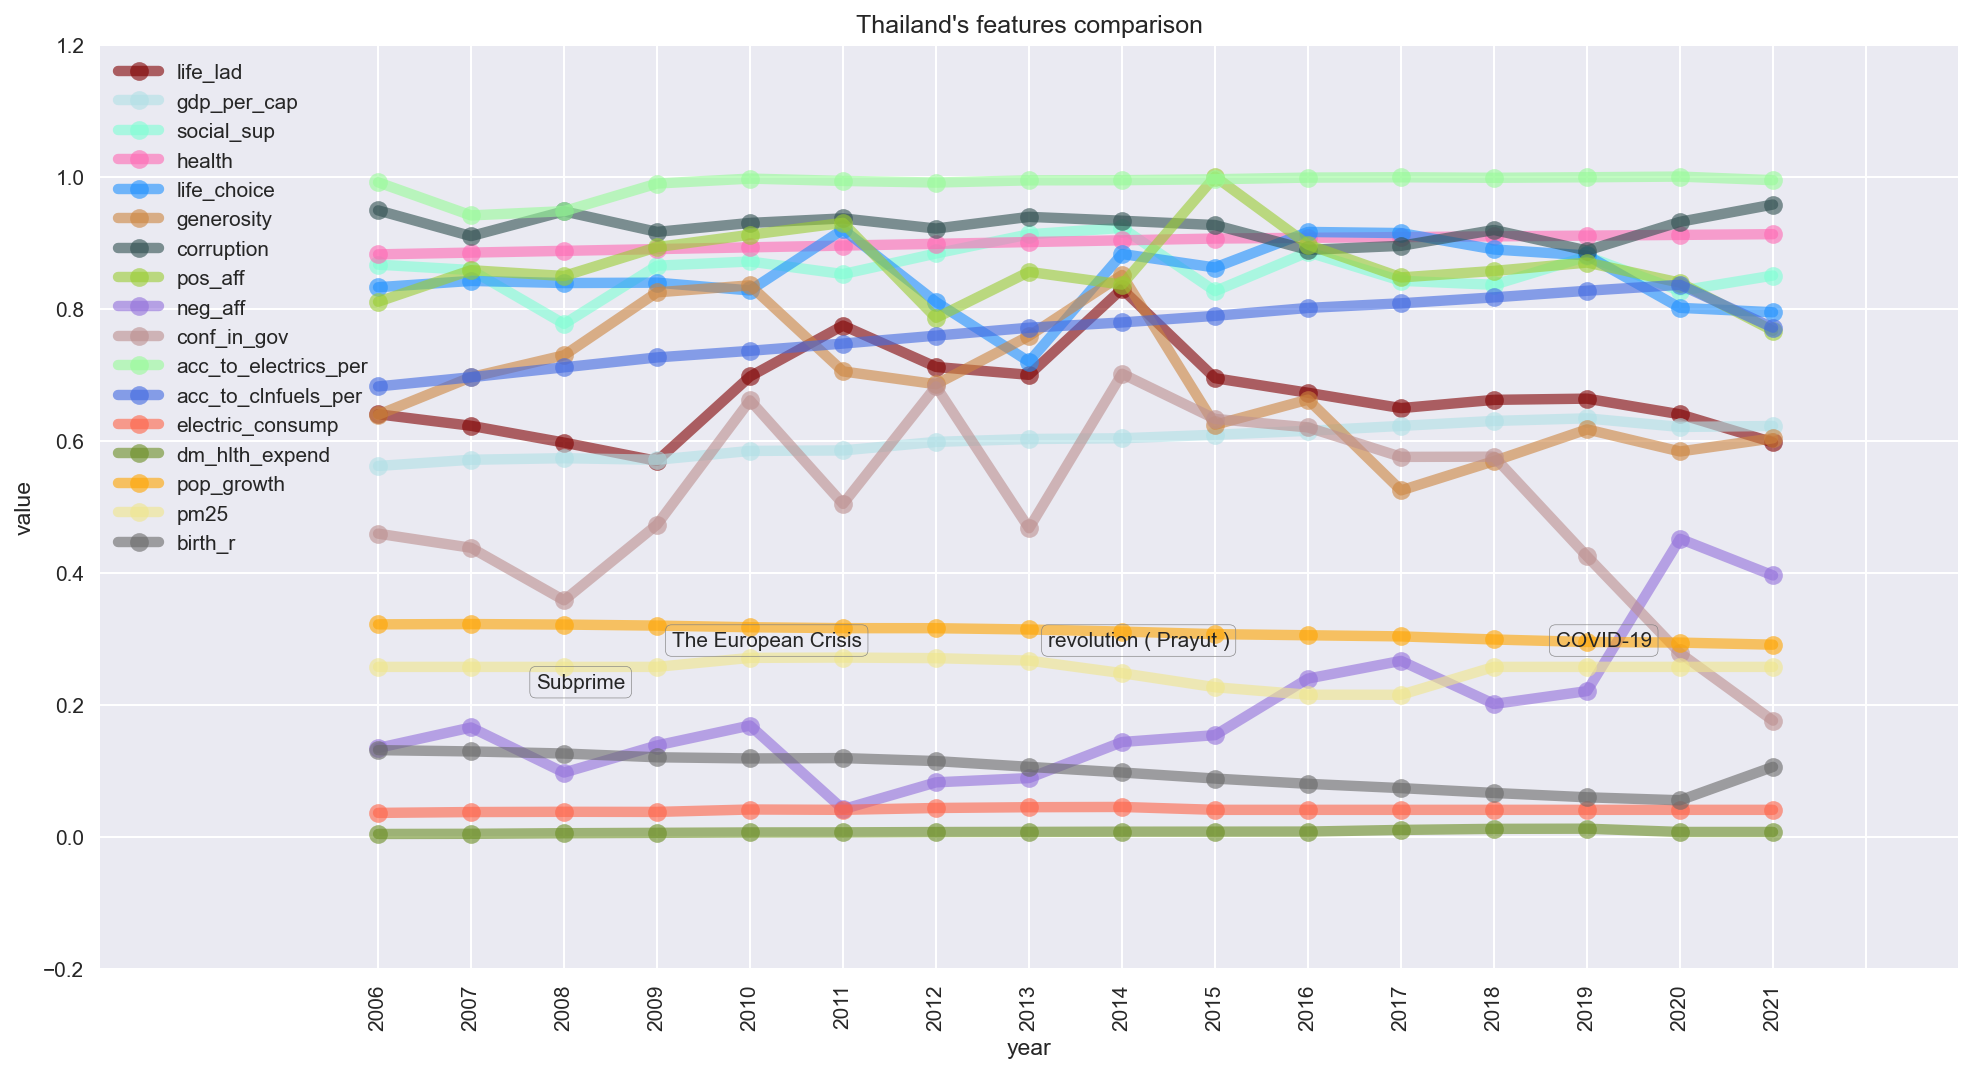

In [32]:
tps = [ 'country_name','year','life_lad','gdp_per_cap','social_sup','health','life_choice','generosity','corruption',
       'pos_aff','neg_aff','conf_in_gov','acc_to_electrics_per','acc_to_clnfuels_per','electric_consump','dm_hlth_expend',"pop_growth","pm25","birth_r" ]
color_t = [ '#800000','#B0E0E6','#7FFFD4','#FF69B4','#1E90FF','#CD853F','#2F4F4F','#9ACD32','#9370DB','#BC8F8F','#98FB98','#4169E1','#FF6347','#6B8E23','#FFA500','#F0E68C','#696969' ]

print(len(tps))

# prepare DATA

th_cp = new_df.loc[ (new_df['life_lad'].notna()) ,tps].reset_index(drop=True)
th_cp.iloc[:,2:] = th_cp.iloc[:,2:].apply(lambda x: (x-x.min())/(x.max()-x.min()) )
th_cp = th_cp.loc[ (th_cp['country_name']=='Thailand'),: ]

print(f" {'-'*6} Thailand on min-max scaler {'-'*6} ")
#display(th_cp)

# Plot

plt.style.use('seaborn')
plt.figure(figsize=(16,8), dpi=150)

for i,j in enumerate(tps) :
       if i >= 2 :
              plt.plot( th_cp['year'] , th_cp[j] ,color=color_t[i-2], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label=j )

plt.title(f"Thailand's features comparison")
plt.legend(loc="best")
plt.xticks( [-3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], rotation=90 )
plt.yticks( [-0.2,0,0.2,0.4,0.6,0.8,1,1.2] )
plt.xlabel("year")
plt.ylabel("value")
plt.annotate("Subprime", 
       xy=('2008', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,-10), textcoords='offset points', ha='center' )
plt.annotate("The European Crisis", 
       xy=('2010', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center' )
plt.annotate("revolution ( Prayut )", 
       xy=('2014', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center')
plt.annotate("COVID-19", 
       xy=('2019', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center')

# What have we found from above? ( that affects happiness )
- low 'electric_consump' (correlation to happiness : 0.57) -
- low 'dm_hlth_expend' (correlation to happiness : 0.53) -
- but high 'health' (correlation to happiness : 0.77) +
- high 'corruption' (correlation to happiness : -0.47) -
# what increasing
- 'neg_aff' (correlation to happiness : -0.40) -
- 'gdp_per_cap' (correlation to happiness : 0.79) +
- 'acc_to_clnfuels_per' (correlation to happiness : 0.74) +
# what decreasing
- 'conf_in_gov (correlation to happiness : -0.18) +
- 'life_lad' (correlation to happiness : 0.92) -
- 'pos_aff' (correlation to happiness : 0.48) -
- 'generosity' (correlation to happiness : 0.14) -
- 'birth_r' (correlation to happiness : -0.7) +

/var/folders/k7/57xbh50s7799309gsby1ghx00000gn/T/ipykernel_12866/171434473.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  percent_crt = [round((100 * (b - a) / a),2) for a, b in zip(th_cp['corruption'], th_cp['corruption'][1:] ) ]
/var/folders/k7/57xbh50s7799309gsby1ghx00000gn/T/ipykernel_12866/171434473.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  percent_dm_hlth = [round((100 * (b - a) / a),2) for a, b in zip(th_cp['dm_hlth_expend'], th_cp['dm_hlth_expend'][1:] ) ]


mean life_lad : -0.0 %
       mean life_lad ( since Prayut ) : -4.42 %
mean corruption : 0.1 %
       mean corruption ( since Prayut ) : 0.42 %
mean pos_aff : -0.04 %
      mean pos_aff ( since Prayut ) : -0.83 %
mean neg_aff : 19.35 %
      mean neg_aff ( since Prayut ) : 21.69 %
mean dm_hlth_expend : 5.24 %
mean acc_to_clnfuels_per : 0.85 %
mean birth_r : 0.59 %
mean electric_consump : 0.9 %

mean gdp_per_cap : 0.69 %
mean conf_in_gov : -2.49 %
      mean conf_in_gov ( since Prayut ) : -16.65 %



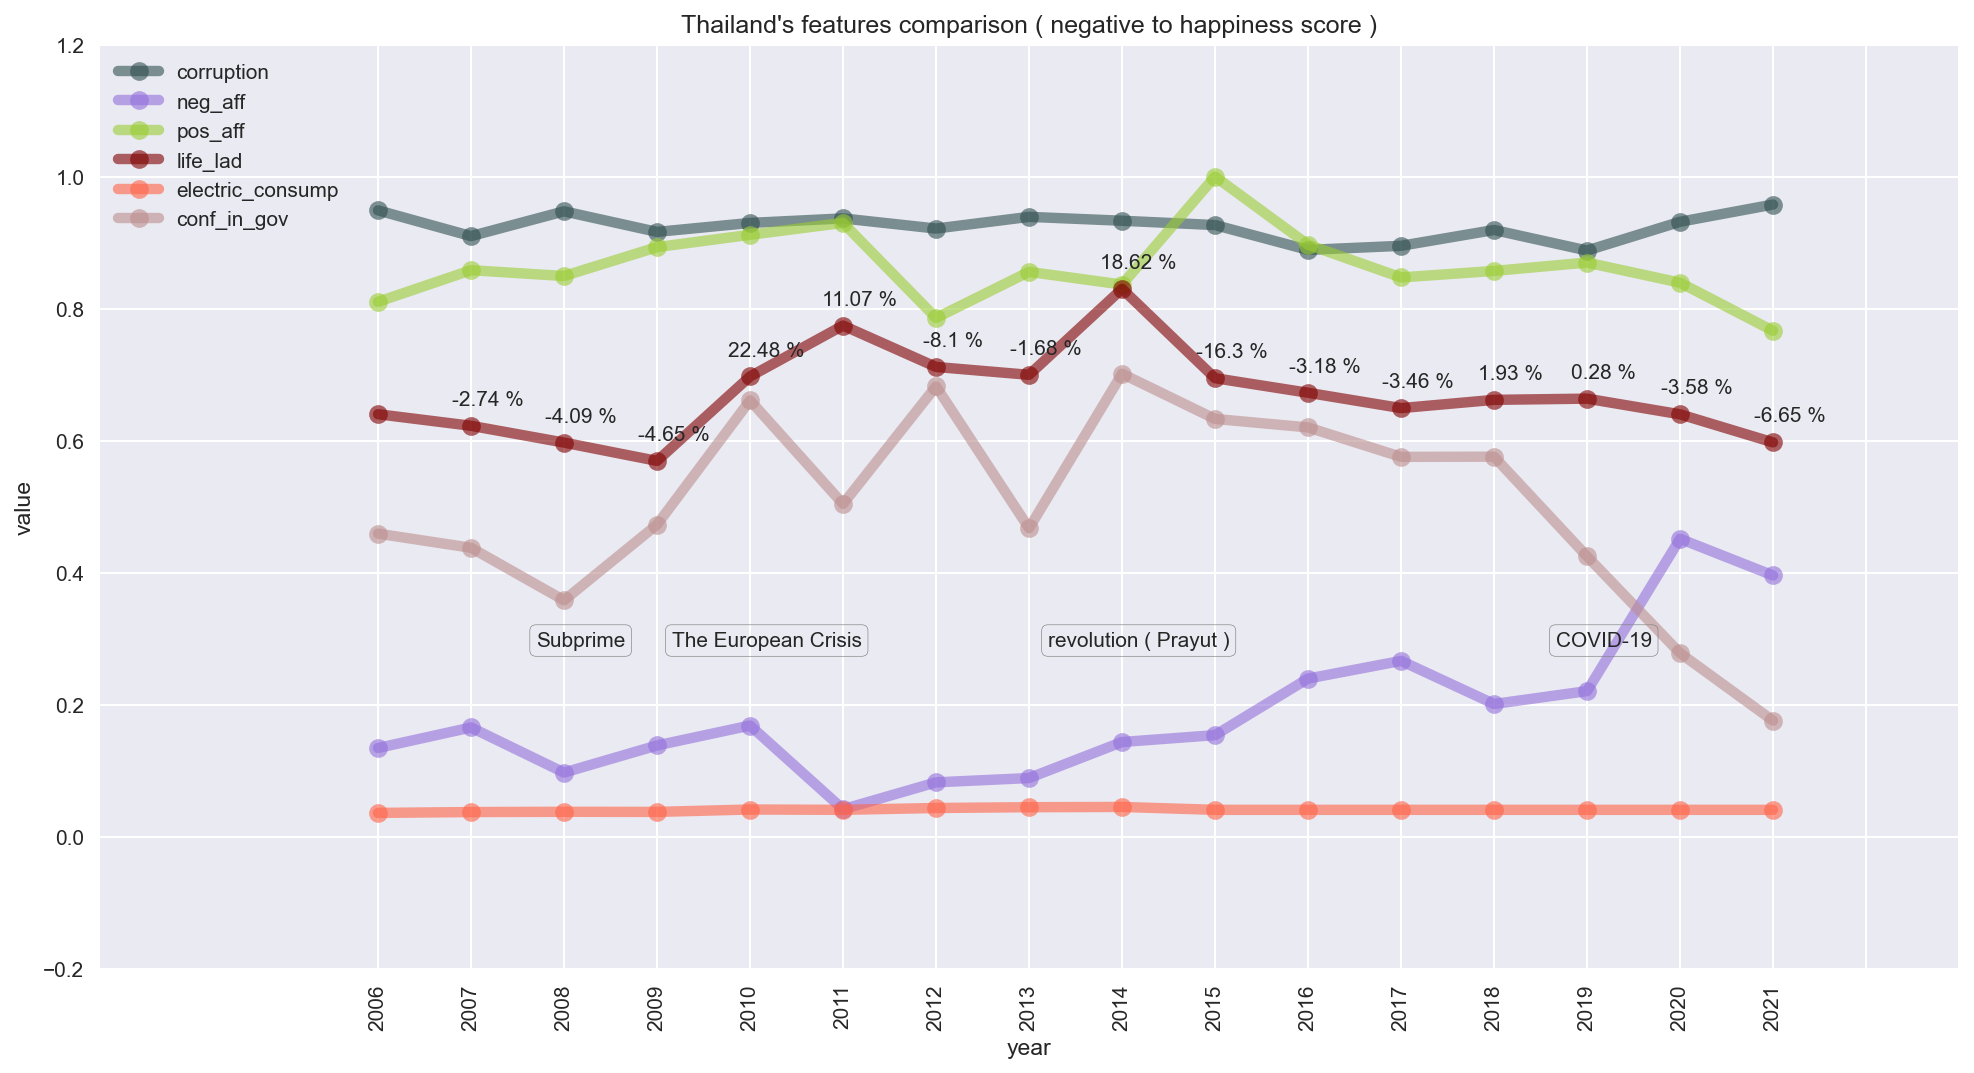

In [33]:
percent_crt = [round((100 * (b - a) / a),2) for a, b in zip(th_cp['corruption'], th_cp['corruption'][1:] ) ]
percent_dm_hlth = [round((100 * (b - a) / a),2) for a, b in zip(th_cp['dm_hlth_expend'], th_cp['dm_hlth_expend'][1:] ) ]
percent_life = [ round((100 * (b - a) / a),2) for a, b in zip(th_cp['life_lad'], th_cp['life_lad'][1:] ) ]
percent_gdp = [ round((100 * (b - a) / a),2) for a, b in zip(th_cp['gdp_per_cap'], th_cp['gdp_per_cap'][1:] ) ]
percent_conf = [ round((100 * (b - a) / a),2) for a, b in zip(th_cp['conf_in_gov'], th_cp['conf_in_gov'][1:] ) ]
percent_pos = [ round((100 * (b - a) / a),2) for a, b in zip(th_cp['pos_aff'], th_cp['pos_aff'][1:] ) ]
percent_neg = [ round((100 * (b - a) / a),2) for a, b in zip(th_cp['neg_aff'], th_cp['neg_aff'][1:] ) ]
percent_e = [ round((100 * (b - a) / a),2) for a, b in zip(th_cp['electric_consump'], th_cp['electric_consump'][1:] ) ]
percent_b = [ round((100 * (b - a) / a),2) for a, b in zip(th_cp['birth_r'], th_cp['birth_r'][1:] ) ]
percent_acc = [ round((100 * (b - a) / a),2) for a, b in zip(th_cp['acc_to_clnfuels_per'], th_cp['acc_to_clnfuels_per'][1:] ) ]

print( f"mean life_lad : { round((sum(percent_life)/len(percent_life)),2) } %\n\
       mean life_lad ( since Prayut ) : { round((sum(percent_life[8:])/len(percent_life[8:])),2) } %\n\
mean corruption : { round((sum(percent_crt)/len(percent_crt)),2) } %\n\
       mean corruption ( since Prayut ) : { round((sum(percent_crt[8:])/len(percent_crt[8:])),2) } %\n\
mean pos_aff : { round((sum(percent_pos)/len(percent_pos)),2) } %\n\
      mean pos_aff ( since Prayut ) : { round((sum(percent_pos[8:])/len(percent_pos[8:])),2) } %\n\
mean neg_aff : { round((sum(percent_neg)/len(percent_neg)),2) } %\n\
      mean neg_aff ( since Prayut ) : { round((sum(percent_neg[8:])/len(percent_neg[8:])),2) } %\n\
mean dm_hlth_expend : { round((sum(percent_dm_hlth)/len(percent_dm_hlth)),2) } %\n\
mean acc_to_clnfuels_per : { round((sum(percent_acc)/len(percent_acc)),2) } %\n\
mean birth_r : { round((sum(percent_b)/len(percent_b)),2) } %\n\
mean electric_consump : { round((sum(percent_e)/len(percent_e)),2) } %\n\n\
mean gdp_per_cap : { round((sum(percent_gdp)/len(percent_gdp)),2) } %\n\
mean conf_in_gov : { round((sum(percent_conf)/len(percent_conf)),2) } %\n\
      mean conf_in_gov ( since Prayut ) : { round((sum(percent_conf[8:])/len(percent_conf[8:])),2) } %\n" )

# Plot

plt.style.use('seaborn')
plt.figure(figsize=(16,8), dpi=150)

plt.plot( th_cp['year'] , th_cp['corruption'] ,color=color_t[6], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='corruption' )
plt.plot( th_cp['year'] , th_cp['neg_aff'] ,color=color_t[8], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='neg_aff' )
plt.plot( th_cp['year'] , th_cp['pos_aff'] ,color=color_t[7], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='pos_aff' )
plt.plot( th_cp['year'] , th_cp['life_lad'] ,color=color_t[0], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='life_lad' )
plt.plot( th_cp['year'] , th_cp['electric_consump'] ,color=color_t[12], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='electric_consump' )
plt.plot( th_cp['year'] , th_cp['conf_in_gov'] ,color=color_t[9], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='conf_in_gov' )

plt.title(f"Thailand's features comparison ( negative to happiness score )")
plt.legend(loc="best")
plt.xticks( [-3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], rotation=90 )
plt.yticks( [-0.2,0,0.2,0.4,0.6,0.8,1,1.2] )
plt.xlabel("year")
plt.ylabel("value")
plt.annotate("Subprime", 
       xy=('2008', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center' )
plt.annotate("The European Crisis", 
       xy=('2010', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center' )
plt.annotate("revolution ( Prayut )", 
       xy=('2014', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center')
plt.annotate("COVID-19", 
       xy=('2019', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center')

for i,j in enumerate(th_cp['life_lad']) :
       if i > 0 :
              plt.annotate(f"{percent_life[i-1]} %", 
                     xy=( th_cp['year'].iloc[i] , j ), xycoords='data',
                     xytext=(8,10), textcoords='offset points', ha='center')
              
              #plt.annotate(f"{percent_crt[i-1]} %", 
              #       xy=( th_cp['year'].iloc[i] , th_cp['corruption'].iloc[i] ), xycoords='data',
              #       bbox=dict(boxstyle='round', fc='none', ec='gray'),
              #       xytext=(8,10), textcoords='offset points', ha='center')
              

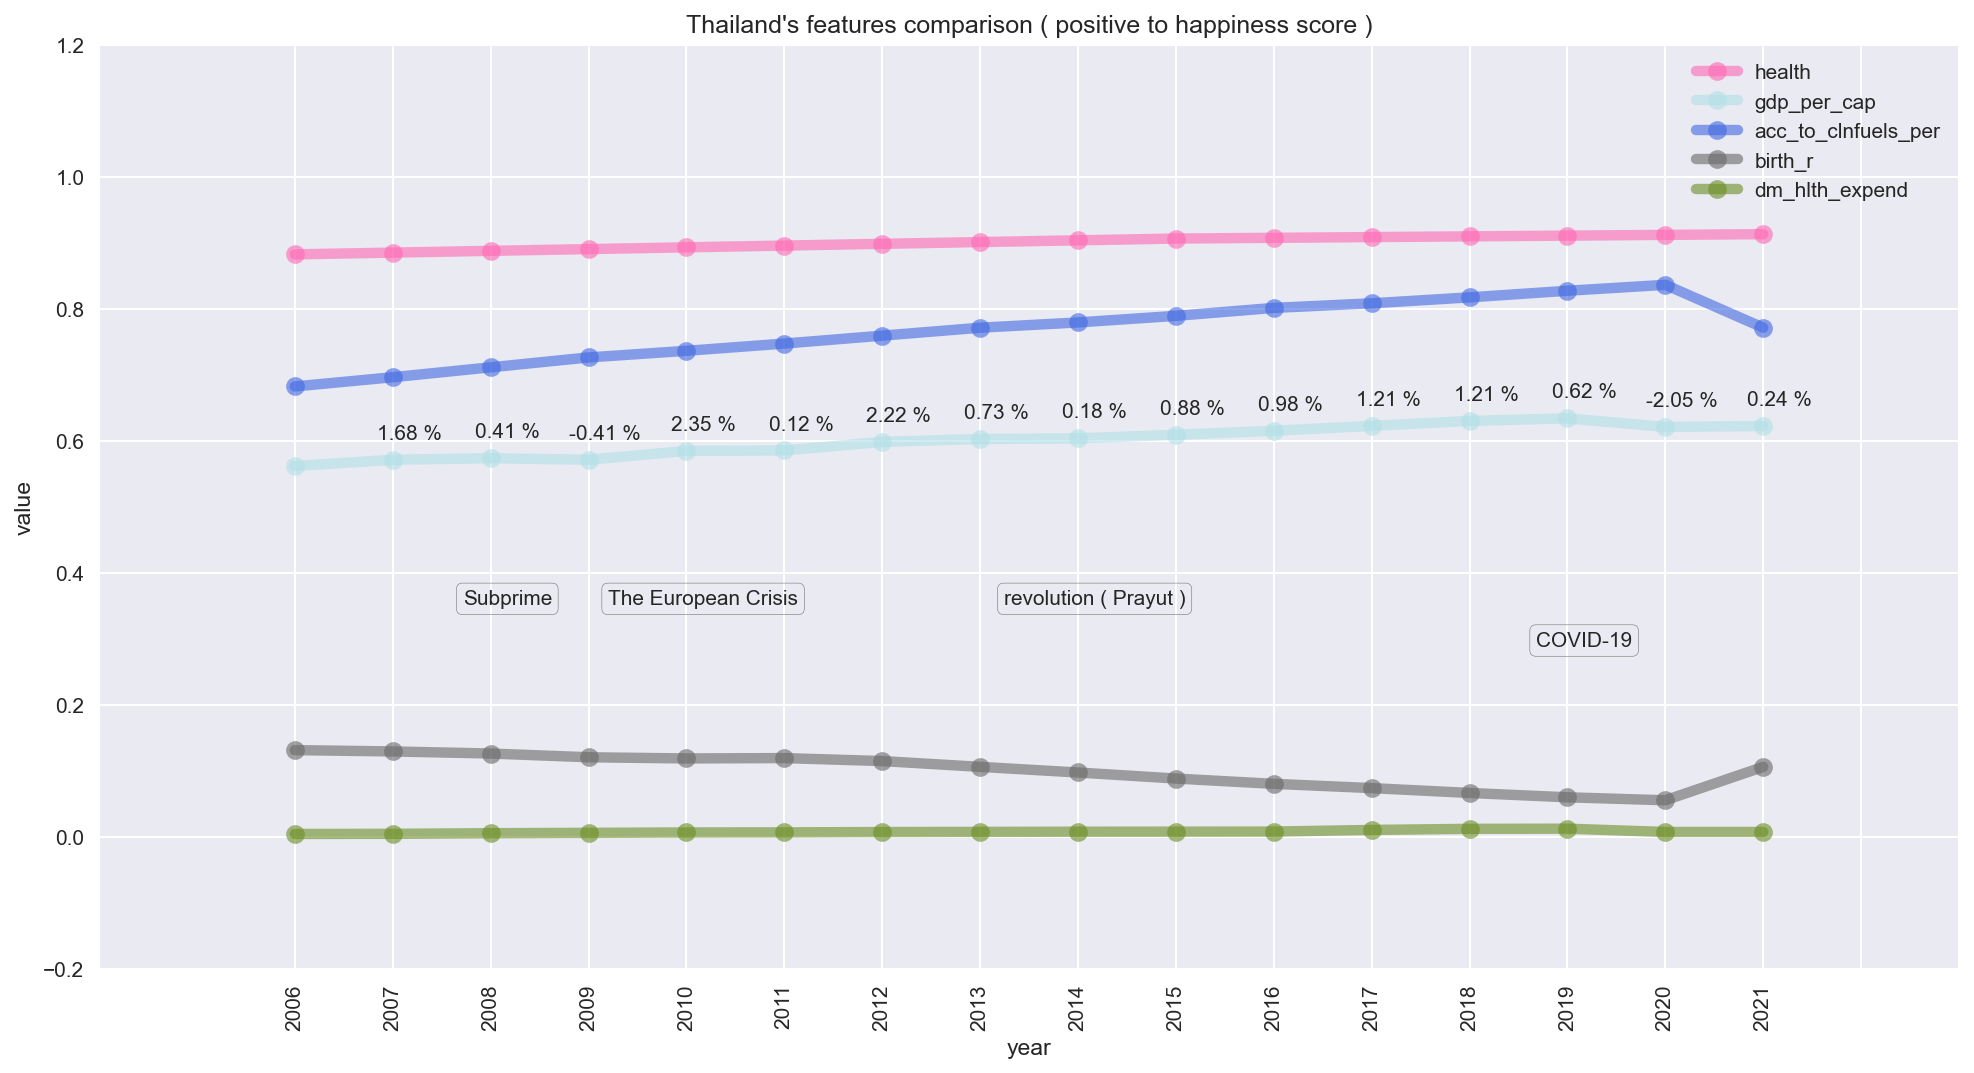

In [34]:
# Plot

plt.style.use('seaborn')
plt.figure(figsize=(16,8), dpi=150)

plt.plot( th_cp['year'] , th_cp['health'] ,color=color_t[3], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='health' )
plt.plot( th_cp['year'] , th_cp['gdp_per_cap'] ,color=color_t[1], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='gdp_per_cap' )
plt.plot( th_cp['year'] , th_cp['acc_to_clnfuels_per'] ,color=color_t[11], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='acc_to_clnfuels_per' )
plt.plot( th_cp['year'] , th_cp['birth_r'] ,color=color_t[16], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='birth_r' )
plt.plot( th_cp['year'] , th_cp['dm_hlth_expend'] ,color=color_t[13], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='dm_hlth_expend' )

plt.title(f"Thailand's features comparison ( positive to happiness score )")
plt.legend(loc="best")
plt.xticks( [-2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], rotation=90 )
plt.yticks( [-0.2,0,0.2,0.4,0.6,0.8,1,1.2] )
plt.xlabel("year")
plt.ylabel("value")
plt.annotate("Subprime", 
       xy=('2008', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,30), textcoords='offset points', ha='center' )
plt.annotate("The European Crisis", 
       xy=('2010', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,30), textcoords='offset points', ha='center' )
plt.annotate("revolution ( Prayut )", 
       xy=('2014', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,30), textcoords='offset points', ha='center')
plt.annotate("COVID-19", 
       xy=('2019', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center')

for i,j in enumerate(th_cp['gdp_per_cap']) :
       if i > 0 :
              plt.annotate(f"{percent_gdp[i-1]} %", 
                     xy=( th_cp['year'].iloc[i] , j ), xycoords='data',
                     xytext=(8,10), textcoords='offset points', ha='center')


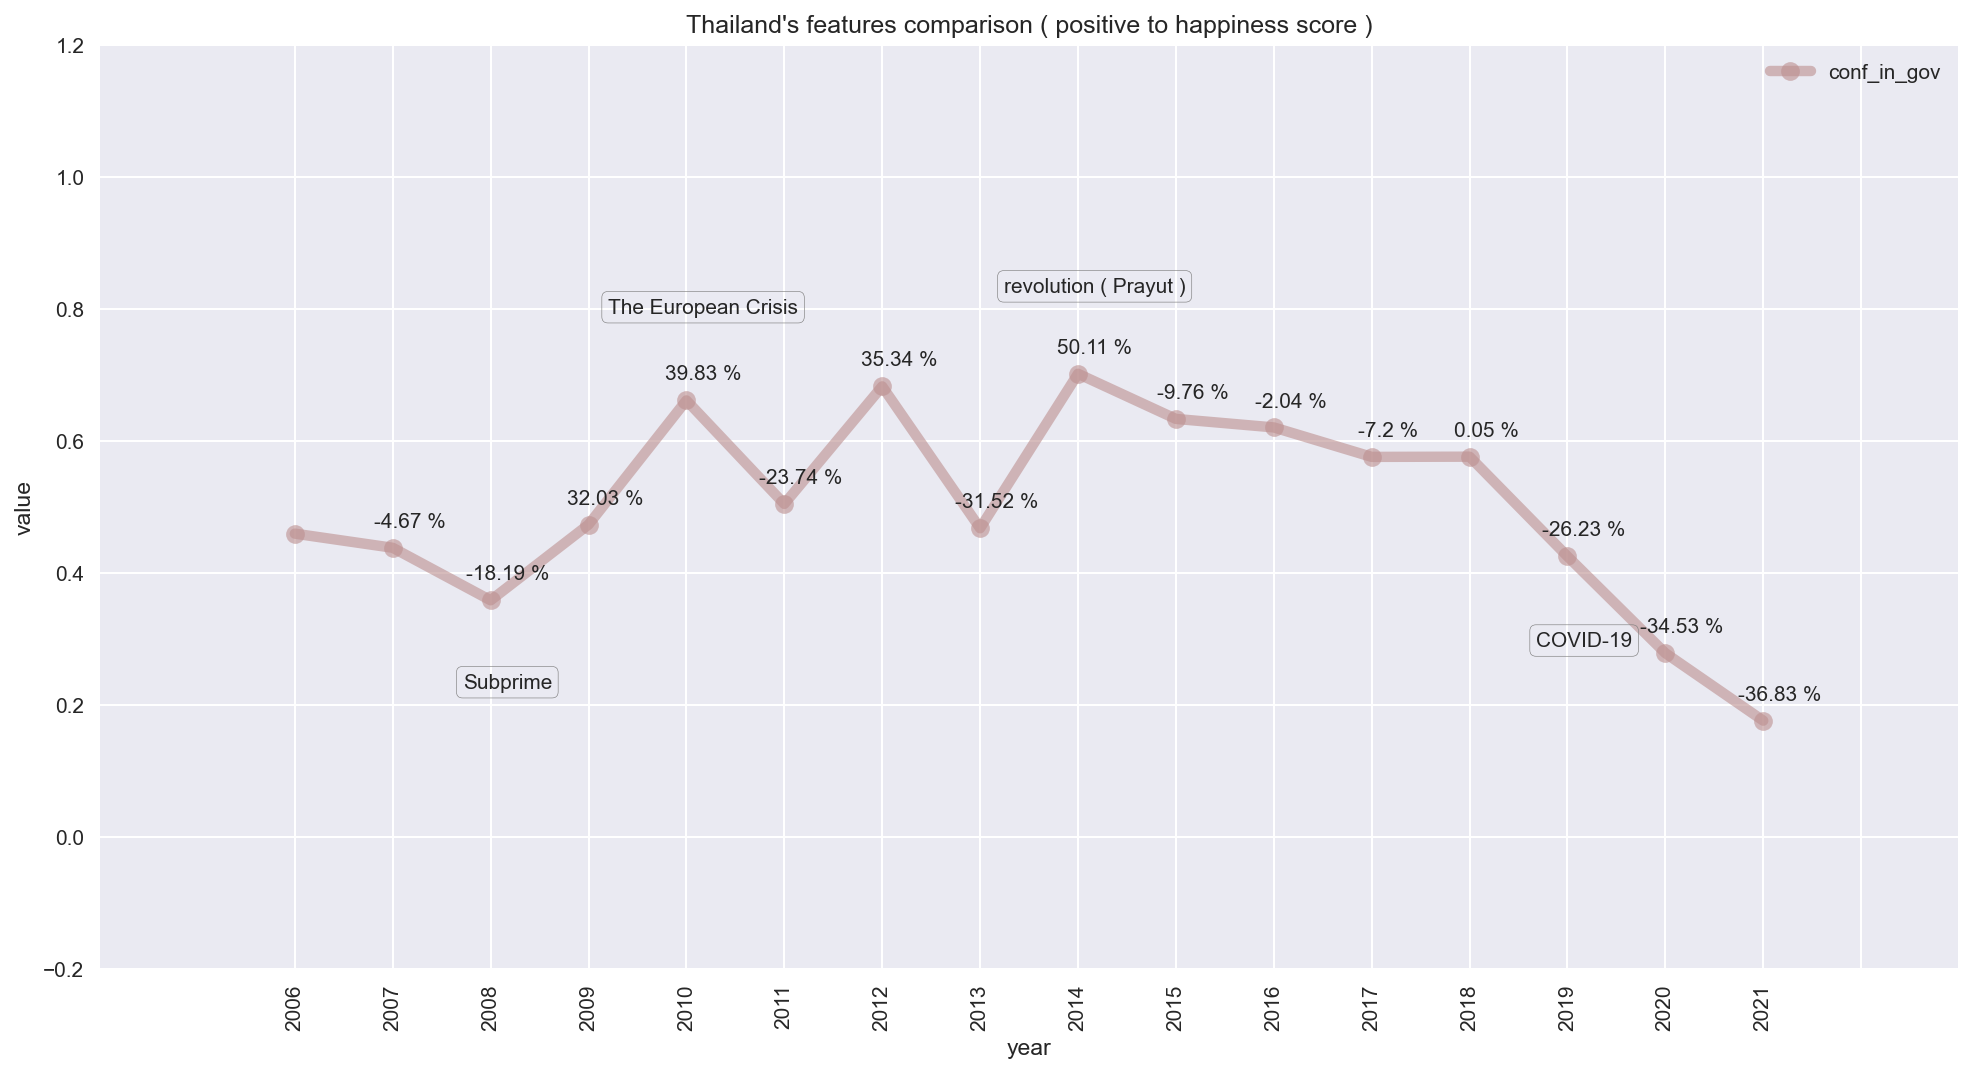

In [35]:
# Plot

plt.style.use('seaborn')
plt.figure(figsize=(16,8), dpi=150)

plt.plot( th_cp['year'] , th_cp['conf_in_gov'] ,color=color_t[9], marker='o', markersize = 9, linewidth=5, linestyle='solid', alpha=0.6 ,label='conf_in_gov' )

plt.title(f"Thailand's features comparison ( positive to happiness score )")
plt.legend(loc="best")
plt.xticks( [-2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], rotation=90 )
plt.yticks( [-0.2,0,0.2,0.4,0.6,0.8,1,1.2] )
plt.xlabel("year")
plt.ylabel("value")
plt.annotate("Subprime", 
       xy=('2008', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,-10), textcoords='offset points', ha='center' )
plt.annotate("The European Crisis", 
       xy=('2010', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,170), textcoords='offset points', ha='center' )
plt.annotate("revolution ( Prayut )", 
       xy=('2014', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,180), textcoords='offset points', ha='center')
plt.annotate("COVID-19", 
       xy=('2019', th_cp['pm25'].median()), xycoords='data',
       bbox=dict(boxstyle='round', fc='none', ec='gray'),
       xytext=(8,10), textcoords='offset points', ha='center')

for i,j in enumerate(th_cp['conf_in_gov']) :
       if i > 0 :
              plt.annotate(f"{percent_conf[i-1]} %", 
                     xy=( th_cp['year'].iloc[i] , j ), xycoords='data',
                     xytext=(8,10), textcoords='offset points', ha='center')

# How would it be in the future ?

In [36]:
#pip install statsforecast


In [37]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS

/opt/anaconda3/lib/python3.9/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [38]:
# Time series forecasts

th_fc = th_cp.iloc[ :,1: ]

th_fc['year'] =  pd.to_datetime(th_fc['year'], format='%Y')
th_fc['unique_id'] = 0
th_fc = th_fc.rename(columns={'year':'ds'}) .reset_index()

# set the model

Y_train_co = th_fc.loc[ :10,['unique_id','ds','corruption'] ]
Y_test_co = th_fc.loc[ 10:,['unique_id','ds','corruption'] ]

season_length = 5
horizon = len(Y_test_co)

models = [
    AutoARIMA(season_length=season_length),
    AutoETS(season_length=season_length)
]

sf = StatsForecast(
    df=Y_train_co,
    models=models,
    freq='Y', 
    n_jobs=-1
)

# time series prediction

Y_hat_df = sf.forecast(horizon)
Y_hat_df.head()


/opt/anaconda3/lib/python3.9/site-packages/statsforecast/ets.py:1039: RuntimeWarning: divide by zero encountered in true_divide
  sigma2 = np.sum(e**2) / (ny - np_ - 1)


ds  AutoARIMA   AutoETS
unique_id                                
0         2016-12-31   0.921247  0.927105
0         2017-12-31   0.938986  0.927105
0         2018-12-31   0.933084  0.927105
0         2019-12-31   0.926562  0.927105
0         2020-12-31   0.888936  0.927105

unique_id    ds  corruption  AutoARIMA   AutoETS
0          0  2016    0.888936   0.921247  0.927105
1          0  2017    0.895094   0.938986  0.927105
2          0  2018    0.919121   0.933084  0.927105
3          0  2019    0.887946   0.926562  0.927105
4          0  2020    0.931508   0.888936  0.927105
5          0  2021    0.957655   0.921247  0.927105

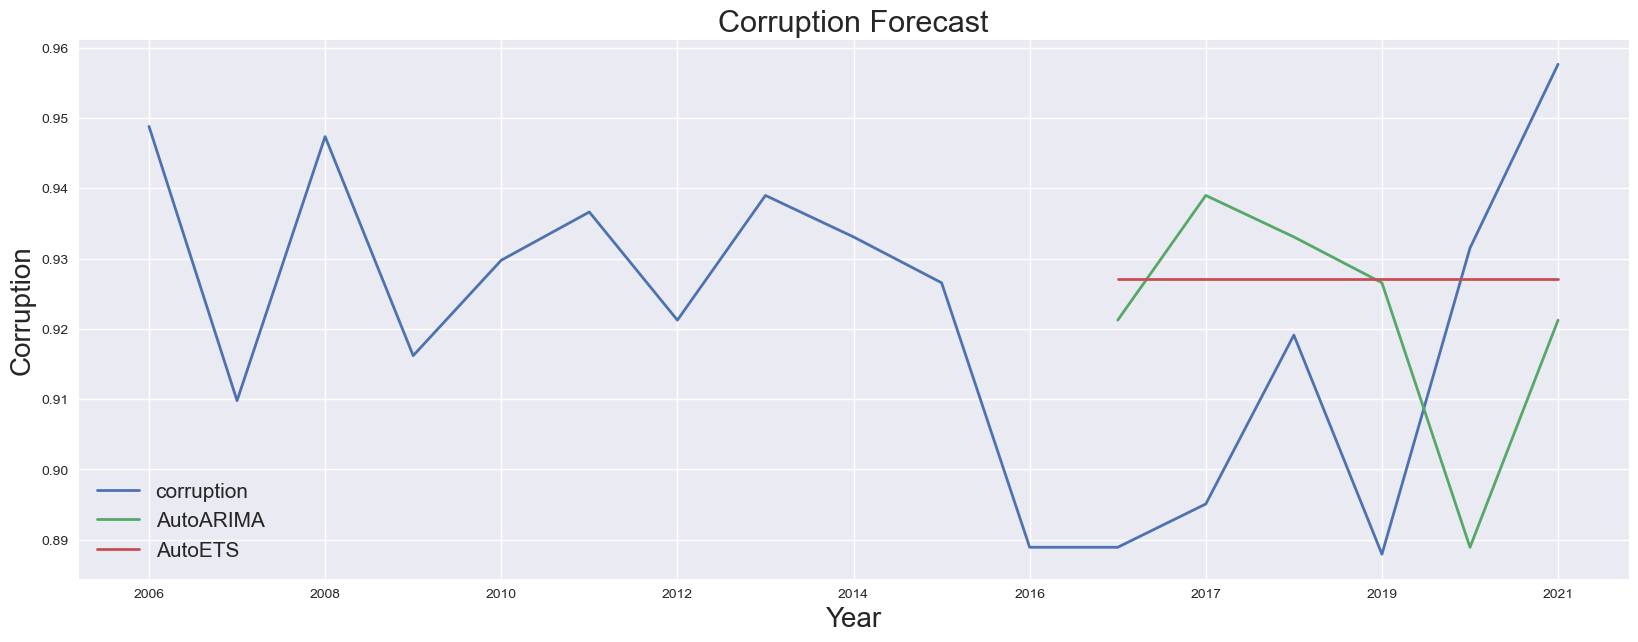

In [39]:
Y_train_co['ds'] = Y_train_co['ds'].apply(lambda x : x.strftime( '%Y' ) ) 
Y_test_co['ds'] = Y_test_co['ds'].apply(lambda x : x.strftime( '%Y' ) ) 
Y_hat_df['ds'] = Y_hat_df['ds'].apply(lambda x : x.strftime( '%Y' ) ) 

# Merge the forecasts with the true values

Y_hat_df = pd.merge(Y_test_co,Y_hat_df, how='outer', on=['unique_id', 'ds'])
display(Y_hat_df)

# plot

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot_df = pd.concat([Y_train_co, Y_hat_df]).set_index('ds')
plot_df[['corruption', 'AutoARIMA', 'AutoETS']].plot(ax=ax, linewidth=2)
ax.set_title('Corruption Forecast', fontsize=22)
ax.set_ylabel('Corruption', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.legend(prop={'size': 15})